# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:43:35.878175: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:43:39.256607
2025-04-14 20:43:39.256607


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:43:32"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

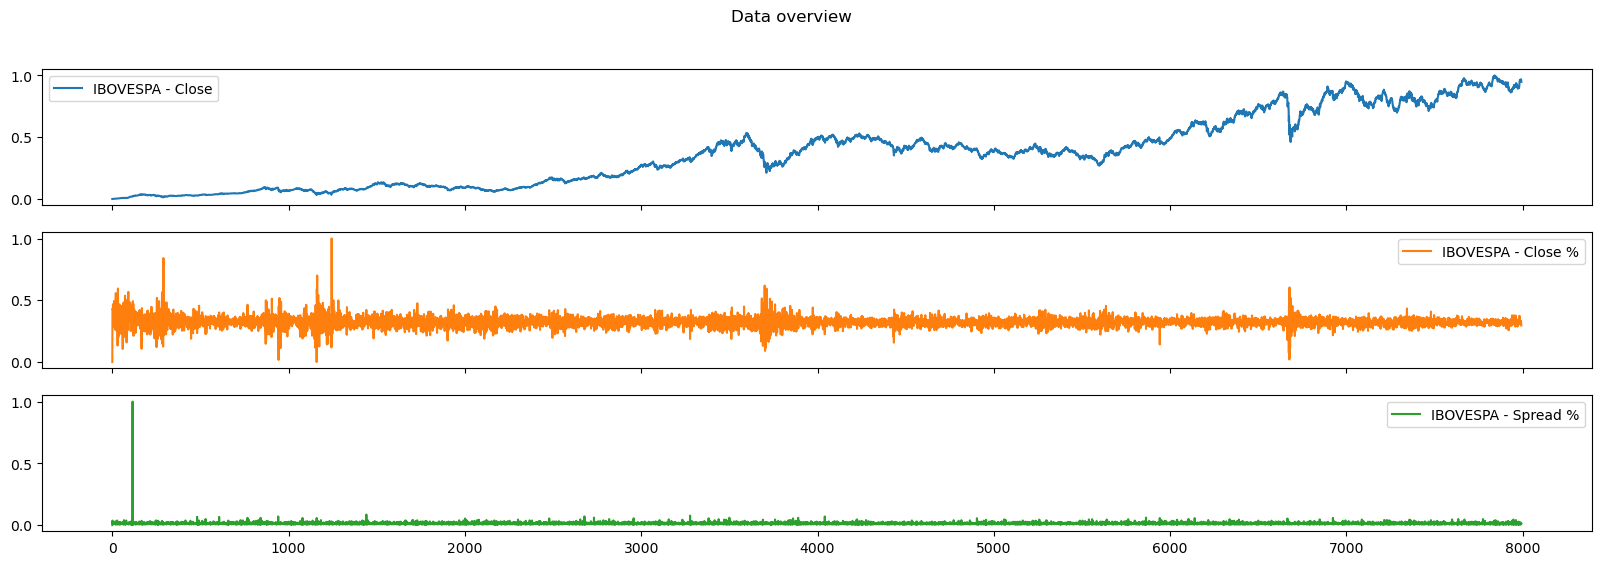

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

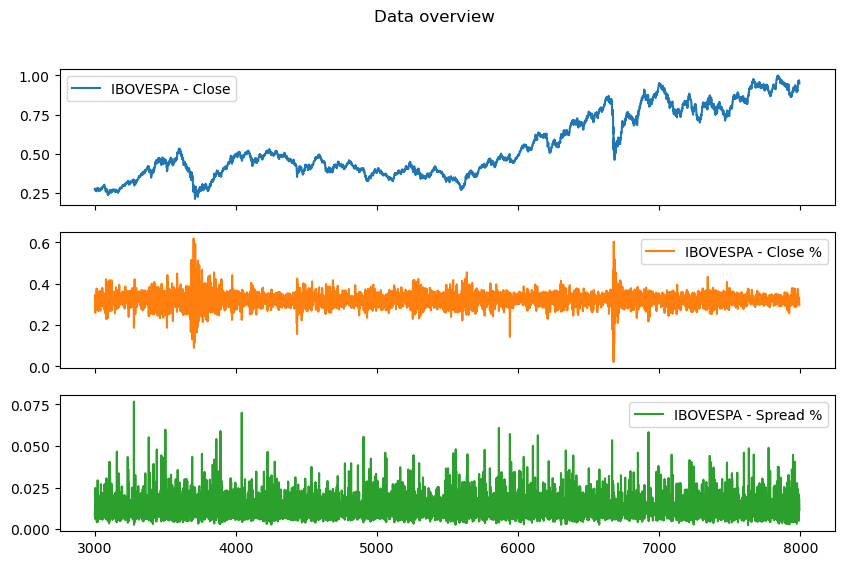

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

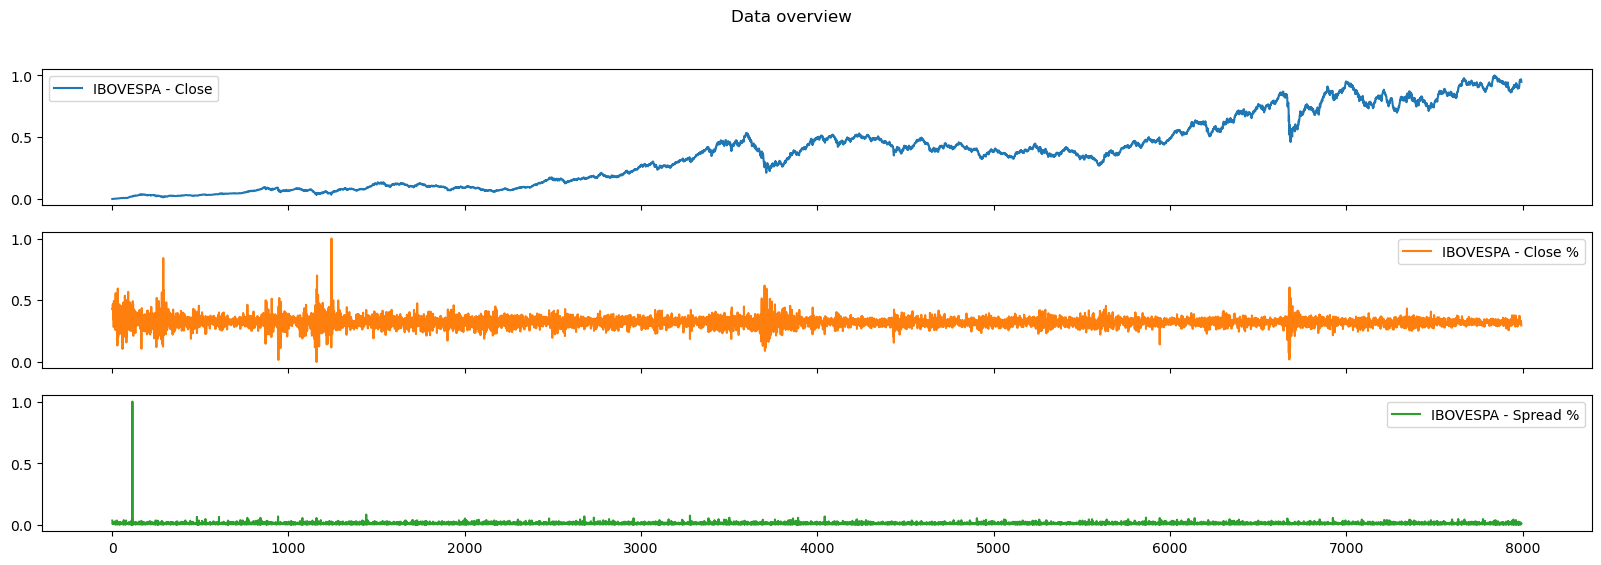

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

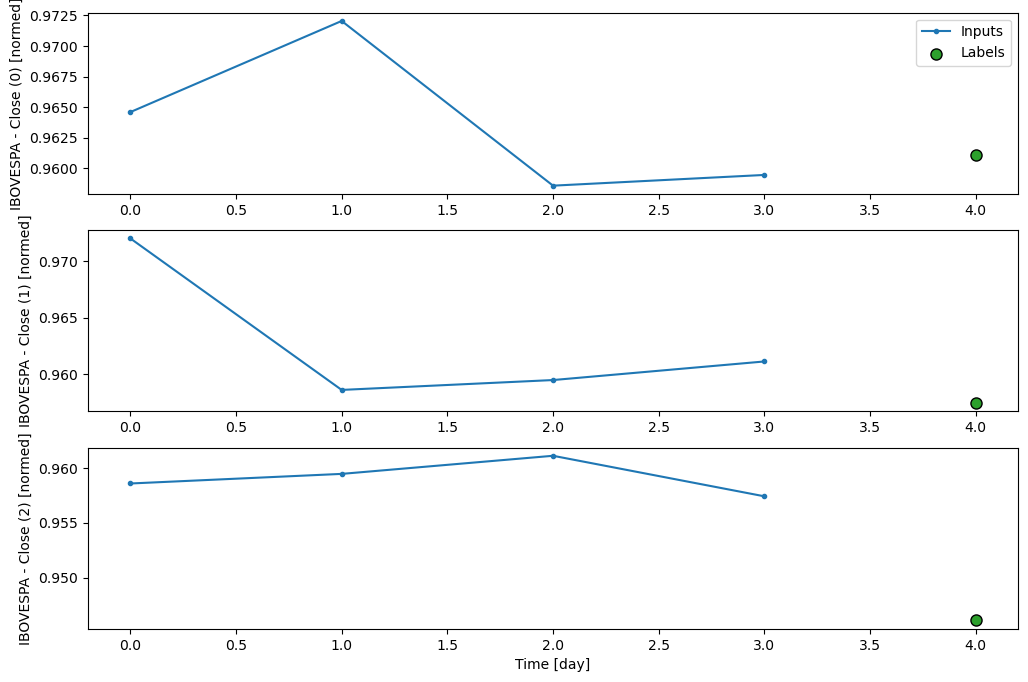

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12:58 3s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 117.5157 - mean_squared_error: 2.5060e-04 - root_mean_squared_error: 0.0150  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 99.7043 - mean_squared_error: 2.5967e-04 - root_mean_squared_error: 0.0156 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 84.7990 - mean_squared_error: 2.3621e-04 - root_mean_squared_error: 0.0150

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 74.3120 - mean_squared_error: 2.1955e-04 - root_mean_squared_error: 0.0145

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 67.1201 - mean_squared_error: 2.1513e-04 - root_mean_squared_error: 0.0144

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.8710 - mean_squared_error: 2.1616e-04 - root_mean_squared_error: 0.0145

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 57.2310 - mean_squared_error: 2.2187e-04 - root_mean_squared_error: 0.0147

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.8321 - mean_squared_error: 2.2509e-04 - root_mean_squared_error: 0.0148

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.6679 - mean_squared_error: 2.2716e-04 - root_mean_squared_error: 0.0149

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 48.1266 - mean_squared_error: 2.3611e-04 - root_mean_squared_error: 0.0152

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 45.9990 - mean_squared_error: 2.5292e-04 - root_mean_squared_error: 0.0157

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 43.9047 - mean_squared_error: 2.7046e-04 - root_mean_squared_error: 0.0162

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 42.7816 - mean_squared_error: 2.8636e-04 - root_mean_squared_error: 0.0166

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 41.5646 - mean_squared_error: 3.0900e-04 - root_mean_squared_error: 0.0172

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 40.6926 - mean_squared_error: 3.9351e-04 - root_mean_squared_error: 0.0185

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 39.9204 - mean_squared_error: 5.0675e-04 - root_mean_squared_error: 0.0201

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 39.3458 - mean_squared_error: 6.3389e-04 - root_mean_squared_error: 0.0217

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 38.5907 - mean_squared_error: 8.0333e-04 - root_mean_squared_error: 0.0238

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 37.8810 - mean_squared_error: 9.5670e-04 - root_mean_squared_error: 0.0257

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 37.2018 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0274    

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 36.7407 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0285

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 36.3818 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0293

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 36.0374 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0301

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 35.6225 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0310

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 35.1450 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0321

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 34.6140 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0332

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 34.0437 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0344

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 33.5705 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 33.1143 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0363

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 32.5047 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 31.9931 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 31.5001 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0402

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 31.2338 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0408 - val_loss: 0.0837 - val_mean_absolute_error: 0.0837 - val_mean_absolute_percentage_error: 8.9163 - val_mean_squared_error: 0.0082 - val_root_mean_squared_error: 0.0904 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.6932 - mean_absolute_error: 0.6932 - mean_absolute_percentage_error: 29915.9863 - mean_squared_error: 0.4806 - root_mean_squared_error: 0.6932

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6731 - mean_absolute_error: 0.6731 - mean_absolute_percentage_error: 13275.3359 - mean_squared_error: 0.4543 - root_mean_squared_error: 0.6738  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6321 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 10117.0996 - mean_squared_error: 0.4105 - root_mean_squared_error: 0.6389

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5865 - mean_absolute_error: 0.5865 - mean_absolute_percentage_error: 8340.9277 - mean_squared_error: 0.3695 - root_mean_squared_error: 0.6039 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5527 - mean_absolute_error: 0.5527 - mean_absolute_percentage_error: 7332.6675 - mean_squared_error: 0.3399 - root_mean_squared_error: 0.5770

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 6189.5337 - mean_squared_error: 0.3005 - root_mean_squared_error: 0.5389

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 5302.8926 - mean_squared_error: 0.2660 - root_mean_squared_error: 0.5032

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4148 - mean_absolute_error: 0.4148 - mean_absolute_percentage_error: 4599.9644 - mean_squared_error: 0.2364 - root_mean_squared_error: 0.4706

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3931 - mean_absolute_error: 0.3931 - mean_absolute_percentage_error: 4269.7861 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4538

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3707 - mean_absolute_error: 0.3707 - mean_absolute_percentage_error: 3945.7847 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4364

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 3601.9094 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4168

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 3347.7996 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.4015

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3117 - mean_absolute_error: 0.3117 - mean_absolute_percentage_error: 3156.0835 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3895

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2983 - mean_absolute_error: 0.2983 - mean_absolute_percentage_error: 2987.3276 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3785

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 2837.5044 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3685

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 2778.2922 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3644

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 2721.7764 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3605

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 2633.0686 - mean_squared_error: 0.1444 - root_mean_squared_error: 0.3543

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 2550.6165 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3484

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 2473.7451 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3429

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 2415.8582 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3387

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 2347.5955 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3337

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 2295.9907 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3298

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2387 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 2246.8523 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3261

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 2188.6182 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3216

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 2144.3843 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3182

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2295 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 2133.6338 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3174

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 2123.0020 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3165

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 2102.0879 - mean_squared_error: 0.1177 - root_mean_squared_error: 0.3149

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 2091.8013 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3141

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 2071.5588 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3125

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2227 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 2051.7463 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3109

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1994.7505 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3063

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 1923.9858 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3005

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 1858.5647 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2951

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 1805.2335 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2905

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 1755.1882 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2863

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 1701.6143 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2816

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1884 - mean_absolute_error: 0.1884 - mean_absolute_percentage_error: 1645.4965 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2767

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 1604.5983 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2731

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1565.8833 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2696

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1529.1726 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2663

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 1504.1017 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2640 - val_loss: 0.0442 - val_mean_absolute_error: 0.0442 - val_mean_absolute_percentage_error: 4.7015 - val_mean_squared_error: 0.0024 - val_root_mean_squared_error: 0.0493 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_absolute_percentage_error: 21453.4375 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4973

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.4945 - mean_absolute_error: 0.4945 - mean_absolute_percentage_error: 11666.5469 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4945 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4831 - mean_absolute_error: 0.4831 - mean_absolute_percentage_error: 8248.9941 - mean_squared_error: 0.2339 - root_mean_squared_error: 0.4835 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 6450.8013 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4627 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4320 - mean_absolute_error: 0.4320 - mean_absolute_percentage_error: 5503.2886 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4409

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3996 - mean_absolute_error: 0.3996 - mean_absolute_percentage_error: 4730.4326 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.4168

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 4167.7949 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3953

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 3737.4417 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3765

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 3311.0784 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3558

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 2948.6311 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3364

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 2690.5186 - mean_squared_error: 0.1124 - root_mean_squared_error: 0.3214

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2513 - mean_absolute_error: 0.2513 - mean_absolute_percentage_error: 2456.9583 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.3069

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 2282.1985 - mean_squared_error: 0.0972 - root_mean_squared_error: 0.2955

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2242 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 2133.0376 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2854

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 2004.0520 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2762

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 1879.6300 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2671

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 1781.4890 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2597

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 1703.3463 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2537

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 1624.0669 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2475

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 1552.5557 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2417

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 1515.7607 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2387

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1474.0806 - mean_squared_error: 0.0655 - root_mean_squared_error: 0.2352

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 1441.2368 - mean_squared_error: 0.0641 - root_mean_squared_error: 0.2324

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 1422.2986 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2308

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1386.0314 - mean_squared_error: 0.0619 - root_mean_squared_error: 0.2277

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 1357.3389 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2252

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 1319.3068 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2218

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 1283.5573 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2186

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - mean_absolute_percentage_error: 1254.5764 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2160

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 1231.5081 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2139

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 1213.7181 - mean_squared_error: 0.0548 - root_mean_squared_error: 0.2123

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 1200.7448 - mean_squared_error: 0.0542 - root_mean_squared_error: 0.2111

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 1188.0746 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2099

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 1167.6044 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2080

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1380 - mean_absolute_error: 0.1380 - mean_absolute_percentage_error: 1144.0471 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2058

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 1117.8658 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2033 - val_loss: 0.0163 - val_mean_absolute_error: 0.0163 - val_mean_absolute_percentage_error: 1.7562 - val_mean_squared_error: 4.1921e-04 - val_root_mean_squared_error: 0.0205 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2990 - mean_absolute_error: 0.2990 - mean_absolute_percentage_error: 12880.3672 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2990

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 8399.0010 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2974 

  7/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 6482.4370 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2926

 11/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2812 - mean_absolute_error: 0.2812 - mean_absolute_percentage_error: 5135.7402 - mean_squared_error: 0.0799 - root_mean_squared_error: 0.2823

 14/238 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 4494.3223 - mean_squared_error: 0.0746 - root_mean_squared_error: 0.2720

 18/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 3882.7122 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2585

 23/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 3341.9973 - mean_squared_error: 0.0609 - root_mean_squared_error: 0.2434

 28/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 2948.0293 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2303

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 2645.9727 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2190

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 2406.2231 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.2093

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 2247.0188 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2023

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1663 - mean_absolute_error: 0.1663 - mean_absolute_percentage_error: 2078.5193 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1946

 49/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 2018.8105 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1917

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 1962.8373 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1890

 52/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1936.1376 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1877

 53/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1559 - mean_absolute_error: 0.1559 - mean_absolute_percentage_error: 1910.2435 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1864

 55/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1528 - mean_absolute_error: 0.1528 - mean_absolute_percentage_error: 1860.7240 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1839

 57/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 1814.0092 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1815

 58/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 1791.6249 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1804

 59/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 1769.8534 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1792

 61/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 1728.0476 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1770

 63/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1416 - mean_absolute_error: 0.1416 - mean_absolute_percentage_error: 1688.4031 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1749

 64/238 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 1669.3383 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1739

 65/238 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 1650.7498 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1729

 66/238 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1632.6212 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1719

 68/238 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 1597.6791 - mean_squared_error: 0.0325 - root_mean_squared_error: 0.1699

 69/238 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1580.8291 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1690

 71/238 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 1548.2992 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1671

 72/238 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 1532.5900 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1662

 73/238 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1517.2340 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1654

 74/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1502.2192 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1645

 77/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 1459.1060 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1620

 79/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1431.8683 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1604

 81/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 1405.7438 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1588

 83/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1380.6641 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1573

 86/238 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1344.8629 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1551

 89/238 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 1311.0737 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1530

 91/238 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1289.5801 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1516

 94/238 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1258.7729 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1497

 96/238 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1239.1300 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1484

 97/238 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 1229.5626 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1478

 99/238 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 1210.9152 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1466

102/238 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.1063 - mean_absolute_error: 0.1063 - mean_absolute_percentage_error: 1184.0963 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1449

103/238 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1175.4482 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1443

104/238 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1166.9399 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1437

105/238 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1158.5680 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1432

106/238 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 1150.3289 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1426

108/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1134.2354 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1415

109/238 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1126.3749 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1410

110/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1118.6349 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1405

112/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 1103.5045 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1395

115/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 1081.6423 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1380

118/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 1060.7224 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1365

121/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1040.6816 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1351

124/238 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0944 - mean_absolute_error: 0.0944 - mean_absolute_percentage_error: 1021.4643 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1338

127/238 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 1003.0178 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1325

128/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 997.0321 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1320 

129/238 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 991.1252 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1316

130/238 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 985.2953 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1312

131/238 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 979.5411 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1308

132/238 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 973.8610 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1304

134/238 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 962.7174 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1295

136/238 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 951.8527 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1288

137/238 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 946.5215 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1284

138/238 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 941.2563 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1280

139/238 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 936.0556 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1276

140/238 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 930.9182 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1272

144/238 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 910.9783 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1257

149/238 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 887.3434 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1240

154/238 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 865.0256 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1223

158/238 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 848.0442 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1209

163/238 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 827.8244 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1194

165/238 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 820.0311 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1188

168/238 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 808.6403 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1179

171/238 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 797.5931 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1170

175/238 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 783.3713 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1158

178/238 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 773.0667 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1150

182/238 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 759.7834 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1139

187/238 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 743.8702 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1126

192/238 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 728.6740 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1114

200/238 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 705.7310 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1094

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 686.9195 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1078

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 671.6519 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1065

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 654.7574 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1050

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 643.2508 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1040

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 638.7719 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1037

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 634.3610 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1033

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 632.1806 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1031

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 630.0166 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1029

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 627.8688 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1027

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 619.4364 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1019

238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 613.2784 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1014 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0152 - val_mean_squared_error: 1.3669e-04 - val_root_mean_squared_error: 0.0117 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 4905.0879 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1142

  2/238 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 4071.5107 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1130 

  4/238 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 3157.2893 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1092

  6/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 2605.2563 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1040 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 2090.2019 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0957

 12/238 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 1770.7649 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0894

 16/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 1488.5636 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0829

 20/238 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 1293.3838 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0777

 26/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 1089.9064 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0716

 30/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 990.1602 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0682 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 909.1292 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0654

 38/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 841.8328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0629

 41/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 798.3332 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0612

 47/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 724.9072 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 52/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 674.3303 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 623.1391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 573.3630 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

 73/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 526.3000 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 496.2753 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

 83/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 478.2896 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0466

 86/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 465.7249 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 446.3394 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 432.0766 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 422.0273 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 412.4853 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 403.4135 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 394.7747 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 383.8769 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 371.1611 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 361.6531 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 352.6769 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 348.3749 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 340.1127 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 334.1984 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 323.0307 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 311.0038 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 303.0017 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 292.5335 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 281.5060 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 272.5831 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 268.9472 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 266.5823 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 264.2629 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 261.9876 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 253.3026 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 246.2069 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 239.5356 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 234.1261 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 227.3186 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 221.7095 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 217.1388 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 213.4852 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 211.3588 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0819 - val_mean_squared_error: 1.5428e-04 - val_root_mean_squared_error: 0.0124 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 3015.0283 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 1571.6272 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 1122.2859 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0531

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 836.3419 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 697.2409 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 589.0772 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0405

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 513.1617 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 456.6650 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 407.0441 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 372.5532 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 347.8289 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 336.8282 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 323.3489 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 305.2851 - mean_squared_error: 9.9757e-04 - root_mean_squared_error: 0.0293

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 289.3558 - mean_squared_error: 9.5128e-04 - root_mean_squared_error: 0.0286

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 275.1949 - mean_squared_error: 9.1005e-04 - root_mean_squared_error: 0.0279

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 262.5109 - mean_squared_error: 8.7317e-04 - root_mean_squared_error: 0.0273

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 254.7575 - mean_squared_error: 8.5056e-04 - root_mean_squared_error: 0.0269

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 249.2695 - mean_squared_error: 8.3447e-04 - root_mean_squared_error: 0.0266

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 242.3497 - mean_squared_error: 8.1411e-04 - root_mean_squared_error: 0.0262

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 231.2179 - mean_squared_error: 7.8137e-04 - root_mean_squared_error: 0.0256 

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 219.8268 - mean_squared_error: 7.4926e-04 - root_mean_squared_error: 0.0251

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 209.6362 - mean_squared_error: 7.2333e-04 - root_mean_squared_error: 0.0246

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 201.5509 - mean_squared_error: 7.0369e-04 - root_mean_squared_error: 0.0243

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 195.1538 - mean_squared_error: 6.8794e-04 - root_mean_squared_error: 0.0241

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 193.1209 - mean_squared_error: 6.8291e-04 - root_mean_squared_error: 0.0240

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 192.1223 - mean_squared_error: 6.8045e-04 - root_mean_squared_error: 0.0239

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 191.1351 - mean_squared_error: 6.7800e-04 - root_mean_squared_error: 0.0239

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 190.1591 - mean_squared_error: 6.7558e-04 - root_mean_squared_error: 0.0239

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 189.1942 - mean_squared_error: 6.7318e-04 - root_mean_squared_error: 0.0238

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 187.2968 - mean_squared_error: 6.6844e-04 - root_mean_squared_error: 0.0237

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 185.4413 - mean_squared_error: 6.6378e-04 - root_mean_squared_error: 0.0237

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 184.5290 - mean_squared_error: 6.6148e-04 - root_mean_squared_error: 0.0236

156/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 183.6265 - mean_squared_error: 6.5921e-04 - root_mean_squared_error: 0.0236

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 181.8508 - mean_squared_error: 6.5471e-04 - root_mean_squared_error: 0.0235

159/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 180.9772 - mean_squared_error: 6.5248e-04 - root_mean_squared_error: 0.0235

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 180.1128 - mean_squared_error: 6.5028e-04 - root_mean_squared_error: 0.0234

161/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 179.2577 - mean_squared_error: 6.4809e-04 - root_mean_squared_error: 0.0234

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 177.5743 - mean_squared_error: 6.4378e-04 - root_mean_squared_error: 0.0233

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 175.1146 - mean_squared_error: 6.3746e-04 - root_mean_squared_error: 0.0232

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 173.5170 - mean_squared_error: 6.3337e-04 - root_mean_squared_error: 0.0231

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 172.7303 - mean_squared_error: 6.3135e-04 - root_mean_squared_error: 0.0231

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 168.9129 - mean_squared_error: 6.2148e-04 - root_mean_squared_error: 0.0229

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 163.8742 - mean_squared_error: 6.0835e-04 - root_mean_squared_error: 0.0227

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 158.5107 - mean_squared_error: 5.9432e-04 - root_mean_squared_error: 0.0224

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 153.5259 - mean_squared_error: 5.8169e-04 - root_mean_squared_error: 0.0222

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 148.8793 - mean_squared_error: 5.7025e-04 - root_mean_squared_error: 0.0220

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 144.0123 - mean_squared_error: 5.5869e-04 - root_mean_squared_error: 0.0218

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 139.0037 - mean_squared_error: 5.4730e-04 - root_mean_squared_error: 0.0216

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 134.8156 - mean_squared_error: 5.3795e-04 - root_mean_squared_error: 0.0214

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 132.1766 - mean_squared_error: 5.3205e-04 - root_mean_squared_error: 0.0213 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8930 - val_mean_squared_error: 1.0727e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 5306.4722 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1234

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 2037.7084 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1028 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 1468.0580 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0900

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 1170.6561 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0811

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 982.7628 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0745 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 851.8957 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0693

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 744.3308 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0646

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 663.1770 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 599.5203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 548.1069 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 509.9590 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 477.2635 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 448.8942 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 426.9609 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 407.2757 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 391.9341 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 382.3966 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 364.7801 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 350.7698 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 337.8977 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 326.0257 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 312.0471 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 299.3272 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 286.4679 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 277.0224 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 272.5518 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0376

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 267.1817 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 260.0427 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0367

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 253.3118 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 247.8403 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0358

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 242.6223 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 236.8317 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 232.8796 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7891 - val_mean_squared_error: 8.5201e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 2366.9741 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 1127.7552 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 788.5034 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 601.2432 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 492.5673 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0308

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 420.3518 - mean_squared_error: 9.0878e-04 - root_mean_squared_error: 0.0284

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 381.8480 - mean_squared_error: 8.3229e-04 - root_mean_squared_error: 0.0270

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 334.5042 - mean_squared_error: 7.3723e-04 - root_mean_squared_error: 0.0252

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 294.8043 - mean_squared_error: 6.5637e-04 - root_mean_squared_error: 0.0237

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 264.3665 - mean_squared_error: 5.9341e-04 - root_mean_squared_error: 0.0223

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 240.2103 - mean_squared_error: 5.4278e-04 - root_mean_squared_error: 0.0212

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 220.5059 - mean_squared_error: 5.0106e-04 - root_mean_squared_error: 0.0203

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 205.7752 - mean_squared_error: 4.6964e-04 - root_mean_squared_error: 0.0196

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 191.6107 - mean_squared_error: 4.3930e-04 - root_mean_squared_error: 0.0188

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 179.4509 - mean_squared_error: 4.1322e-04 - root_mean_squared_error: 0.0182

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 168.8893 - mean_squared_error: 3.9090e-04 - root_mean_squared_error: 0.0177

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 159.6225 - mean_squared_error: 3.7155e-04 - root_mean_squared_error: 0.0172

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 151.4147 - mean_squared_error: 3.5443e-04 - root_mean_squared_error: 0.0167

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 144.0890 - mean_squared_error: 3.3913e-04 - root_mean_squared_error: 0.0163

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 138.9110 - mean_squared_error: 3.2832e-04 - root_mean_squared_error: 0.0161

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 132.8281 - mean_squared_error: 3.1557e-04 - root_mean_squared_error: 0.0157

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 127.3065 - mean_squared_error: 3.0401e-04 - root_mean_squared_error: 0.0154

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 122.8079 - mean_squared_error: 2.9460e-04 - root_mean_squared_error: 0.0152

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 121.2104 - mean_squared_error: 2.9126e-04 - root_mean_squared_error: 0.0151

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 119.6582 - mean_squared_error: 2.8802e-04 - root_mean_squared_error: 0.0150

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 117.1667 - mean_squared_error: 2.8283e-04 - root_mean_squared_error: 0.0148

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 115.7261 - mean_squared_error: 2.7983e-04 - root_mean_squared_error: 0.0148

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 113.4100 - mean_squared_error: 2.7501e-04 - root_mean_squared_error: 0.0146

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 110.7625 - mean_squared_error: 2.6954e-04 - root_mean_squared_error: 0.0145

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 108.6582 - mean_squared_error: 2.6522e-04 - root_mean_squared_error: 0.0143

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 106.6409 - mean_squared_error: 2.6130e-04 - root_mean_squared_error: 0.0142

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 104.7048 - mean_squared_error: 2.5760e-04 - root_mean_squared_error: 0.0141

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 102.8448 - mean_squared_error: 2.5410e-04 - root_mean_squared_error: 0.0141

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 101.0564 - mean_squared_error: 2.5078e-04 - root_mean_squared_error: 0.0140

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 99.3356 - mean_squared_error: 2.4764e-04 - root_mean_squared_error: 0.0139 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 97.3547 - mean_squared_error: 2.4404e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7515 - val_mean_squared_error: 7.7724e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 2151.0178 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 1111.3201 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0422 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 751.8207 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 586.0476 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 487.0876 - mean_squared_error: 9.4817e-04 - root_mean_squared_error: 0.0296

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 419.8582 - mean_squared_error: 8.3497e-04 - root_mean_squared_error: 0.0276 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 370.6591 - mean_squared_error: 7.4866e-04 - root_mean_squared_error: 0.0260

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 332.9811 - mean_squared_error: 6.8078e-04 - root_mean_squared_error: 0.0246

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 303.0724 - mean_squared_error: 6.2599e-04 - root_mean_squared_error: 0.0235

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 278.6464 - mean_squared_error: 5.8063e-04 - root_mean_squared_error: 0.0225

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 258.2705 - mean_squared_error: 5.4228e-04 - root_mean_squared_error: 0.0217

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 241.0079 - mean_squared_error: 5.0959e-04 - root_mean_squared_error: 0.0209

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 228.5228 - mean_squared_error: 4.8595e-04 - root_mean_squared_error: 0.0204

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 215.3420 - mean_squared_error: 4.6077e-04 - root_mean_squared_error: 0.0198

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 205.5967 - mean_squared_error: 4.4205e-04 - root_mean_squared_error: 0.0193

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 193.5057 - mean_squared_error: 4.1872e-04 - root_mean_squared_error: 0.0188

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 180.1133 - mean_squared_error: 3.9277e-04 - root_mean_squared_error: 0.0181

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 169.8320 - mean_squared_error: 3.7286e-04 - root_mean_squared_error: 0.0176

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 160.7787 - mean_squared_error: 3.5544e-04 - root_mean_squared_error: 0.0172

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 152.7437 - mean_squared_error: 3.4040e-04 - root_mean_squared_error: 0.0168

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 147.2829 - mean_squared_error: 3.3037e-04 - root_mean_squared_error: 0.0165

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 141.4382 - mean_squared_error: 3.1980e-04 - root_mean_squared_error: 0.0162

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 135.3611 - mean_squared_error: 3.0895e-04 - root_mean_squared_error: 0.0160

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 130.5022 - mean_squared_error: 3.0039e-04 - root_mean_squared_error: 0.0157

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 124.7970 - mean_squared_error: 2.9028e-04 - root_mean_squared_error: 0.0155

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 119.6194 - mean_squared_error: 2.8102e-04 - root_mean_squared_error: 0.0152

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 114.8984 - mean_squared_error: 2.7255e-04 - root_mean_squared_error: 0.0150

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 111.5040 - mean_squared_error: 2.6648e-04 - root_mean_squared_error: 0.0148

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 109.2130 - mean_squared_error: 2.6240e-04 - root_mean_squared_error: 0.0147

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 107.4541 - mean_squared_error: 2.5927e-04 - root_mean_squared_error: 0.0146

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 105.7571 - mean_squared_error: 2.5625e-04 - root_mean_squared_error: 0.0145

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 104.1186 - mean_squared_error: 2.5336e-04 - root_mean_squared_error: 0.0145

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 102.9264 - mean_squared_error: 2.5128e-04 - root_mean_squared_error: 0.0144

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 101.3831 - mean_squared_error: 2.4861e-04 - root_mean_squared_error: 0.0143

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 100.2597 - mean_squared_error: 2.4695e-04 - root_mean_squared_error: 0.0143

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 99.5261 - mean_squared_error: 2.4591e-04 - root_mean_squared_error: 0.0143 

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 98.8045 - mean_squared_error: 2.4493e-04 - root_mean_squared_error: 0.0142

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 98.0947 - mean_squared_error: 2.4406e-04 - root_mean_squared_error: 0.0142

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 96.3688 - mean_squared_error: 2.4198e-04 - root_mean_squared_error: 0.0142

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 94.3853 - mean_squared_error: 2.3979e-04 - root_mean_squared_error: 0.0141

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 93.1128 - mean_squared_error: 2.3846e-04 - root_mean_squared_error: 0.0141

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 91.5748 - mean_squared_error: 2.3686e-04 - root_mean_squared_error: 0.0141

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 90.9760 - mean_squared_error: 2.3624e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7733 - val_mean_squared_error: 7.8995e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:24 3s/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 3013.7729 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0702

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 1358.0441 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 904.1279 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 680.8553 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 543.2650 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 463.5856 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 417.6556 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 371.6462 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 335.7046 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 306.7833 - mean_squared_error: 9.8812e-04 - root_mean_squared_error: 0.0289

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 282.9269 - mean_squared_error: 9.1690e-04 - root_mean_squared_error: 0.0277

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 262.8684 - mean_squared_error: 8.5659e-04 - root_mean_squared_error: 0.0267

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 245.7398 - mean_squared_error: 8.0498e-04 - root_mean_squared_error: 0.0258

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 229.3948 - mean_squared_error: 7.5580e-04 - root_mean_squared_error: 0.0249

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 216.6216 - mean_squared_error: 7.1780e-04 - root_mean_squared_error: 0.0242

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 205.3350 - mean_squared_error: 6.8442e-04 - root_mean_squared_error: 0.0236

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 195.2799 - mean_squared_error: 6.5472e-04 - root_mean_squared_error: 0.0230

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 185.3146 - mean_squared_error: 6.2536e-04 - root_mean_squared_error: 0.0224

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 177.2605 - mean_squared_error: 6.0151e-04 - root_mean_squared_error: 0.0220

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 169.9446 - mean_squared_error: 5.7975e-04 - root_mean_squared_error: 0.0215

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 163.2675 - mean_squared_error: 5.5982e-04 - root_mean_squared_error: 0.0211

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 157.1464 - mean_squared_error: 5.4152e-04 - root_mean_squared_error: 0.0208

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 151.5119 - mean_squared_error: 5.2466e-04 - root_mean_squared_error: 0.0204

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 145.7524 - mean_squared_error: 5.0753e-04 - root_mean_squared_error: 0.0201

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 140.9698 - mean_squared_error: 4.9449e-04 - root_mean_squared_error: 0.0198

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 136.0513 - mean_squared_error: 4.8341e-04 - root_mean_squared_error: 0.0196

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 131.9409 - mean_squared_error: 4.7544e-04 - root_mean_squared_error: 0.0195

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 130.2021 - mean_squared_error: 4.7214e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7790 - val_mean_squared_error: 8.3116e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 2109.0254 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0493

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 824.6058 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 537.0417 - mean_squared_error: 9.9847e-04 - root_mean_squared_error: 0.0304

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 409.3043 - mean_squared_error: 7.8217e-04 - root_mean_squared_error: 0.0265

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 341.0987 - mean_squared_error: 6.6323e-04 - root_mean_squared_error: 0.0241

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 294.3400 - mean_squared_error: 5.7959e-04 - root_mean_squared_error: 0.0224

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 259.9493 - mean_squared_error: 5.1687e-04 - root_mean_squared_error: 0.0210

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 233.4621 - mean_squared_error: 4.6779e-04 - root_mean_squared_error: 0.0198

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 212.3818 - mean_squared_error: 4.2825e-04 - root_mean_squared_error: 0.0188

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 193.4248 - mean_squared_error: 3.9236e-04 - root_mean_squared_error: 0.0179

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 179.3095 - mean_squared_error: 3.6550e-04 - root_mean_squared_error: 0.0172

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 167.3144 - mean_squared_error: 3.4294e-04 - root_mean_squared_error: 0.0166

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 156.9851 - mean_squared_error: 3.2429e-04 - root_mean_squared_error: 0.0161

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 147.0643 - mean_squared_error: 3.0820e-04 - root_mean_squared_error: 0.0157

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 139.2766 - mean_squared_error: 2.9897e-04 - root_mean_squared_error: 0.0156

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 132.3623 - mean_squared_error: 2.9200e-04 - root_mean_squared_error: 0.0155

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 126.1715 - mean_squared_error: 2.8557e-04 - root_mean_squared_error: 0.0153

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 120.5904 - mean_squared_error: 2.7938e-04 - root_mean_squared_error: 0.0152

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 116.6139 - mean_squared_error: 2.7474e-04 - root_mean_squared_error: 0.0151

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 111.9093 - mean_squared_error: 2.6900e-04 - root_mean_squared_error: 0.0150

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 107.1516 - mean_squared_error: 2.6292e-04 - root_mean_squared_error: 0.0149

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 103.2363 - mean_squared_error: 2.5771e-04 - root_mean_squared_error: 0.0148

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 99.2409 - mean_squared_error: 2.5226e-04 - root_mean_squared_error: 0.0146 

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 95.9268 - mean_squared_error: 2.4782e-04 - root_mean_squared_error: 0.0145

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 92.8493 - mean_squared_error: 2.4387e-04 - root_mean_squared_error: 0.0144

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 89.9827 - mean_squared_error: 2.4024e-04 - root_mean_squared_error: 0.0143

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 87.3060 - mean_squared_error: 2.3685e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7334 - val_mean_squared_error: 7.3691e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 1045.9512 - mean_squared_error: 6.1467e-04 - root_mean_squared_error: 0.0248

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 397.4753 - mean_squared_error: 3.4036e-04 - root_mean_squared_error: 0.0181  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 268.4665 - mean_squared_error: 2.5371e-04 - root_mean_squared_error: 0.0155

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 203.1798 - mean_squared_error: 2.0138e-04 - root_mean_squared_error: 0.0136

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 168.7789 - mean_squared_error: 1.7208e-04 - root_mean_squared_error: 0.0125

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 145.4321 - mean_squared_error: 1.5155e-04 - root_mean_squared_error: 0.0116

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 128.3793 - mean_squared_error: 1.3635e-04 - root_mean_squared_error: 0.0110

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 114.0144 - mean_squared_error: 1.2317e-04 - root_mean_squared_error: 0.0104

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 103.8533 - mean_squared_error: 1.1359e-04 - root_mean_squared_error: 0.0099

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 95.5352 - mean_squared_error: 1.0562e-04 - root_mean_squared_error: 0.0095 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 88.5831 - mean_squared_error: 9.8883e-05 - root_mean_squared_error: 0.0092

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 82.6763 - mean_squared_error: 9.3181e-05 - root_mean_squared_error: 0.0089

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 77.5891 - mean_squared_error: 8.8448e-05 - root_mean_squared_error: 0.0087

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 73.1601 - mean_squared_error: 8.4788e-05 - root_mean_squared_error: 0.0085

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 69.2659 - mean_squared_error: 8.1876e-05 - root_mean_squared_error: 0.0083

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 65.4485 - mean_squared_error: 7.9130e-05 - root_mean_squared_error: 0.0082

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 62.3950 - mean_squared_error: 7.7092e-05 - root_mean_squared_error: 0.0081

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.3574 - mean_squared_error: 7.5230e-05 - root_mean_squared_error: 0.0080

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.8938 - mean_squared_error: 7.3751e-05 - root_mean_squared_error: 0.0080

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.4142 - mean_squared_error: 7.2419e-05 - root_mean_squared_error: 0.0079

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.3816 - mean_squared_error: 7.1359e-05 - root_mean_squared_error: 0.0079

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.3147 - mean_squared_error: 7.0418e-05 - root_mean_squared_error: 0.0079

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 48.6063 - mean_squared_error: 6.9994e-05 - root_mean_squared_error: 0.0079

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 46.8565 - mean_squared_error: 7.0298e-05 - root_mean_squared_error: 0.0079

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.3997 - mean_squared_error: 7.1103e-05 - root_mean_squared_error: 0.0080

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.0419 - mean_squared_error: 7.2090e-05 - root_mean_squared_error: 0.0080

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 43.1867 - mean_squared_error: 7.2750e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0546 - val_mean_squared_error: 1.4406e-04 - val_root_mean_squared_error: 0.0120 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 2741.1812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0639

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 1085.6935 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 733.9562 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 597.1285 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 486.9549 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 414.3125 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 362.3778 - mean_squared_error: 9.8180e-04 - root_mean_squared_error: 0.0290

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 327.0243 - mean_squared_error: 8.9162e-04 - root_mean_squared_error: 0.0274

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 292.3911 - mean_squared_error: 8.0263e-04 - root_mean_squared_error: 0.0258

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 267.5548 - mean_squared_error: 7.3830e-04 - root_mean_squared_error: 0.0246

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 244.9301 - mean_squared_error: 6.7930e-04 - root_mean_squared_error: 0.0235

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 226.1854 - mean_squared_error: 6.3036e-04 - root_mean_squared_error: 0.0225

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 213.3359 - mean_squared_error: 5.9696e-04 - root_mean_squared_error: 0.0219

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 202.0099 - mean_squared_error: 5.6785e-04 - root_mean_squared_error: 0.0213

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 191.9493 - mean_squared_error: 5.4261e-04 - root_mean_squared_error: 0.0207

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 182.9476 - mean_squared_error: 5.2091e-04 - root_mean_squared_error: 0.0203

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 173.8782 - mean_squared_error: 4.9932e-04 - root_mean_squared_error: 0.0199

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 164.9011 - mean_squared_error: 4.7795e-04 - root_mean_squared_error: 0.0194

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 157.6538 - mean_squared_error: 4.6053e-04 - root_mean_squared_error: 0.0191

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 152.4859 - mean_squared_error: 4.4802e-04 - root_mean_squared_error: 0.0188

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 146.3680 - mean_squared_error: 4.3317e-04 - root_mean_squared_error: 0.0185

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 141.9724 - mean_squared_error: 4.2246e-04 - root_mean_squared_error: 0.0183

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 136.7326 - mean_squared_error: 4.0971e-04 - root_mean_squared_error: 0.0180

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 131.9043 - mean_squared_error: 3.9820e-04 - root_mean_squared_error: 0.0177

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 127.4398 - mean_squared_error: 3.8802e-04 - root_mean_squared_error: 0.0175

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 123.2982 - mean_squared_error: 3.7907e-04 - root_mean_squared_error: 0.0173

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 119.8585 - mean_squared_error: 3.7175e-04 - root_mean_squared_error: 0.0172

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 116.6246 - mean_squared_error: 3.6500e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 115.0796 - mean_squared_error: 3.6177e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.8944 - val_mean_squared_error: 1.0929e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 2639.3896 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0615

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 1045.0457 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 684.0238 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 535.5500 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 444.8284 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 383.0733 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 337.8759 - mean_squared_error: 8.9651e-04 - root_mean_squared_error: 0.0278

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 303.1677 - mean_squared_error: 8.1085e-04 - root_mean_squared_error: 0.0262

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 275.5990 - mean_squared_error: 7.4190e-04 - root_mean_squared_error: 0.0250

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 253.0971 - mean_squared_error: 6.8505e-04 - root_mean_squared_error: 0.0238

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 234.3393 - mean_squared_error: 6.3737e-04 - root_mean_squared_error: 0.0229

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 218.4339 - mean_squared_error: 5.9684e-04 - root_mean_squared_error: 0.0221

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 203.3529 - mean_squared_error: 5.5852e-04 - root_mean_squared_error: 0.0212

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 192.8557 - mean_squared_error: 5.3220e-04 - root_mean_squared_error: 0.0207

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 184.6142 - mean_squared_error: 5.1188e-04 - root_mean_squared_error: 0.0203

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 175.1006 - mean_squared_error: 4.8863e-04 - root_mean_squared_error: 0.0198

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 166.6141 - mean_squared_error: 4.6797e-04 - root_mean_squared_error: 0.0193

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 158.9924 - mean_squared_error: 4.4946e-04 - root_mean_squared_error: 0.0189

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 151.3788 - mean_squared_error: 4.3085e-04 - root_mean_squared_error: 0.0185

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 145.1843 - mean_squared_error: 4.1566e-04 - root_mean_squared_error: 0.0181

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 138.9272 - mean_squared_error: 4.0026e-04 - root_mean_squared_error: 0.0178

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 133.7839 - mean_squared_error: 3.8756e-04 - root_mean_squared_error: 0.0175

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 129.0443 - mean_squared_error: 3.7587e-04 - root_mean_squared_error: 0.0172

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 124.6614 - mean_squared_error: 3.6522e-04 - root_mean_squared_error: 0.0169

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 120.5982 - mean_squared_error: 3.5645e-04 - root_mean_squared_error: 0.0168

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 116.8193 - mean_squared_error: 3.4919e-04 - root_mean_squared_error: 0.0166

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 113.2943 - mean_squared_error: 3.4285e-04 - root_mean_squared_error: 0.0165

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 112.1720 - mean_squared_error: 3.4093e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7605 - val_mean_squared_error: 7.9715e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 1687.2639 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 700.5124 - mean_squared_error: 9.6487e-04 - root_mean_squared_error: 0.0306

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 479.3734 - mean_squared_error: 7.1620e-04 - root_mean_squared_error: 0.0260

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 364.2533 - mean_squared_error: 5.6704e-04 - root_mean_squared_error: 0.0228

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 291.9253 - mean_squared_error: 4.6629e-04 - root_mean_squared_error: 0.0205

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 249.7236 - mean_squared_error: 4.0533e-04 - root_mean_squared_error: 0.0189

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 219.3190 - mean_squared_error: 3.6096e-04 - root_mean_squared_error: 0.0177

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 198.5021 - mean_squared_error: 3.3017e-04 - root_mean_squared_error: 0.0169

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 181.7224 - mean_squared_error: 3.0515e-04 - root_mean_squared_error: 0.0161

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 167.8802 - mean_squared_error: 2.8437e-04 - root_mean_squared_error: 0.0155

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 156.2216 - mean_squared_error: 2.6682e-04 - root_mean_squared_error: 0.0150

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 145.1027 - mean_squared_error: 2.5015e-04 - root_mean_squared_error: 0.0145

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 135.6313 - mean_squared_error: 2.3644e-04 - root_mean_squared_error: 0.0140

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 127.4545 - mean_squared_error: 2.2554e-04 - root_mean_squared_error: 0.0137

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 121.0658 - mean_squared_error: 2.1801e-04 - root_mean_squared_error: 0.0135

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.3677 - mean_squared_error: 2.1297e-04 - root_mean_squared_error: 0.0134

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.6409 - mean_squared_error: 2.0900e-04 - root_mean_squared_error: 0.0133

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 104.5175 - mean_squared_error: 2.0546e-04 - root_mean_squared_error: 0.0133

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 99.9010 - mean_squared_error: 2.0200e-04 - root_mean_squared_error: 0.0132 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 95.7174 - mean_squared_error: 1.9858e-04 - root_mean_squared_error: 0.0131

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 91.5042 - mean_squared_error: 1.9490e-04 - root_mean_squared_error: 0.0130

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 88.4202 - mean_squared_error: 1.9205e-04 - root_mean_squared_error: 0.0130

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 85.2158 - mean_squared_error: 1.8895e-04 - root_mean_squared_error: 0.0129

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 82.5767 - mean_squared_error: 1.8632e-04 - root_mean_squared_error: 0.0128

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 80.1133 - mean_squared_error: 1.8384e-04 - root_mean_squared_error: 0.0127

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 77.5312 - mean_squared_error: 1.8157e-04 - root_mean_squared_error: 0.0127

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 75.6474 - mean_squared_error: 1.7994e-04 - root_mean_squared_error: 0.0126

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 73.8629 - mean_squared_error: 1.7843e-04 - root_mean_squared_error: 0.0126

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 72.4063 - mean_squared_error: 1.7721e-04 - root_mean_squared_error: 0.0126

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 71.9354 - mean_squared_error: 1.7681e-04 - root_mean_squared_error: 0.0126 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1042 - val_mean_squared_error: 1.4954e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 473.5896 - mean_squared_error: 1.3453e-04 - root_mean_squared_error: 0.0116

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 188.2151 - mean_squared_error: 8.7556e-05 - root_mean_squared_error: 0.0093 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 135.0407 - mean_squared_error: 7.3450e-05 - root_mean_squared_error: 0.0085

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 104.9271 - mean_squared_error: 6.1785e-05 - root_mean_squared_error: 0.0077

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 90.6928 - mean_squared_error: 5.5353e-05 - root_mean_squared_error: 0.0073 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 78.8356 - mean_squared_error: 4.9866e-05 - root_mean_squared_error: 0.0069

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 70.1841 - mean_squared_error: 4.6108e-05 - root_mean_squared_error: 0.0066

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 61.8842 - mean_squared_error: 4.2815e-05 - root_mean_squared_error: 0.0063

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 55.5784 - mean_squared_error: 4.0233e-05 - root_mean_squared_error: 0.0061

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 50.6265 - mean_squared_error: 3.8177e-05 - root_mean_squared_error: 0.0060

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 46.6185 - mean_squared_error: 3.6467e-05 - root_mean_squared_error: 0.0059

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 43.2865 - mean_squared_error: 3.5074e-05 - root_mean_squared_error: 0.0057

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 40.4650 - mean_squared_error: 3.3978e-05 - root_mean_squared_error: 0.0057

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 37.7905 - mean_squared_error: 3.3138e-05 - root_mean_squared_error: 0.0056

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.7102 - mean_squared_error: 3.2874e-05 - root_mean_squared_error: 0.0056

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.8823 - mean_squared_error: 3.3030e-05 - root_mean_squared_error: 0.0056

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.2589 - mean_squared_error: 3.3360e-05 - root_mean_squared_error: 0.0056

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.8066 - mean_squared_error: 3.3827e-05 - root_mean_squared_error: 0.0057

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 29.6382 - mean_squared_error: 3.4336e-05 - root_mean_squared_error: 0.0057

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.8268 - mean_squared_error: 3.4669e-05 - root_mean_squared_error: 0.0058

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.7014 - mean_squared_error: 3.5098e-05 - root_mean_squared_error: 0.0058

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.6737 - mean_squared_error: 3.5502e-05 - root_mean_squared_error: 0.0059

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 25.6311 - mean_squared_error: 3.5909e-05 - root_mean_squared_error: 0.0059

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 24.7700 - mean_squared_error: 3.6265e-05 - root_mean_squared_error: 0.0059

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.8889 - mean_squared_error: 3.6770e-05 - root_mean_squared_error: 0.0060

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 23.1575 - mean_squared_error: 3.7835e-05 - root_mean_squared_error: 0.0060

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 22.4788 - mean_squared_error: 3.9711e-05 - root_mean_squared_error: 0.0062

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 21.9144 - mean_squared_error: 4.1696e-05 - root_mean_squared_error: 0.0063

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 21.3826 - mean_squared_error: 4.3687e-05 - root_mean_squared_error: 0.0064 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9717 - val_mean_squared_error: 1.1419e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 1761.1516 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 689.7901 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 467.5424 - mean_squared_error: 7.4331e-04 - root_mean_squared_error: 0.0264

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 363.9724 - mean_squared_error: 6.0637e-04 - root_mean_squared_error: 0.0236

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 301.6383 - mean_squared_error: 5.1808e-04 - root_mean_squared_error: 0.0217

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 267.6686 - mean_squared_error: 4.6798e-04 - root_mean_squared_error: 0.0205

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 234.8350 - mean_squared_error: 4.1774e-04 - root_mean_squared_error: 0.0192

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 207.4847 - mean_squared_error: 3.7448e-04 - root_mean_squared_error: 0.0181

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 188.3019 - mean_squared_error: 3.4334e-04 - root_mean_squared_error: 0.0172

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 174.2922 - mean_squared_error: 3.2021e-04 - root_mean_squared_error: 0.0166

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 162.4295 - mean_squared_error: 3.0041e-04 - root_mean_squared_error: 0.0160

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 151.0670 - mean_squared_error: 2.8136e-04 - root_mean_squared_error: 0.0154

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 140.3580 - mean_squared_error: 2.6369e-04 - root_mean_squared_error: 0.0149

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 132.0718 - mean_squared_error: 2.5049e-04 - root_mean_squared_error: 0.0145

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 124.8151 - mean_squared_error: 2.3959e-04 - root_mean_squared_error: 0.0141

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 118.3980 - mean_squared_error: 2.3033e-04 - root_mean_squared_error: 0.0139

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 112.6762 - mean_squared_error: 2.2221e-04 - root_mean_squared_error: 0.0136

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 107.5386 - mean_squared_error: 2.1494e-04 - root_mean_squared_error: 0.0134

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.4073 - mean_squared_error: 2.0756e-04 - root_mean_squared_error: 0.0132

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.2325 - mean_squared_error: 2.0146e-04 - root_mean_squared_error: 0.0130 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.0159 - mean_squared_error: 1.9523e-04 - root_mean_squared_error: 0.0128

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.5499 - mean_squared_error: 1.9005e-04 - root_mean_squared_error: 0.0126

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 87.0163 - mean_squared_error: 1.8476e-04 - root_mean_squared_error: 0.0125

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 84.0878 - mean_squared_error: 1.8049e-04 - root_mean_squared_error: 0.0123

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 81.0818 - mean_squared_error: 1.7675e-04 - root_mean_squared_error: 0.0122

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 78.5737 - mean_squared_error: 1.7385e-04 - root_mean_squared_error: 0.0121

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.9818 - mean_squared_error: 1.7100e-04 - root_mean_squared_error: 0.0121

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.7334 - mean_squared_error: 1.7073e-04 - root_mean_squared_error: 0.0120 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2544 - val_mean_squared_error: 1.8454e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 1132.0717 - mean_squared_error: 7.1016e-04 - root_mean_squared_error: 0.0266

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 408.9307 - mean_squared_error: 3.6383e-04 - root_mean_squared_error: 0.0186  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 281.0330 - mean_squared_error: 2.6426e-04 - root_mean_squared_error: 0.0156

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 215.0076 - mean_squared_error: 2.1236e-04 - root_mean_squared_error: 0.0139

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 179.7929 - mean_squared_error: 1.8458e-04 - root_mean_squared_error: 0.0129

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 153.3297 - mean_squared_error: 1.6241e-04 - root_mean_squared_error: 0.0120

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 136.0233 - mean_squared_error: 1.4744e-04 - root_mean_squared_error: 0.0114

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 122.6273 - mean_squared_error: 1.3552e-04 - root_mean_squared_error: 0.0109

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 110.8935 - mean_squared_error: 1.2501e-04 - root_mean_squared_error: 0.0105

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 102.3095 - mean_squared_error: 1.1720e-04 - root_mean_squared_error: 0.0101

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 94.3683 - mean_squared_error: 1.0990e-04 - root_mean_squared_error: 0.0098 

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 88.3206 - mean_squared_error: 1.0449e-04 - root_mean_squared_error: 0.0095

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 82.5465 - mean_squared_error: 9.9695e-05 - root_mean_squared_error: 0.0093

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.0356 - mean_squared_error: 9.6623e-05 - root_mean_squared_error: 0.0092

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 73.6367 - mean_squared_error: 9.4308e-05 - root_mean_squared_error: 0.0091

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 70.1293 - mean_squared_error: 9.2668e-05 - root_mean_squared_error: 0.0090

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 66.6480 - mean_squared_error: 9.1121e-05 - root_mean_squared_error: 0.0090

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 64.4326 - mean_squared_error: 9.0063e-05 - root_mean_squared_error: 0.0090

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 61.8161 - mean_squared_error: 8.8768e-05 - root_mean_squared_error: 0.0089

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 59.4279 - mean_squared_error: 8.7550e-05 - root_mean_squared_error: 0.0089

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 57.0070 - mean_squared_error: 8.6349e-05 - root_mean_squared_error: 0.0088

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 54.7989 - mean_squared_error: 8.5430e-05 - root_mean_squared_error: 0.0088

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 52.7759 - mean_squared_error: 8.4875e-05 - root_mean_squared_error: 0.0088

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 50.9153 - mean_squared_error: 8.5000e-05 - root_mean_squared_error: 0.0088

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 49.3625 - mean_squared_error: 8.5263e-05 - root_mean_squared_error: 0.0088

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 47.9128 - mean_squared_error: 8.5630e-05 - root_mean_squared_error: 0.0089

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 47.4509 - mean_squared_error: 8.5748e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7941 - val_mean_squared_error: 8.6809e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 2214.0703 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 876.6006 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 573.8372 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 448.6559 - mean_squared_error: 9.5479e-04 - root_mean_squared_error: 0.0294

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 372.3492 - mean_squared_error: 8.0599e-04 - root_mean_squared_error: 0.0267

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 315.6801 - mean_squared_error: 6.9253e-04 - root_mean_squared_error: 0.0245

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 278.9171 - mean_squared_error: 6.1753e-04 - root_mean_squared_error: 0.0230

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 247.8408 - mean_squared_error: 5.5319e-04 - root_mean_squared_error: 0.0216

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 225.8244 - mean_squared_error: 5.0712e-04 - root_mean_squared_error: 0.0206

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 207.7746 - mean_squared_error: 4.6907e-04 - root_mean_squared_error: 0.0197

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 192.6672 - mean_squared_error: 4.3703e-04 - root_mean_squared_error: 0.0189

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 178.5035 - mean_squared_error: 4.0693e-04 - root_mean_squared_error: 0.0181

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 167.5939 - mean_squared_error: 3.8387e-04 - root_mean_squared_error: 0.0176

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 157.0881 - mean_squared_error: 3.6215e-04 - root_mean_squared_error: 0.0170

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 147.9475 - mean_squared_error: 3.4346e-04 - root_mean_squared_error: 0.0165

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 140.6724 - mean_squared_error: 3.2868e-04 - root_mean_squared_error: 0.0162

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 134.1493 - mean_squared_error: 3.1551e-04 - root_mean_squared_error: 0.0158

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 128.2625 - mean_squared_error: 3.0360e-04 - root_mean_squared_error: 0.0155

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 122.9206 - mean_squared_error: 2.9276e-04 - root_mean_squared_error: 0.0152

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 118.0494 - mean_squared_error: 2.8288e-04 - root_mean_squared_error: 0.0149

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 113.5872 - mean_squared_error: 2.7382e-04 - root_mean_squared_error: 0.0147

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.4828 - mean_squared_error: 2.6551e-04 - root_mean_squared_error: 0.0144

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 105.6938 - mean_squared_error: 2.5797e-04 - root_mean_squared_error: 0.0142

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 102.1853 - mean_squared_error: 2.5153e-04 - root_mean_squared_error: 0.0141

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.9268 - mean_squared_error: 2.4622e-04 - root_mean_squared_error: 0.0139 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 95.8907 - mean_squared_error: 2.4156e-04 - root_mean_squared_error: 0.0138

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 93.6688 - mean_squared_error: 2.3821e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7553 - val_mean_squared_error: 7.2992e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 1574.8221 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 754.0242 - mean_squared_error: 9.4361e-04 - root_mean_squared_error: 0.0303

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 527.0562 - mean_squared_error: 7.0792e-04 - root_mean_squared_error: 0.0259

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 415.2855 - mean_squared_error: 5.7657e-04 - root_mean_squared_error: 0.0231

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 321.1028 - mean_squared_error: 4.5808e-04 - root_mean_squared_error: 0.0203

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 264.7303 - mean_squared_error: 3.8383e-04 - root_mean_squared_error: 0.0184

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 230.4299 - mean_squared_error: 3.3758e-04 - root_mean_squared_error: 0.0171

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 216.7656 - mean_squared_error: 3.1899e-04 - root_mean_squared_error: 0.0166

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 199.3776 - mean_squared_error: 2.9526e-04 - root_mean_squared_error: 0.0158

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 180.5321 - mean_squared_error: 2.6932e-04 - root_mean_squared_error: 0.0150

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 163.5808 - mean_squared_error: 2.4571e-04 - root_mean_squared_error: 0.0143

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 149.8341 - mean_squared_error: 2.2636e-04 - root_mean_squared_error: 0.0136

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 143.2523 - mean_squared_error: 2.1705e-04 - root_mean_squared_error: 0.0133

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 136.1571 - mean_squared_error: 2.0699e-04 - root_mean_squared_error: 0.0130

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 129.8033 - mean_squared_error: 1.9798e-04 - root_mean_squared_error: 0.0126

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 124.0766 - mean_squared_error: 1.8988e-04 - root_mean_squared_error: 0.0124

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 116.4674 - mean_squared_error: 1.7931e-04 - root_mean_squared_error: 0.0120

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 109.8318 - mean_squared_error: 1.7057e-04 - root_mean_squared_error: 0.0117

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 106.4964 - mean_squared_error: 1.6624e-04 - root_mean_squared_error: 0.0115

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 102.1875 - mean_squared_error: 1.6070e-04 - root_mean_squared_error: 0.0113

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 99.3391 - mean_squared_error: 1.5703e-04 - root_mean_squared_error: 0.0112 

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 96.6618 - mean_squared_error: 1.5361e-04 - root_mean_squared_error: 0.0111

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 94.1403 - mean_squared_error: 1.5041e-04 - root_mean_squared_error: 0.0109

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 91.7606 - mean_squared_error: 1.4738e-04 - root_mean_squared_error: 0.0108

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 89.9509 - mean_squared_error: 1.4507e-04 - root_mean_squared_error: 0.0108

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 87.7971 - mean_squared_error: 1.4232e-04 - root_mean_squared_error: 0.0107

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 85.3592 - mean_squared_error: 1.3922e-04 - root_mean_squared_error: 0.0105

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 82.3332 - mean_squared_error: 1.3537e-04 - root_mean_squared_error: 0.0104

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 79.8744 - mean_squared_error: 1.3226e-04 - root_mean_squared_error: 0.0103

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 77.2567 - mean_squared_error: 1.2900e-04 - root_mean_squared_error: 0.0102

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 75.1173 - mean_squared_error: 1.2638e-04 - root_mean_squared_error: 0.0101

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 72.8281 - mean_squared_error: 1.2370e-04 - root_mean_squared_error: 0.0100

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 70.9495 - mean_squared_error: 1.2198e-04 - root_mean_squared_error: 0.0099

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 69.4236 - mean_squared_error: 1.2088e-04 - root_mean_squared_error: 0.0099

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 67.9693 - mean_squared_error: 1.1999e-04 - root_mean_squared_error: 0.0099

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.8081 - mean_squared_error: 1.1934e-04 - root_mean_squared_error: 0.0099

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 65.0397 - mean_squared_error: 1.1840e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6644 - val_mean_squared_error: 5.7324e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 1436.2384 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 635.7532 - mean_squared_error: 7.2621e-04 - root_mean_squared_error: 0.0265

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 480.1243 - mean_squared_error: 5.8705e-04 - root_mean_squared_error: 0.0237

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 393.3096 - mean_squared_error: 5.0188e-04 - root_mean_squared_error: 0.0217

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 318.3479 - mean_squared_error: 4.2106e-04 - root_mean_squared_error: 0.0197 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 269.7206 - mean_squared_error: 3.6493e-04 - root_mean_squared_error: 0.0182

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 235.3533 - mean_squared_error: 3.2382e-04 - root_mean_squared_error: 0.0170

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 212.9156 - mean_squared_error: 2.9632e-04 - root_mean_squared_error: 0.0162

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 192.1486 - mean_squared_error: 2.7048e-04 - root_mean_squared_error: 0.0154

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 175.4787 - mean_squared_error: 2.4945e-04 - root_mean_squared_error: 0.0147

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 161.7768 - mean_squared_error: 2.3196e-04 - root_mean_squared_error: 0.0141

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 150.2967 - mean_squared_error: 2.1714e-04 - root_mean_squared_error: 0.0136

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 139.2312 - mean_squared_error: 2.0272e-04 - root_mean_squared_error: 0.0131

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 128.7767 - mean_squared_error: 1.8902e-04 - root_mean_squared_error: 0.0126

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 119.9399 - mean_squared_error: 1.7745e-04 - root_mean_squared_error: 0.0122

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 113.1486 - mean_squared_error: 1.6863e-04 - root_mean_squared_error: 0.0118

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 106.4660 - mean_squared_error: 1.6025e-04 - root_mean_squared_error: 0.0115

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 102.4823 - mean_squared_error: 1.5552e-04 - root_mean_squared_error: 0.0114

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 100.0066 - mean_squared_error: 1.5261e-04 - root_mean_squared_error: 0.0113

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 98.2360 - mean_squared_error: 1.5055e-04 - root_mean_squared_error: 0.0112 

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 97.0940 - mean_squared_error: 1.4923e-04 - root_mean_squared_error: 0.0111

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 94.3648 - mean_squared_error: 1.4609e-04 - root_mean_squared_error: 0.0110

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 92.3018 - mean_squared_error: 1.4374e-04 - root_mean_squared_error: 0.0109

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 90.8197 - mean_squared_error: 1.4207e-04 - root_mean_squared_error: 0.0109

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 88.9246 - mean_squared_error: 1.3996e-04 - root_mean_squared_error: 0.0108

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 87.1160 - mean_squared_error: 1.3795e-04 - root_mean_squared_error: 0.0107

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 85.3875 - mean_squared_error: 1.3603e-04 - root_mean_squared_error: 0.0106

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 83.7337 - mean_squared_error: 1.3418e-04 - root_mean_squared_error: 0.0106

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 83.3314 - mean_squared_error: 1.3372e-04 - root_mean_squared_error: 0.0106

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 82.1498 - mean_squared_error: 1.3239e-04 - root_mean_squared_error: 0.0105

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 81.0052 - mean_squared_error: 1.3110e-04 - root_mean_squared_error: 0.0105

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 80.2618 - mean_squared_error: 1.3028e-04 - root_mean_squared_error: 0.0104

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 79.1749 - mean_squared_error: 1.2906e-04 - root_mean_squared_error: 0.0104

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 78.4684 - mean_squared_error: 1.2827e-04 - root_mean_squared_error: 0.0104

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 77.7758 - mean_squared_error: 1.2750e-04 - root_mean_squared_error: 0.0103

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 76.7622 - mean_squared_error: 1.2636e-04 - root_mean_squared_error: 0.0103

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 75.7777 - mean_squared_error: 1.2526e-04 - root_mean_squared_error: 0.0102

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.1369 - mean_squared_error: 1.2455e-04 - root_mean_squared_error: 0.0102

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 74.8210 - mean_squared_error: 1.2419e-04 - root_mean_squared_error: 0.0102

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 74.1981 - mean_squared_error: 1.2350e-04 - root_mean_squared_error: 0.0102

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 73.2850 - mean_squared_error: 1.2248e-04 - root_mean_squared_error: 0.0101

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 72.3967 - mean_squared_error: 1.2150e-04 - root_mean_squared_error: 0.0101

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 71.8177 - mean_squared_error: 1.2086e-04 - root_mean_squared_error: 0.0101

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 70.9683 - mean_squared_error: 1.1994e-04 - root_mean_squared_error: 0.0100

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 70.4145 - mean_squared_error: 1.1935e-04 - root_mean_squared_error: 0.0100

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 70.1412 - mean_squared_error: 1.1906e-04 - root_mean_squared_error: 0.0100

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 69.6016 - mean_squared_error: 1.1850e-04 - root_mean_squared_error: 0.0100

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 69.0713 - mean_squared_error: 1.1796e-04 - root_mean_squared_error: 0.0100

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 68.5499 - mean_squared_error: 1.1743e-04 - root_mean_squared_error: 0.0099

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.7842 - mean_squared_error: 1.1672e-04 - root_mean_squared_error: 0.0099

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 67.0378 - mean_squared_error: 1.1617e-04 - root_mean_squared_error: 0.0099

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 66.5503 - mean_squared_error: 1.1583e-04 - root_mean_squared_error: 0.0099

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 65.8340 - mean_squared_error: 1.1539e-04 - root_mean_squared_error: 0.0099

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.1347 - mean_squared_error: 1.1499e-04 - root_mean_squared_error: 0.0099

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 64.4519 - mean_squared_error: 1.1466e-04 - root_mean_squared_error: 0.0099

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 63.7849 - mean_squared_error: 1.1435e-04 - root_mean_squared_error: 0.0099

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.9193 - mean_squared_error: 1.1398e-04 - root_mean_squared_error: 0.0099

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.4963 - mean_squared_error: 1.1381e-04 - root_mean_squared_error: 0.0099

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.2871 - mean_squared_error: 1.1372e-04 - root_mean_squared_error: 0.0099

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.0795 - mean_squared_error: 1.1364e-04 - root_mean_squared_error: 0.0099

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 61.8735 - mean_squared_error: 1.1356e-04 - root_mean_squared_error: 0.0099

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 61.6690 - mean_squared_error: 1.1347e-04 - root_mean_squared_error: 0.0099

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 61.4659 - mean_squared_error: 1.1339e-04 - root_mean_squared_error: 0.0099

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 61.0648 - mean_squared_error: 1.1324e-04 - root_mean_squared_error: 0.0099 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6864 - val_mean_squared_error: 6.0606e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 35s 148ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 1540.6322 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

  2/238 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 1275.3104 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354 

  5/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 881.2233 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320  

  6/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 801.8732 - mean_squared_error: 9.6434e-04 - root_mean_squared_error: 0.0308

  7/238 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 737.5514 - mean_squared_error: 9.0263e-04 - root_mean_squared_error: 0.0297

  8/238 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 684.5850 - mean_squared_error: 8.5109e-04 - root_mean_squared_error: 0.0287

 10/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 602.7914 - mean_squared_error: 7.7006e-04 - root_mean_squared_error: 0.0272

 12/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 541.2346 - mean_squared_error: 7.0560e-04 - root_mean_squared_error: 0.0259

 13/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 515.6143 - mean_squared_error: 6.7768e-04 - root_mean_squared_error: 0.0254

 16/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 453.9462 - mean_squared_error: 6.1055e-04 - root_mean_squared_error: 0.0240 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 437.1244 - mean_squared_error: 5.9190e-04 - root_mean_squared_error: 0.0236

 18/238 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 421.6582 - mean_squared_error: 5.7441e-04 - root_mean_squared_error: 0.0232

 19/238 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 407.4279 - mean_squared_error: 5.5813e-04 - root_mean_squared_error: 0.0228

 20/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 394.2958 - mean_squared_error: 5.4303e-04 - root_mean_squared_error: 0.0225

 21/238 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 382.1322 - mean_squared_error: 5.2896e-04 - root_mean_squared_error: 0.0222

 22/238 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 370.8123 - mean_squared_error: 5.1573e-04 - root_mean_squared_error: 0.0218

 23/238 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 360.2278 - mean_squared_error: 5.0320e-04 - root_mean_squared_error: 0.0216

 24/238 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 350.3180 - mean_squared_error: 4.9135e-04 - root_mean_squared_error: 0.0213

 25/238 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 341.0210 - mean_squared_error: 4.8017e-04 - root_mean_squared_error: 0.0210

 27/238 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 324.0238 - mean_squared_error: 4.5949e-04 - root_mean_squared_error: 0.0205

 31/238 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 295.2192 - mean_squared_error: 4.2377e-04 - root_mean_squared_error: 0.0196

 33/238 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 282.8879 - mean_squared_error: 4.0821e-04 - root_mean_squared_error: 0.0192 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 271.6790 - mean_squared_error: 3.9394e-04 - root_mean_squared_error: 0.0188

 39/238 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 252.0708 - mean_squared_error: 3.6873e-04 - root_mean_squared_error: 0.0181

 43/238 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 235.4619 - mean_squared_error: 3.4718e-04 - root_mean_squared_error: 0.0175

 45/238 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 228.0580 - mean_squared_error: 3.3749e-04 - root_mean_squared_error: 0.0173

 48/238 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 217.8923 - mean_squared_error: 3.2410e-04 - root_mean_squared_error: 0.0169

 52/238 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 205.8275 - mean_squared_error: 3.0807e-04 - root_mean_squared_error: 0.0164

 58/238 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 190.3063 - mean_squared_error: 2.8719e-04 - root_mean_squared_error: 0.0158

 64/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 177.2104 - mean_squared_error: 2.6935e-04 - root_mean_squared_error: 0.0152

 67/238 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 171.3976 - mean_squared_error: 2.6138e-04 - root_mean_squared_error: 0.0150

 72/238 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 162.6137 - mean_squared_error: 2.4924e-04 - root_mean_squared_error: 0.0146

 80/238 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 150.4843 - mean_squared_error: 2.3232e-04 - root_mean_squared_error: 0.0140

 88/238 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 140.2206 - mean_squared_error: 2.1791e-04 - root_mean_squared_error: 0.0135

 94/238 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 133.4928 - mean_squared_error: 2.0841e-04 - root_mean_squared_error: 0.0132

101/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 126.5012 - mean_squared_error: 1.9855e-04 - root_mean_squared_error: 0.0128

108/238 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 120.2806 - mean_squared_error: 1.8982e-04 - root_mean_squared_error: 0.0125

115/238 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 114.7067 - mean_squared_error: 1.8218e-04 - root_mean_squared_error: 0.0122

121/238 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 110.3711 - mean_squared_error: 1.7651e-04 - root_mean_squared_error: 0.0120

126/238 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 107.0282 - mean_squared_error: 1.7218e-04 - root_mean_squared_error: 0.0119

132/238 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 103.3030 - mean_squared_error: 1.6740e-04 - root_mean_squared_error: 0.0117

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 99.8558 - mean_squared_error: 1.6301e-04 - root_mean_squared_error: 0.0116 

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 96.1449 - mean_squared_error: 1.5835e-04 - root_mean_squared_error: 0.0114

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 92.7294 - mean_squared_error: 1.5411e-04 - root_mean_squared_error: 0.0113

159/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 89.5734 - mean_squared_error: 1.5018e-04 - root_mean_squared_error: 0.0111

166/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 86.6475 - mean_squared_error: 1.4652e-04 - root_mean_squared_error: 0.0110

173/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 83.9271 - mean_squared_error: 1.4313e-04 - root_mean_squared_error: 0.0109

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 81.3905 - mean_squared_error: 1.3997e-04 - root_mean_squared_error: 0.0107

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 79.6807 - mean_squared_error: 1.3784e-04 - root_mean_squared_error: 0.0107

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 78.0490 - mean_squared_error: 1.3582e-04 - root_mean_squared_error: 0.0106

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 76.1864 - mean_squared_error: 1.3353e-04 - root_mean_squared_error: 0.0105

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 74.1348 - mean_squared_error: 1.3109e-04 - root_mean_squared_error: 0.0104

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 72.4717 - mean_squared_error: 1.2921e-04 - root_mean_squared_error: 0.0103

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.3808 - mean_squared_error: 1.2743e-04 - root_mean_squared_error: 0.0103

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 68.1841 - mean_squared_error: 1.2592e-04 - root_mean_squared_error: 0.0103

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 65.9158 - mean_squared_error: 1.2457e-04 - root_mean_squared_error: 0.0102

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 65.2682 - mean_squared_error: 1.2420e-04 - root_mean_squared_error: 0.0102 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7601 - val_mean_squared_error: 7.3922e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 1471.2029 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 575.9528 - mean_squared_error: 7.0424e-04 - root_mean_squared_error: 0.0260

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 375.3137 - mean_squared_error: 4.8972e-04 - root_mean_squared_error: 0.0213

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 292.7746 - mean_squared_error: 3.9162e-04 - root_mean_squared_error: 0.0188

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 242.6440 - mean_squared_error: 3.2976e-04 - root_mean_squared_error: 0.0170

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 208.6461 - mean_squared_error: 2.8692e-04 - root_mean_squared_error: 0.0157

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 183.8362 - mean_squared_error: 2.5525e-04 - root_mean_squared_error: 0.0147

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 166.7164 - mean_squared_error: 2.3311e-04 - root_mean_squared_error: 0.0140

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 151.2589 - mean_squared_error: 2.1287e-04 - root_mean_squared_error: 0.0133

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 139.9699 - mean_squared_error: 1.9795e-04 - root_mean_squared_error: 0.0128

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 129.3184 - mean_squared_error: 1.8382e-04 - root_mean_squared_error: 0.0122

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 120.3274 - mean_squared_error: 1.7191e-04 - root_mean_squared_error: 0.0118

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 112.6250 - mean_squared_error: 1.6181e-04 - root_mean_squared_error: 0.0114

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 105.9465 - mean_squared_error: 1.5343e-04 - root_mean_squared_error: 0.0111

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 99.4911 - mean_squared_error: 1.4576e-04 - root_mean_squared_error: 0.0108 

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 94.9223 - mean_squared_error: 1.4039e-04 - root_mean_squared_error: 0.0106

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 90.3081 - mean_squared_error: 1.3499e-04 - root_mean_squared_error: 0.0104

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 86.1656 - mean_squared_error: 1.3016e-04 - root_mean_squared_error: 0.0102

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 82.8216 - mean_squared_error: 1.2625e-04 - root_mean_squared_error: 0.0101

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 80.4966 - mean_squared_error: 1.2354e-04 - root_mean_squared_error: 0.0099

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 77.6132 - mean_squared_error: 1.2018e-04 - root_mean_squared_error: 0.0098

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 74.6317 - mean_squared_error: 1.1671e-04 - root_mean_squared_error: 0.0097

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 71.8934 - mean_squared_error: 1.1355e-04 - root_mean_squared_error: 0.0096

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 69.3689 - mean_squared_error: 1.1069e-04 - root_mean_squared_error: 0.0094

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 67.2846 - mean_squared_error: 1.0853e-04 - root_mean_squared_error: 0.0094

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 65.1016 - mean_squared_error: 1.0689e-04 - root_mean_squared_error: 0.0093

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.8539 - mean_squared_error: 1.0556e-04 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.9736 - mean_squared_error: 1.0459e-04 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.7727 - mean_squared_error: 1.0448e-04 - root_mean_squared_error: 0.0093 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6570 - val_mean_squared_error: 5.7354e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 1247.3392 - mean_squared_error: 8.5680e-04 - root_mean_squared_error: 0.0293

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 515.8108 - mean_squared_error: 5.2378e-04 - root_mean_squared_error: 0.0225  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 400.1195 - mean_squared_error: 4.4384e-04 - root_mean_squared_error: 0.0207

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 322.6057 - mean_squared_error: 3.8385e-04 - root_mean_squared_error: 0.0191

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 266.8555 - mean_squared_error: 3.3458e-04 - root_mean_squared_error: 0.0178

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 224.8607 - mean_squared_error: 2.9288e-04 - root_mean_squared_error: 0.0165

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 198.7724 - mean_squared_error: 2.6532e-04 - root_mean_squared_error: 0.0157

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 181.3742 - mean_squared_error: 2.4649e-04 - root_mean_squared_error: 0.0150

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 162.9024 - mean_squared_error: 2.2581e-04 - root_mean_squared_error: 0.0143

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 149.8956 - mean_squared_error: 2.1073e-04 - root_mean_squared_error: 0.0138

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 137.6423 - mean_squared_error: 1.9617e-04 - root_mean_squared_error: 0.0133

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 127.4637 - mean_squared_error: 1.8381e-04 - root_mean_squared_error: 0.0128

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 117.8645 - mean_squared_error: 1.7201e-04 - root_mean_squared_error: 0.0123

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 110.5989 - mean_squared_error: 1.6299e-04 - root_mean_squared_error: 0.0120

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 104.2735 - mean_squared_error: 1.5515e-04 - root_mean_squared_error: 0.0116

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 97.4214 - mean_squared_error: 1.4686e-04 - root_mean_squared_error: 0.0113 

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 93.1988 - mean_squared_error: 1.4210e-04 - root_mean_squared_error: 0.0111

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 91.5132 - mean_squared_error: 1.4026e-04 - root_mean_squared_error: 0.0110

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 89.3696 - mean_squared_error: 1.3794e-04 - root_mean_squared_error: 0.0110

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 86.8438 - mean_squared_error: 1.3526e-04 - root_mean_squared_error: 0.0109

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 83.5649 - mean_squared_error: 1.3180e-04 - root_mean_squared_error: 0.0107

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 80.9681 - mean_squared_error: 1.2912e-04 - root_mean_squared_error: 0.0106

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 77.7746 - mean_squared_error: 1.2583e-04 - root_mean_squared_error: 0.0105

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.2025 - mean_squared_error: 1.2314e-04 - root_mean_squared_error: 0.0104

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 72.4867 - mean_squared_error: 1.2030e-04 - root_mean_squared_error: 0.0103

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 70.2846 - mean_squared_error: 1.1798e-04 - root_mean_squared_error: 0.0102

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 67.9445 - mean_squared_error: 1.1551e-04 - root_mean_squared_error: 0.0101

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 66.0351 - mean_squared_error: 1.1349e-04 - root_mean_squared_error: 0.0100

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 63.9946 - mean_squared_error: 1.1136e-04 - root_mean_squared_error: 0.0099

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 62.7895 - mean_squared_error: 1.1015e-04 - root_mean_squared_error: 0.0098

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 62.3216 - mean_squared_error: 1.0969e-04 - root_mean_squared_error: 0.0098

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 61.6343 - mean_squared_error: 1.0909e-04 - root_mean_squared_error: 0.0098

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 60.7446 - mean_squared_error: 1.0851e-04 - root_mean_squared_error: 0.0098

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 60.0962 - mean_squared_error: 1.0816e-04 - root_mean_squared_error: 0.0098

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 59.0497 - mean_squared_error: 1.0775e-04 - root_mean_squared_error: 0.0098

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 57.6525 - mean_squared_error: 1.0760e-04 - root_mean_squared_error: 0.0098

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 56.6993 - mean_squared_error: 1.0761e-04 - root_mean_squared_error: 0.0098

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 55.6018 - mean_squared_error: 1.0771e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8015 - val_mean_squared_error: 8.7150e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 1474.8564 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0345

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 846.0887 - mean_squared_error: 9.6298e-04 - root_mean_squared_error: 0.0309

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 616.4683 - mean_squared_error: 7.6101e-04 - root_mean_squared_error: 0.0272

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 459.8160 - mean_squared_error: 6.2684e-04 - root_mean_squared_error: 0.0245

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 363.7682 - mean_squared_error: 5.2879e-04 - root_mean_squared_error: 0.0224

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 297.9023 - mean_squared_error: 4.5301e-04 - root_mean_squared_error: 0.0206

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 250.0209 - mean_squared_error: 3.9409e-04 - root_mean_squared_error: 0.0191 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 223.3128 - mean_squared_error: 3.5912e-04 - root_mean_squared_error: 0.0181

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 202.3155 - mean_squared_error: 3.3048e-04 - root_mean_squared_error: 0.0173

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 185.3231 - mean_squared_error: 3.0659e-04 - root_mean_squared_error: 0.0166

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 171.2570 - mean_squared_error: 2.8633e-04 - root_mean_squared_error: 0.0160

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 160.9819 - mean_squared_error: 2.7124e-04 - root_mean_squared_error: 0.0155

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 147.9220 - mean_squared_error: 2.5175e-04 - root_mean_squared_error: 0.0149

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 137.0373 - mean_squared_error: 2.3534e-04 - root_mean_squared_error: 0.0143

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 127.8113 - mean_squared_error: 2.2150e-04 - root_mean_squared_error: 0.0138

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 119.8796 - mean_squared_error: 2.0983e-04 - root_mean_squared_error: 0.0134

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 113.7017 - mean_squared_error: 2.0119e-04 - root_mean_squared_error: 0.0131

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 108.2039 - mean_squared_error: 1.9413e-04 - root_mean_squared_error: 0.0129

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 103.2748 - mean_squared_error: 1.8840e-04 - root_mean_squared_error: 0.0127

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.2988 - mean_squared_error: 1.8286e-04 - root_mean_squared_error: 0.0126 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.3049 - mean_squared_error: 1.7839e-04 - root_mean_squared_error: 0.0124

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.2228 - mean_squared_error: 1.7368e-04 - root_mean_squared_error: 0.0123

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.5162 - mean_squared_error: 1.6929e-04 - root_mean_squared_error: 0.0121

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.7765 - mean_squared_error: 1.6476e-04 - root_mean_squared_error: 0.0120

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 79.7060 - mean_squared_error: 1.6098e-04 - root_mean_squared_error: 0.0118

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 76.8787 - mean_squared_error: 1.5745e-04 - root_mean_squared_error: 0.0117

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 74.2661 - mean_squared_error: 1.5420e-04 - root_mean_squared_error: 0.0116

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 71.8443 - mean_squared_error: 1.5145e-04 - root_mean_squared_error: 0.0115

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 70.3254 - mean_squared_error: 1.4983e-04 - root_mean_squared_error: 0.0115

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 68.8763 - mean_squared_error: 1.4833e-04 - root_mean_squared_error: 0.0114

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 67.0446 - mean_squared_error: 1.4647e-04 - root_mean_squared_error: 0.0114

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 65.9543 - mean_squared_error: 1.4537e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7823 - val_mean_squared_error: 8.2868e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 465.0243 - mean_squared_error: 1.2591e-04 - root_mean_squared_error: 0.0112

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 199.1902 - mean_squared_error: 8.4289e-05 - root_mean_squared_error: 0.0091 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 128.8956 - mean_squared_error: 6.6116e-05 - root_mean_squared_error: 0.0080

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 96.8698 - mean_squared_error: 5.5123e-05 - root_mean_squared_error: 0.0073 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 78.9673 - mean_squared_error: 4.8113e-05 - root_mean_squared_error: 0.0068

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 68.4249 - mean_squared_error: 4.4092e-05 - root_mean_squared_error: 0.0065

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.0469 - mean_squared_error: 4.1988e-05 - root_mean_squared_error: 0.0063

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 56.5823 - mean_squared_error: 3.9262e-05 - root_mean_squared_error: 0.0061

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.4922 - mean_squared_error: 3.6991e-05 - root_mean_squared_error: 0.0059

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 48.2162 - mean_squared_error: 3.5457e-05 - root_mean_squared_error: 0.0058

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.0166 - mean_squared_error: 3.3953e-05 - root_mean_squared_error: 0.0057

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 41.9561 - mean_squared_error: 3.2539e-05 - root_mean_squared_error: 0.0055

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 39.3403 - mean_squared_error: 3.1433e-05 - root_mean_squared_error: 0.0054

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 36.8404 - mean_squared_error: 3.0616e-05 - root_mean_squared_error: 0.0054

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.8870 - mean_squared_error: 3.0472e-05 - root_mean_squared_error: 0.0054

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.1591 - mean_squared_error: 3.0523e-05 - root_mean_squared_error: 0.0054

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.6176 - mean_squared_error: 3.0693e-05 - root_mean_squared_error: 0.0054

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.0889 - mean_squared_error: 3.1048e-05 - root_mean_squared_error: 0.0055

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 28.8515 - mean_squared_error: 3.1341e-05 - root_mean_squared_error: 0.0055

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 27.6072 - mean_squared_error: 3.1628e-05 - root_mean_squared_error: 0.0055

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.6979 - mean_squared_error: 3.1848e-05 - root_mean_squared_error: 0.0055

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 25.7543 - mean_squared_error: 3.2080e-05 - root_mean_squared_error: 0.0056

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 24.8844 - mean_squared_error: 3.2307e-05 - root_mean_squared_error: 0.0056

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 23.9942 - mean_squared_error: 3.2664e-05 - root_mean_squared_error: 0.0056

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 23.3343 - mean_squared_error: 3.3336e-05 - root_mean_squared_error: 0.0057

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 22.7165 - mean_squared_error: 3.4425e-05 - root_mean_squared_error: 0.0058

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 22.0660 - mean_squared_error: 3.5882e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 21.5233 - mean_squared_error: 3.7206e-05 - root_mean_squared_error: 0.0060

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 21.4577 - mean_squared_error: 3.7368e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7921 - val_mean_squared_error: 7.9545e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 1632.9165 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 646.6230 - mean_squared_error: 9.1469e-04 - root_mean_squared_error: 0.0298

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 427.0627 - mean_squared_error: 6.6927e-04 - root_mean_squared_error: 0.0251

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 334.8127 - mean_squared_error: 5.4419e-04 - root_mean_squared_error: 0.0224

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 273.2241 - mean_squared_error: 4.5455e-04 - root_mean_squared_error: 0.0202

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 236.0337 - mean_squared_error: 3.9831e-04 - root_mean_squared_error: 0.0188

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 208.6546 - mean_squared_error: 3.5610e-04 - root_mean_squared_error: 0.0176

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 196.3025 - mean_squared_error: 3.3677e-04 - root_mean_squared_error: 0.0171

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 179.6200 - mean_squared_error: 3.1036e-04 - root_mean_squared_error: 0.0163

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 164.2661 - mean_squared_error: 2.8574e-04 - root_mean_squared_error: 0.0155

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 151.5765 - mean_squared_error: 2.6520e-04 - root_mean_squared_error: 0.0149

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 140.8925 - mean_squared_error: 2.4782e-04 - root_mean_squared_error: 0.0143

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 130.8266 - mean_squared_error: 2.3151e-04 - root_mean_squared_error: 0.0138

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 123.0427 - mean_squared_error: 2.1923e-04 - root_mean_squared_error: 0.0134

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 116.2295 - mean_squared_error: 2.0897e-04 - root_mean_squared_error: 0.0130

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 110.2059 - mean_squared_error: 2.0003e-04 - root_mean_squared_error: 0.0128

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 104.8370 - mean_squared_error: 1.9209e-04 - root_mean_squared_error: 0.0125

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 100.0190 - mean_squared_error: 1.8501e-04 - root_mean_squared_error: 0.0123

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 95.6680 - mean_squared_error: 1.7859e-04 - root_mean_squared_error: 0.0120 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 91.7173 - mean_squared_error: 1.7274e-04 - root_mean_squared_error: 0.0118

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 88.4976 - mean_squared_error: 1.6797e-04 - root_mean_squared_error: 0.0117

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 85.8794 - mean_squared_error: 1.6409e-04 - root_mean_squared_error: 0.0115

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 83.4274 - mean_squared_error: 1.6046e-04 - root_mean_squared_error: 0.0114

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 81.4459 - mean_squared_error: 1.5755e-04 - root_mean_squared_error: 0.0113

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 78.6617 - mean_squared_error: 1.5350e-04 - root_mean_squared_error: 0.0112

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 76.0815 - mean_squared_error: 1.5019e-04 - root_mean_squared_error: 0.0111

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 73.6826 - mean_squared_error: 1.4732e-04 - root_mean_squared_error: 0.0110

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 71.4458 - mean_squared_error: 1.4477e-04 - root_mean_squared_error: 0.0109

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 70.2675 - mean_squared_error: 1.4345e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7378 - val_mean_squared_error: 7.3894e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 1231.0922 - mean_squared_error: 8.3421e-04 - root_mean_squared_error: 0.0289

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 480.2928 - mean_squared_error: 4.8683e-04 - root_mean_squared_error: 0.0217  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 362.8885 - mean_squared_error: 3.9258e-04 - root_mean_squared_error: 0.0193

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 288.9988 - mean_squared_error: 3.2927e-04 - root_mean_squared_error: 0.0175

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 254.3808 - mean_squared_error: 2.9845e-04 - root_mean_squared_error: 0.0166

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 232.8661 - mean_squared_error: 2.7885e-04 - root_mean_squared_error: 0.0161

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 211.2346 - mean_squared_error: 2.5862e-04 - root_mean_squared_error: 0.0154

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 193.8104 - mean_squared_error: 2.4180e-04 - root_mean_squared_error: 0.0149

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 182.0565 - mean_squared_error: 2.3004e-04 - root_mean_squared_error: 0.0145

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 171.8102 - mean_squared_error: 2.1951e-04 - root_mean_squared_error: 0.0141

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 160.6964 - mean_squared_error: 2.0780e-04 - root_mean_squared_error: 0.0137

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 152.9072 - mean_squared_error: 1.9941e-04 - root_mean_squared_error: 0.0134

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 142.7015 - mean_squared_error: 1.8820e-04 - root_mean_squared_error: 0.0130

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 133.9326 - mean_squared_error: 1.7839e-04 - root_mean_squared_error: 0.0126

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 128.7334 - mean_squared_error: 1.7248e-04 - root_mean_squared_error: 0.0124

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 126.3011 - mean_squared_error: 1.6969e-04 - root_mean_squared_error: 0.0122

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 121.7360 - mean_squared_error: 1.6445e-04 - root_mean_squared_error: 0.0120

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 115.5466 - mean_squared_error: 1.5731e-04 - root_mean_squared_error: 0.0117

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 110.0272 - mean_squared_error: 1.5090e-04 - root_mean_squared_error: 0.0115

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 103.5275 - mean_squared_error: 1.4336e-04 - root_mean_squared_error: 0.0112

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 99.1906 - mean_squared_error: 1.3835e-04 - root_mean_squared_error: 0.0109 

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 96.5190 - mean_squared_error: 1.3535e-04 - root_mean_squared_error: 0.0108

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 93.3991 - mean_squared_error: 1.3196e-04 - root_mean_squared_error: 0.0107

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 91.0633 - mean_squared_error: 1.2954e-04 - root_mean_squared_error: 0.0106

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.3225 - mean_squared_error: 1.2677e-04 - root_mean_squared_error: 0.0105

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 84.7825 - mean_squared_error: 1.2328e-04 - root_mean_squared_error: 0.0103

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 81.1067 - mean_squared_error: 1.1971e-04 - root_mean_squared_error: 0.0102

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 77.7715 - mean_squared_error: 1.1655e-04 - root_mean_squared_error: 0.0101

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 74.3679 - mean_squared_error: 1.1332e-04 - root_mean_squared_error: 0.0099

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 71.9420 - mean_squared_error: 1.1098e-04 - root_mean_squared_error: 0.0098

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 70.3152 - mean_squared_error: 1.0942e-04 - root_mean_squared_error: 0.0098

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 68.4684 - mean_squared_error: 1.0763e-04 - root_mean_squared_error: 0.0097

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 66.7273 - mean_squared_error: 1.0594e-04 - root_mean_squared_error: 0.0096

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.8174 - mean_squared_error: 1.0411e-04 - root_mean_squared_error: 0.0095

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 62.7791 - mean_squared_error: 1.0220e-04 - root_mean_squared_error: 0.0095

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 60.6511 - mean_squared_error: 1.0034e-04 - root_mean_squared_error: 0.0094 

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 58.6793 - mean_squared_error: 9.9005e-05 - root_mean_squared_error: 0.0093

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 56.6508 - mean_squared_error: 9.8036e-05 - root_mean_squared_error: 0.0093

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 54.9549 - mean_squared_error: 9.7390e-05 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 53.8864 - mean_squared_error: 9.7027e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6747 - val_mean_squared_error: 5.8373e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 1522.6406 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 734.8465 - mean_squared_error: 9.1871e-04 - root_mean_squared_error: 0.0300

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 496.5063 - mean_squared_error: 6.9828e-04 - root_mean_squared_error: 0.0259 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 412.8959 - mean_squared_error: 6.1152e-04 - root_mean_squared_error: 0.0242

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 339.0466 - mean_squared_error: 5.2898e-04 - root_mean_squared_error: 0.0224

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 284.5683 - mean_squared_error: 4.6365e-04 - root_mean_squared_error: 0.0208

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 246.8700 - mean_squared_error: 4.1467e-04 - root_mean_squared_error: 0.0196

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 215.9632 - mean_squared_error: 3.7182e-04 - root_mean_squared_error: 0.0184

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 192.6615 - mean_squared_error: 3.3804e-04 - root_mean_squared_error: 0.0175

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 174.4007 - mean_squared_error: 3.1066e-04 - root_mean_squared_error: 0.0167

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 158.1905 - mean_squared_error: 2.8564e-04 - root_mean_squared_error: 0.0159

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 146.2356 - mean_squared_error: 2.6681e-04 - root_mean_squared_error: 0.0153

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 136.1421 - mean_squared_error: 2.5070e-04 - root_mean_squared_error: 0.0148

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 127.4917 - mean_squared_error: 2.3679e-04 - root_mean_squared_error: 0.0143

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 119.2134 - mean_squared_error: 2.2369e-04 - root_mean_squared_error: 0.0139

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 112.7290 - mean_squared_error: 2.1376e-04 - root_mean_squared_error: 0.0136

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 106.9852 - mean_squared_error: 2.0498e-04 - root_mean_squared_error: 0.0133

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 101.8576 - mean_squared_error: 1.9711e-04 - root_mean_squared_error: 0.0130

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 97.2493 - mean_squared_error: 1.9003e-04 - root_mean_squared_error: 0.0127 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 93.0824 - mean_squared_error: 1.8358e-04 - root_mean_squared_error: 0.0125

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.8950 - mean_squared_error: 1.7706e-04 - root_mean_squared_error: 0.0123

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.4693 - mean_squared_error: 1.7171e-04 - root_mean_squared_error: 0.0121

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 82.3252 - mean_squared_error: 1.6679e-04 - root_mean_squared_error: 0.0119

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 79.4278 - mean_squared_error: 1.6227e-04 - root_mean_squared_error: 0.0117

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 76.7486 - mean_squared_error: 1.5817e-04 - root_mean_squared_error: 0.0116

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 74.2644 - mean_squared_error: 1.5490e-04 - root_mean_squared_error: 0.0115

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 71.9537 - mean_squared_error: 1.5219e-04 - root_mean_squared_error: 0.0114

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 69.7978 - mean_squared_error: 1.4982e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 68.6616 - mean_squared_error: 1.4860e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6677 - val_mean_squared_error: 5.7581e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 1011.4667 - mean_squared_error: 5.6728e-04 - root_mean_squared_error: 0.0238

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 394.5576 - mean_squared_error: 3.3369e-04 - root_mean_squared_error: 0.0180  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 269.9023 - mean_squared_error: 2.5892e-04 - root_mean_squared_error: 0.0157

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 211.2083 - mean_squared_error: 2.1695e-04 - root_mean_squared_error: 0.0143

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 175.5425 - mean_squared_error: 1.8791e-04 - root_mean_squared_error: 0.0132

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 151.3668 - mean_squared_error: 1.6698e-04 - root_mean_squared_error: 0.0124

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 133.6926 - mean_squared_error: 1.5096e-04 - root_mean_squared_error: 0.0117

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 118.7984 - mean_squared_error: 1.3688e-04 - root_mean_squared_error: 0.0111

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 108.2691 - mean_squared_error: 1.2661e-04 - root_mean_squared_error: 0.0106

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 99.6474 - mean_squared_error: 1.1800e-04 - root_mean_squared_error: 0.0102 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 92.4399 - mean_squared_error: 1.1071e-04 - root_mean_squared_error: 0.0099

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 85.6887 - mean_squared_error: 1.0386e-04 - root_mean_squared_error: 0.0095

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 80.4917 - mean_squared_error: 9.8711e-05 - root_mean_squared_error: 0.0093

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 75.9593 - mean_squared_error: 9.4648e-05 - root_mean_squared_error: 0.0091

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 71.5526 - mean_squared_error: 9.0957e-05 - root_mean_squared_error: 0.0089

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 68.0487 - mean_squared_error: 8.8105e-05 - root_mean_squared_error: 0.0088

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.5813 - mean_squared_error: 8.5390e-05 - root_mean_squared_error: 0.0087

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.7821 - mean_squared_error: 8.3198e-05 - root_mean_squared_error: 0.0085

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 58.9741 - mean_squared_error: 8.0977e-05 - root_mean_squared_error: 0.0084

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 56.6810 - mean_squared_error: 7.9174e-05 - root_mean_squared_error: 0.0084

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 54.3567 - mean_squared_error: 7.7347e-05 - root_mean_squared_error: 0.0083

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.4395 - mean_squared_error: 7.5849e-05 - root_mean_squared_error: 0.0082

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 50.6681 - mean_squared_error: 7.4554e-05 - root_mean_squared_error: 0.0081

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 49.0267 - mean_squared_error: 7.3769e-05 - root_mean_squared_error: 0.0081

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 47.3387 - mean_squared_error: 7.3485e-05 - root_mean_squared_error: 0.0081

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 45.9277 - mean_squared_error: 7.3470e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 45.0387 - mean_squared_error: 7.3514e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7663 - val_mean_squared_error: 7.4658e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 1228.3945 - mean_squared_error: 8.3007e-04 - root_mean_squared_error: 0.0288

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 482.7198 - mean_squared_error: 4.9923e-04 - root_mean_squared_error: 0.0219  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 327.3139 - mean_squared_error: 3.6566e-04 - root_mean_squared_error: 0.0185

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 254.5640 - mean_squared_error: 2.9678e-04 - root_mean_squared_error: 0.0165

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 210.8890 - mean_squared_error: 2.5321e-04 - root_mean_squared_error: 0.0151

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 184.2220 - mean_squared_error: 2.2568e-04 - root_mean_squared_error: 0.0142

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 171.0930 - mean_squared_error: 2.1172e-04 - root_mean_squared_error: 0.0137

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 157.8700 - mean_squared_error: 1.9739e-04 - root_mean_squared_error: 0.0132

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 145.0732 - mean_squared_error: 1.8323e-04 - root_mean_squared_error: 0.0127

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 131.6780 - mean_squared_error: 1.6811e-04 - root_mean_squared_error: 0.0121

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 120.7879 - mean_squared_error: 1.5560e-04 - root_mean_squared_error: 0.0115

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 112.6716 - mean_squared_error: 1.4623e-04 - root_mean_squared_error: 0.0112

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 105.6898 - mean_squared_error: 1.3816e-04 - root_mean_squared_error: 0.0108

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 101.0571 - mean_squared_error: 1.3284e-04 - root_mean_squared_error: 0.0106

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 96.1955 - mean_squared_error: 1.2736e-04 - root_mean_squared_error: 0.0103 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 90.6663 - mean_squared_error: 1.2158e-04 - root_mean_squared_error: 0.0101

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 85.8083 - mean_squared_error: 1.1688e-04 - root_mean_squared_error: 0.0099

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 82.4139 - mean_squared_error: 1.1370e-04 - root_mean_squared_error: 0.0098

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 78.8841 - mean_squared_error: 1.1042e-04 - root_mean_squared_error: 0.0096

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 75.2958 - mean_squared_error: 1.0713e-04 - root_mean_squared_error: 0.0095

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 72.0534 - mean_squared_error: 1.0411e-04 - root_mean_squared_error: 0.0094

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.7971 - mean_squared_error: 1.0106e-04 - root_mean_squared_error: 0.0093

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.1348 - mean_squared_error: 9.8551e-05 - root_mean_squared_error: 0.0092

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 63.9539 - mean_squared_error: 9.6497e-05 - root_mean_squared_error: 0.0091

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 62.1728 - mean_squared_error: 9.4822e-05 - root_mean_squared_error: 0.0090

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 60.7319 - mean_squared_error: 9.3501e-05 - root_mean_squared_error: 0.0089

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 58.9227 - mean_squared_error: 9.1942e-05 - root_mean_squared_error: 0.0089

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 57.0270 - mean_squared_error: 9.0806e-05 - root_mean_squared_error: 0.0088

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 55.4529 - mean_squared_error: 9.0021e-05 - root_mean_squared_error: 0.0088

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 53.7942 - mean_squared_error: 8.9335e-05 - root_mean_squared_error: 0.0088

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 53.0924 - mean_squared_error: 8.9070e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6467 - val_mean_squared_error: 5.3942e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 933.5140 - mean_squared_error: 4.8499e-04 - root_mean_squared_error: 0.0220

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 385.3802 - mean_squared_error: 2.9227e-04 - root_mean_squared_error: 0.0168 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 264.1039 - mean_squared_error: 2.2028e-04 - root_mean_squared_error: 0.0144

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 206.2761 - mean_squared_error: 1.7998e-04 - root_mean_squared_error: 0.0129

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 171.1702 - mean_squared_error: 1.5354e-04 - root_mean_squared_error: 0.0118

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 147.3797 - mean_squared_error: 1.3502e-04 - root_mean_squared_error: 0.0110

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 130.0576 - mean_squared_error: 1.2121e-04 - root_mean_squared_error: 0.0104

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 113.9252 - mean_squared_error: 1.0812e-04 - root_mean_squared_error: 0.0097

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 102.8212 - mean_squared_error: 9.8918e-05 - root_mean_squared_error: 0.0093

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 93.9189 - mean_squared_error: 9.1413e-05 - root_mean_squared_error: 0.0089 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 86.5951 - mean_squared_error: 8.5204e-05 - root_mean_squared_error: 0.0085

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 79.8260 - mean_squared_error: 7.9460e-05 - root_mean_squared_error: 0.0082

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 74.6720 - mean_squared_error: 7.5142e-05 - root_mean_squared_error: 0.0080

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 70.2128 - mean_squared_error: 7.1635e-05 - root_mean_squared_error: 0.0078

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 66.3173 - mean_squared_error: 6.9056e-05 - root_mean_squared_error: 0.0077

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 62.5203 - mean_squared_error: 6.6697e-05 - root_mean_squared_error: 0.0075

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 59.8156 - mean_squared_error: 6.5071e-05 - root_mean_squared_error: 0.0075

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 57.3615 - mean_squared_error: 6.3661e-05 - root_mean_squared_error: 0.0074

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 55.6639 - mean_squared_error: 6.2689e-05 - root_mean_squared_error: 0.0074

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 53.8203 - mean_squared_error: 6.1620e-05 - root_mean_squared_error: 0.0073

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 52.3458 - mean_squared_error: 6.0776e-05 - root_mean_squared_error: 0.0073

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 50.9595 - mean_squared_error: 5.9990e-05 - root_mean_squared_error: 0.0072

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 50.0803 - mean_squared_error: 5.9494e-05 - root_mean_squared_error: 0.0072

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 49.0280 - mean_squared_error: 5.8902e-05 - root_mean_squared_error: 0.0072

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.8289 - mean_squared_error: 5.8234e-05 - root_mean_squared_error: 0.0071

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 46.8786 - mean_squared_error: 5.7710e-05 - root_mean_squared_error: 0.0071

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.6173 - mean_squared_error: 5.7066e-05 - root_mean_squared_error: 0.0071

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.5953 - mean_squared_error: 5.6608e-05 - root_mean_squared_error: 0.0071

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.4670 - mean_squared_error: 5.6451e-05 - root_mean_squared_error: 0.0071

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.4015 - mean_squared_error: 5.6506e-05 - root_mean_squared_error: 0.0071

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.3934 - mean_squared_error: 5.6696e-05 - root_mean_squared_error: 0.0071

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.4377 - mean_squared_error: 5.6940e-05 - root_mean_squared_error: 0.0071

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 39.9139 - mean_squared_error: 5.7092e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6615 - val_mean_squared_error: 5.6473e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 1163.7192 - mean_squared_error: 7.4703e-04 - root_mean_squared_error: 0.0273

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 431.0995 - mean_squared_error: 4.2267e-04 - root_mean_squared_error: 0.0201  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 298.6157 - mean_squared_error: 3.1364e-04 - root_mean_squared_error: 0.0171

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 229.0551 - mean_squared_error: 2.5163e-04 - root_mean_squared_error: 0.0152

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 191.5896 - mean_squared_error: 2.1627e-04 - root_mean_squared_error: 0.0140

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 170.8643 - mean_squared_error: 1.9621e-04 - root_mean_squared_error: 0.0132

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 163.4529 - mean_squared_error: 1.8887e-04 - root_mean_squared_error: 0.0130

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 148.6871 - mean_squared_error: 1.7400e-04 - root_mean_squared_error: 0.0124

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 136.6353 - mean_squared_error: 1.6159e-04 - root_mean_squared_error: 0.0119

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 127.9256 - mean_squared_error: 1.5246e-04 - root_mean_squared_error: 0.0115

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 118.0870 - mean_squared_error: 1.4200e-04 - root_mean_squared_error: 0.0111

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 109.8084 - mean_squared_error: 1.3310e-04 - root_mean_squared_error: 0.0107

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 102.7335 - mean_squared_error: 1.2545e-04 - root_mean_squared_error: 0.0103

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 95.9005 - mean_squared_error: 1.1809e-04 - root_mean_squared_error: 0.0100 

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 90.0118 - mean_squared_error: 1.1187e-04 - root_mean_squared_error: 0.0097

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 85.9638 - mean_squared_error: 1.0791e-04 - root_mean_squared_error: 0.0095

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 82.8068 - mean_squared_error: 1.0499e-04 - root_mean_squared_error: 0.0094

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 79.8988 - mean_squared_error: 1.0234e-04 - root_mean_squared_error: 0.0093

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 77.6442 - mean_squared_error: 1.0031e-04 - root_mean_squared_error: 0.0092

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 75.1194 - mean_squared_error: 9.8049e-05 - root_mean_squared_error: 0.0091

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 72.7720 - mean_squared_error: 9.5986e-05 - root_mean_squared_error: 0.0090

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 71.2962 - mean_squared_error: 9.4695e-05 - root_mean_squared_error: 0.0089

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 69.5427 - mean_squared_error: 9.3153e-05 - root_mean_squared_error: 0.0089

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 67.8830 - mean_squared_error: 9.1685e-05 - root_mean_squared_error: 0.0088

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 67.2436 - mean_squared_error: 9.1117e-05 - root_mean_squared_error: 0.0088

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 66.3095 - mean_squared_error: 9.0294e-05 - root_mean_squared_error: 0.0087

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 64.8157 - mean_squared_error: 8.8986e-05 - root_mean_squared_error: 0.0087

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 62.8466 - mean_squared_error: 8.7261e-05 - root_mean_squared_error: 0.0086

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 61.5200 - mean_squared_error: 8.6100e-05 - root_mean_squared_error: 0.0086

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.0082 - mean_squared_error: 8.4781e-05 - root_mean_squared_error: 0.0085

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 58.5770 - mean_squared_error: 8.3540e-05 - root_mean_squared_error: 0.0084

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.5676 - mean_squared_error: 8.1881e-05 - root_mean_squared_error: 0.0084

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.7070 - mean_squared_error: 8.0682e-05 - root_mean_squared_error: 0.0083

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.1650 - mean_squared_error: 8.0054e-05 - root_mean_squared_error: 0.0083

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.7175 - mean_squared_error: 7.9639e-05 - root_mean_squared_error: 0.0083

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 50.0277 - mean_squared_error: 7.9255e-05 - root_mean_squared_error: 0.0083 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6786 - val_mean_squared_error: 5.9663e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 1088.7312 - mean_squared_error: 6.5383e-04 - root_mean_squared_error: 0.0256

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 692.3636 - mean_squared_error: 5.5638e-04 - root_mean_squared_error: 0.0235  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 426.0547 - mean_squared_error: 3.8572e-04 - root_mean_squared_error: 0.0193

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 310.2996 - mean_squared_error: 3.0278e-04 - root_mean_squared_error: 0.0169

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 256.6194 - mean_squared_error: 2.6143e-04 - root_mean_squared_error: 0.0156

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 215.7605 - mean_squared_error: 2.2782e-04 - root_mean_squared_error: 0.0145 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 187.3827 - mean_squared_error: 2.0319e-04 - root_mean_squared_error: 0.0136

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 163.8301 - mean_squared_error: 1.8182e-04 - root_mean_squared_error: 0.0128

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 148.0880 - mean_squared_error: 1.6699e-04 - root_mean_squared_error: 0.0122

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 135.4104 - mean_squared_error: 1.5472e-04 - root_mean_squared_error: 0.0117

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 124.9592 - mean_squared_error: 1.4436e-04 - root_mean_squared_error: 0.0113

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 117.3514 - mean_squared_error: 1.3669e-04 - root_mean_squared_error: 0.0110

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 109.6962 - mean_squared_error: 1.2887e-04 - root_mean_squared_error: 0.0106

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 103.0858 - mean_squared_error: 1.2205e-04 - root_mean_squared_error: 0.0103

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 97.3121 - mean_squared_error: 1.1606e-04 - root_mean_squared_error: 0.0100 

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 90.8733 - mean_squared_error: 1.0938e-04 - root_mean_squared_error: 0.0097

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.7508 - mean_squared_error: 1.0320e-04 - root_mean_squared_error: 0.0094

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 80.4822 - mean_squared_error: 9.9297e-05 - root_mean_squared_error: 0.0092

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.5245 - mean_squared_error: 9.7586e-05 - root_mean_squared_error: 0.0091

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 77.1250 - mean_squared_error: 9.6377e-05 - root_mean_squared_error: 0.0091

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 75.3436 - mean_squared_error: 9.4853e-05 - root_mean_squared_error: 0.0090

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 73.6521 - mean_squared_error: 9.3418e-05 - root_mean_squared_error: 0.0089

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 71.6537 - mean_squared_error: 9.1734e-05 - root_mean_squared_error: 0.0089

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 69.4105 - mean_squared_error: 8.9878e-05 - root_mean_squared_error: 0.0088

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 67.3192 - mean_squared_error: 8.8153e-05 - root_mean_squared_error: 0.0087

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.0506 - mean_squared_error: 8.6269e-05 - root_mean_squared_error: 0.0086

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 62.9466 - mean_squared_error: 8.4512e-05 - root_mean_squared_error: 0.0085

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 61.5349 - mean_squared_error: 8.3345e-05 - root_mean_squared_error: 0.0085

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 60.4556 - mean_squared_error: 8.2450e-05 - root_mean_squared_error: 0.0084

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 59.6736 - mean_squared_error: 8.1804e-05 - root_mean_squared_error: 0.0084

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.9140 - mean_squared_error: 8.1175e-05 - root_mean_squared_error: 0.0084

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.4195 - mean_squared_error: 8.0767e-05 - root_mean_squared_error: 0.0084

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.9342 - mean_squared_error: 8.0365e-05 - root_mean_squared_error: 0.0083

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.6949 - mean_squared_error: 8.0169e-05 - root_mean_squared_error: 0.0083

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.4578 - mean_squared_error: 7.9974e-05 - root_mean_squared_error: 0.0083

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.9901 - mean_squared_error: 7.9589e-05 - root_mean_squared_error: 0.0083

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.5309 - mean_squared_error: 7.9210e-05 - root_mean_squared_error: 0.0083

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 56.0798 - mean_squared_error: 7.8840e-05 - root_mean_squared_error: 0.0083

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 55.4181 - mean_squared_error: 7.8303e-05 - root_mean_squared_error: 0.0082

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.9866 - mean_squared_error: 7.7961e-05 - root_mean_squared_error: 0.0082

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.1459 - mean_squared_error: 7.7313e-05 - root_mean_squared_error: 0.0082

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 53.3335 - mean_squared_error: 7.6708e-05 - root_mean_squared_error: 0.0082

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 52.5481 - mean_squared_error: 7.6228e-05 - root_mean_squared_error: 0.0081

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.9762 - mean_squared_error: 7.5974e-05 - root_mean_squared_error: 0.0081

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.0535 - mean_squared_error: 7.5624e-05 - root_mean_squared_error: 0.0081

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 49.8219 - mean_squared_error: 7.5269e-05 - root_mean_squared_error: 0.0081

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 48.8180 - mean_squared_error: 7.5051e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 47.7027 - mean_squared_error: 7.4858e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 47.5483 - mean_squared_error: 7.4832e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6829 - val_mean_squared_error: 6.0297e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 1041.2920 - mean_squared_error: 5.9822e-04 - root_mean_squared_error: 0.0245

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 407.3603 - mean_squared_error: 3.5316e-04 - root_mean_squared_error: 0.0185  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 277.3600 - mean_squared_error: 2.6545e-04 - root_mean_squared_error: 0.0158

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 216.4546 - mean_squared_error: 2.1918e-04 - root_mean_squared_error: 0.0143

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 179.6626 - mean_squared_error: 1.8868e-04 - root_mean_squared_error: 0.0132

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 159.6157 - mean_squared_error: 1.7140e-04 - root_mean_squared_error: 0.0125

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 148.1396 - mean_squared_error: 1.6115e-04 - root_mean_squared_error: 0.0121

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 138.3846 - mean_squared_error: 1.5223e-04 - root_mean_squared_error: 0.0117

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 136.6051 - mean_squared_error: 1.5058e-04 - root_mean_squared_error: 0.0116

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 129.9762 - mean_squared_error: 1.4438e-04 - root_mean_squared_error: 0.0114

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 125.4630 - mean_squared_error: 1.4010e-04 - root_mean_squared_error: 0.0112

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 118.6799 - mean_squared_error: 1.3359e-04 - root_mean_squared_error: 0.0109

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 112.6796 - mean_squared_error: 1.2774e-04 - root_mean_squared_error: 0.0106

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 107.3261 - mean_squared_error: 1.2246e-04 - root_mean_squared_error: 0.0104

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 102.5167 - mean_squared_error: 1.1768e-04 - root_mean_squared_error: 0.0101

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 97.3490 - mean_squared_error: 1.1251e-04 - root_mean_squared_error: 0.0099 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 93.4699 - mean_squared_error: 1.0862e-04 - root_mean_squared_error: 0.0097

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 89.2500 - mean_squared_error: 1.0440e-04 - root_mean_squared_error: 0.0095

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 86.0466 - mean_squared_error: 1.0121e-04 - root_mean_squared_error: 0.0093

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.6640 - mean_squared_error: 9.8865e-05 - root_mean_squared_error: 0.0092

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 79.8333 - mean_squared_error: 9.5287e-05 - root_mean_squared_error: 0.0090 

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 76.3801 - mean_squared_error: 9.2381e-05 - root_mean_squared_error: 0.0089

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 72.8220 - mean_squared_error: 8.9452e-05 - root_mean_squared_error: 0.0088

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 69.9993 - mean_squared_error: 8.7155e-05 - root_mean_squared_error: 0.0087

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 68.4936 - mean_squared_error: 8.5942e-05 - root_mean_squared_error: 0.0086

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 66.3666 - mean_squared_error: 8.4245e-05 - root_mean_squared_error: 0.0085

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 64.3824 - mean_squared_error: 8.2663e-05 - root_mean_squared_error: 0.0085

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 63.1318 - mean_squared_error: 8.1663e-05 - root_mean_squared_error: 0.0084

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 61.6429 - mean_squared_error: 8.0461e-05 - root_mean_squared_error: 0.0083

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.2307 - mean_squared_error: 7.9324e-05 - root_mean_squared_error: 0.0083

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 58.3713 - mean_squared_error: 7.7832e-05 - root_mean_squared_error: 0.0082

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.3979 - mean_squared_error: 7.6254e-05 - root_mean_squared_error: 0.0081

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.3488 - mean_squared_error: 7.4633e-05 - root_mean_squared_error: 0.0081

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.6621 - mean_squared_error: 7.3336e-05 - root_mean_squared_error: 0.0080

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.0887 - mean_squared_error: 7.2213e-05 - root_mean_squared_error: 0.0079

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.4408 - mean_squared_error: 7.1511e-05 - root_mean_squared_error: 0.0079

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.7447 - mean_squared_error: 7.1092e-05 - root_mean_squared_error: 0.0079

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.3258 - mean_squared_error: 7.0864e-05 - root_mean_squared_error: 0.0079

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.7254 - mean_squared_error: 7.0784e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6317 - val_mean_squared_error: 5.3205e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 994.4667 - mean_squared_error: 5.4714e-04 - root_mean_squared_error: 0.0234

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 411.9417 - mean_squared_error: 3.3420e-04 - root_mean_squared_error: 0.0180 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 305.9242 - mean_squared_error: 2.7091e-04 - root_mean_squared_error: 0.0161

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 241.6418 - mean_squared_error: 2.2818e-04 - root_mean_squared_error: 0.0147

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 211.8385 - mean_squared_error: 2.0612e-04 - root_mean_squared_error: 0.0139

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 185.4895 - mean_squared_error: 1.8535e-04 - root_mean_squared_error: 0.0131

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 168.6574 - mean_squared_error: 1.7167e-04 - root_mean_squared_error: 0.0126

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 145.8247 - mean_squared_error: 1.5268e-04 - root_mean_squared_error: 0.0118

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 129.0171 - mean_squared_error: 1.3801e-04 - root_mean_squared_error: 0.0112

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 117.3481 - mean_squared_error: 1.2745e-04 - root_mean_squared_error: 0.0107

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 108.9329 - mean_squared_error: 1.1965e-04 - root_mean_squared_error: 0.0103

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 99.9251 - mean_squared_error: 1.1113e-04 - root_mean_squared_error: 0.0099 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 92.4509 - mean_squared_error: 1.0402e-04 - root_mean_squared_error: 0.0095

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 86.1346 - mean_squared_error: 9.7989e-05 - root_mean_squared_error: 0.0092

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 80.7163 - mean_squared_error: 9.2866e-05 - root_mean_squared_error: 0.0090

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 75.5280 - mean_squared_error: 8.8354e-05 - root_mean_squared_error: 0.0087

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 71.4625 - mean_squared_error: 8.5194e-05 - root_mean_squared_error: 0.0086

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 67.4837 - mean_squared_error: 8.2201e-05 - root_mean_squared_error: 0.0085

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 64.3045 - mean_squared_error: 7.9890e-05 - root_mean_squared_error: 0.0083

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 62.6796 - mean_squared_error: 7.8741e-05 - root_mean_squared_error: 0.0083

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 61.1441 - mean_squared_error: 7.7646e-05 - root_mean_squared_error: 0.0082

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 59.4093 - mean_squared_error: 7.6395e-05 - root_mean_squared_error: 0.0082

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 57.0047 - mean_squared_error: 7.4663e-05 - root_mean_squared_error: 0.0081

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.8090 - mean_squared_error: 7.3082e-05 - root_mean_squared_error: 0.0080

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.7950 - mean_squared_error: 7.1645e-05 - root_mean_squared_error: 0.0080

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 50.9400 - mean_squared_error: 7.0347e-05 - root_mean_squared_error: 0.0079

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.2257 - mean_squared_error: 6.9261e-05 - root_mean_squared_error: 0.0078

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.6369 - mean_squared_error: 6.8690e-05 - root_mean_squared_error: 0.0078

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 46.1599 - mean_squared_error: 6.8478e-05 - root_mean_squared_error: 0.0078

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 44.7824 - mean_squared_error: 6.8453e-05 - root_mean_squared_error: 0.0078

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 43.9145 - mean_squared_error: 6.8488e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6427 - val_mean_squared_error: 5.3446e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 1357.5034 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 571.0074 - mean_squared_error: 6.6125e-04 - root_mean_squared_error: 0.0253

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 393.1439 - mean_squared_error: 5.0116e-04 - root_mean_squared_error: 0.0218

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 307.6977 - mean_squared_error: 4.1023e-04 - root_mean_squared_error: 0.0196

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 245.6360 - mean_squared_error: 3.3814e-04 - root_mean_squared_error: 0.0176

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 209.7088 - mean_squared_error: 2.9432e-04 - root_mean_squared_error: 0.0162

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 183.8897 - mean_squared_error: 2.6182e-04 - root_mean_squared_error: 0.0152

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 164.3038 - mean_squared_error: 2.3658e-04 - root_mean_squared_error: 0.0144

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 148.8820 - mean_squared_error: 2.1632e-04 - root_mean_squared_error: 0.0136

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 136.3877 - mean_squared_error: 1.9966e-04 - root_mean_squared_error: 0.0130

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 126.0322 - mean_squared_error: 1.8574e-04 - root_mean_squared_error: 0.0125

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 118.1957 - mean_squared_error: 1.7518e-04 - root_mean_squared_error: 0.0121

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 111.3746 - mean_squared_error: 1.6600e-04 - root_mean_squared_error: 0.0118

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 105.3778 - mean_squared_error: 1.5811e-04 - root_mean_squared_error: 0.0114

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 99.4414 - mean_squared_error: 1.5077e-04 - root_mean_squared_error: 0.0112 

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 94.2069 - mean_squared_error: 1.4445e-04 - root_mean_squared_error: 0.0109

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 89.5507 - mean_squared_error: 1.3887e-04 - root_mean_squared_error: 0.0107

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 85.3800 - mean_squared_error: 1.3392e-04 - root_mean_squared_error: 0.0105

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 81.6196 - mean_squared_error: 1.2944e-04 - root_mean_squared_error: 0.0103

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 78.2099 - mean_squared_error: 1.2536e-04 - root_mean_squared_error: 0.0102

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 75.1031 - mean_squared_error: 1.2165e-04 - root_mean_squared_error: 0.0100

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 72.5634 - mean_squared_error: 1.1862e-04 - root_mean_squared_error: 0.0099

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 70.2075 - mean_squared_error: 1.1582e-04 - root_mean_squared_error: 0.0098

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.0156 - mean_squared_error: 1.1326e-04 - root_mean_squared_error: 0.0097

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 65.7247 - mean_squared_error: 1.1071e-04 - root_mean_squared_error: 0.0096

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 63.6005 - mean_squared_error: 1.0885e-04 - root_mean_squared_error: 0.0095

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 61.6240 - mean_squared_error: 1.0733e-04 - root_mean_squared_error: 0.0095

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 59.7796 - mean_squared_error: 1.0603e-04 - root_mean_squared_error: 0.0094

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 59.1922 - mean_squared_error: 1.0563e-04 - root_mean_squared_error: 0.0094 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6314 - val_mean_squared_error: 5.1769e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 889.7279 - mean_squared_error: 4.3938e-04 - root_mean_squared_error: 0.0210

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 328.7117 - mean_squared_error: 2.4856e-04 - root_mean_squared_error: 0.0155 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 229.4167 - mean_squared_error: 1.9279e-04 - root_mean_squared_error: 0.0135

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 177.0754 - mean_squared_error: 1.5985e-04 - root_mean_squared_error: 0.0123

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 148.7365 - mean_squared_error: 1.4055e-04 - root_mean_squared_error: 0.0114

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 127.3161 - mean_squared_error: 1.2483e-04 - root_mean_squared_error: 0.0107

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 113.1979 - mean_squared_error: 1.1374e-04 - root_mean_squared_error: 0.0102

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 101.1391 - mean_squared_error: 1.0382e-04 - root_mean_squared_error: 0.0097

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 91.6711 - mean_squared_error: 9.5751e-05 - root_mean_squared_error: 0.0093 

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.7075 - mean_squared_error: 8.9708e-05 - root_mean_squared_error: 0.0089

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.8397 - mean_squared_error: 8.4565e-05 - root_mean_squared_error: 0.0087

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 74.8710 - mean_squared_error: 8.1099e-05 - root_mean_squared_error: 0.0085

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 72.3005 - mean_squared_error: 7.8886e-05 - root_mean_squared_error: 0.0083

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 69.4673 - mean_squared_error: 7.6605e-05 - root_mean_squared_error: 0.0082

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 67.2927 - mean_squared_error: 7.5063e-05 - root_mean_squared_error: 0.0081

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 63.7431 - mean_squared_error: 7.2663e-05 - root_mean_squared_error: 0.0080

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.5896 - mean_squared_error: 7.0585e-05 - root_mean_squared_error: 0.0079

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 57.7676 - mean_squared_error: 6.8760e-05 - root_mean_squared_error: 0.0078

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 55.2259 - mean_squared_error: 6.7129e-05 - root_mean_squared_error: 0.0077

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 52.9230 - mean_squared_error: 6.5624e-05 - root_mean_squared_error: 0.0077

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 50.8263 - mean_squared_error: 6.4267e-05 - root_mean_squared_error: 0.0076

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 48.9084 - mean_squared_error: 6.3028e-05 - root_mean_squared_error: 0.0075

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 46.9595 - mean_squared_error: 6.1799e-05 - root_mean_squared_error: 0.0075

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.3487 - mean_squared_error: 6.0848e-05 - root_mean_squared_error: 0.0074

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.6989 - mean_squared_error: 6.0124e-05 - root_mean_squared_error: 0.0074

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 42.3263 - mean_squared_error: 5.9941e-05 - root_mean_squared_error: 0.0074

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 41.0475 - mean_squared_error: 5.9929e-05 - root_mean_squared_error: 0.0074

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.8529 - mean_squared_error: 6.0012e-05 - root_mean_squared_error: 0.0074

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 39.7252 - mean_squared_error: 6.0023e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6337 - val_mean_squared_error: 5.2006e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 997.3979 - mean_squared_error: 5.5201e-04 - root_mean_squared_error: 0.0235

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 390.4924 - mean_squared_error: 3.2542e-04 - root_mean_squared_error: 0.0177 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 265.3779 - mean_squared_error: 2.4180e-04 - root_mean_squared_error: 0.0151

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 206.8163 - mean_squared_error: 1.9812e-04 - root_mean_squared_error: 0.0135

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 171.4847 - mean_squared_error: 1.6963e-04 - root_mean_squared_error: 0.0124

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 154.7037 - mean_squared_error: 1.5573e-04 - root_mean_squared_error: 0.0119

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 143.3272 - mean_squared_error: 1.4607e-04 - root_mean_squared_error: 0.0115

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 126.9768 - mean_squared_error: 1.3178e-04 - root_mean_squared_error: 0.0108

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 113.0979 - mean_squared_error: 1.1926e-04 - root_mean_squared_error: 0.0102

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 105.2528 - mean_squared_error: 1.1202e-04 - root_mean_squared_error: 0.0099

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 99.4432 - mean_squared_error: 1.0660e-04 - root_mean_squared_error: 0.0096 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 94.3147 - mean_squared_error: 1.0181e-04 - root_mean_squared_error: 0.0094

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 89.0356 - mean_squared_error: 9.6863e-05 - root_mean_squared_error: 0.0091

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 83.1483 - mean_squared_error: 9.1357e-05 - root_mean_squared_error: 0.0088

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 78.0716 - mean_squared_error: 8.6736e-05 - root_mean_squared_error: 0.0086

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 75.5412 - mean_squared_error: 8.4614e-05 - root_mean_squared_error: 0.0085

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 73.1907 - mean_squared_error: 8.2810e-05 - root_mean_squared_error: 0.0084

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.7533 - mean_squared_error: 8.0228e-05 - root_mean_squared_error: 0.0083

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 66.2933 - mean_squared_error: 7.7679e-05 - root_mean_squared_error: 0.0082

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 63.1972 - mean_squared_error: 7.5459e-05 - root_mean_squared_error: 0.0081

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.4085 - mean_squared_error: 7.3475e-05 - root_mean_squared_error: 0.0080

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 58.6972 - mean_squared_error: 7.2244e-05 - root_mean_squared_error: 0.0079

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 57.6155 - mean_squared_error: 7.1469e-05 - root_mean_squared_error: 0.0079

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.0746 - mean_squared_error: 7.0378e-05 - root_mean_squared_error: 0.0078

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.6234 - mean_squared_error: 6.9351e-05 - root_mean_squared_error: 0.0078

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.8146 - mean_squared_error: 6.8079e-05 - root_mean_squared_error: 0.0077

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 51.1348 - mean_squared_error: 6.6911e-05 - root_mean_squared_error: 0.0076

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.5705 - mean_squared_error: 6.5888e-05 - root_mean_squared_error: 0.0076

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.9342 - mean_squared_error: 6.5031e-05 - root_mean_squared_error: 0.0076

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.4156 - mean_squared_error: 6.4642e-05 - root_mean_squared_error: 0.0076

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.1536 - mean_squared_error: 6.4467e-05 - root_mean_squared_error: 0.0076

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.9663 - mean_squared_error: 6.4382e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.5392 - mean_squared_error: 6.4363e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6615 - val_mean_squared_error: 5.6578e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 1099.9490 - mean_squared_error: 6.6775e-04 - root_mean_squared_error: 0.0258

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 433.1234 - mean_squared_error: 4.0527e-04 - root_mean_squared_error: 0.0198  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 286.3066 - mean_squared_error: 2.9843e-04 - root_mean_squared_error: 0.0168

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 230.7766 - mean_squared_error: 2.5186e-04 - root_mean_squared_error: 0.0153

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 211.2387 - mean_squared_error: 2.3445e-04 - root_mean_squared_error: 0.0147

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 198.8998 - mean_squared_error: 2.2316e-04 - root_mean_squared_error: 0.0143

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 170.1495 - mean_squared_error: 1.9602e-04 - root_mean_squared_error: 0.0134

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 149.4204 - mean_squared_error: 1.7551e-04 - root_mean_squared_error: 0.0126

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 133.6603 - mean_squared_error: 1.5938e-04 - root_mean_squared_error: 0.0119

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 121.2289 - mean_squared_error: 1.4630e-04 - root_mean_squared_error: 0.0113

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 110.1353 - mean_squared_error: 1.3438e-04 - root_mean_squared_error: 0.0108

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 102.7707 - mean_squared_error: 1.2638e-04 - root_mean_squared_error: 0.0104

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 95.7002 - mean_squared_error: 1.1868e-04 - root_mean_squared_error: 0.0101 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 89.6387 - mean_squared_error: 1.1212e-04 - root_mean_squared_error: 0.0098

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.9290 - mean_squared_error: 1.0727e-04 - root_mean_squared_error: 0.0095

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 81.2437 - mean_squared_error: 1.0381e-04 - root_mean_squared_error: 0.0094

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.3585 - mean_squared_error: 1.0114e-04 - root_mean_squared_error: 0.0093

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.8497 - mean_squared_error: 9.7942e-05 - root_mean_squared_error: 0.0091

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 71.2991 - mean_squared_error: 9.4736e-05 - root_mean_squared_error: 0.0090

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 68.1055 - mean_squared_error: 9.1873e-05 - root_mean_squared_error: 0.0089

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.2156 - mean_squared_error: 8.9257e-05 - root_mean_squared_error: 0.0087

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 62.8674 - mean_squared_error: 8.7138e-05 - root_mean_squared_error: 0.0086

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 60.7010 - mean_squared_error: 8.5186e-05 - root_mean_squared_error: 0.0085

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 58.6952 - mean_squared_error: 8.3394e-05 - root_mean_squared_error: 0.0085

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.6084 - mean_squared_error: 8.1557e-05 - root_mean_squared_error: 0.0084

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.6810 - mean_squared_error: 7.9963e-05 - root_mean_squared_error: 0.0083

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.7051 - mean_squared_error: 7.8729e-05 - root_mean_squared_error: 0.0083

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.2361 - mean_squared_error: 7.8052e-05 - root_mean_squared_error: 0.0082

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.6892 - mean_squared_error: 7.7473e-05 - root_mean_squared_error: 0.0082

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.5569 - mean_squared_error: 7.7115e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6744 - val_mean_squared_error: 5.8642e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 903.8207 - mean_squared_error: 4.5339e-04 - root_mean_squared_error: 0.0213

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 431.6990 - mean_squared_error: 3.0882e-04 - root_mean_squared_error: 0.0173  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 303.4738 - mean_squared_error: 2.3955e-04 - root_mean_squared_error: 0.0151

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 233.5491 - mean_squared_error: 1.9801e-04 - root_mean_squared_error: 0.0137

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 192.8449 - mean_squared_error: 1.7108e-04 - root_mean_squared_error: 0.0127

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 168.8756 - mean_squared_error: 1.5397e-04 - root_mean_squared_error: 0.0119

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 150.8781 - mean_squared_error: 1.4066e-04 - root_mean_squared_error: 0.0114

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 134.7560 - mean_squared_error: 1.2838e-04 - root_mean_squared_error: 0.0108

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 123.7425 - mean_squared_error: 1.1970e-04 - root_mean_squared_error: 0.0104

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 113.2071 - mean_squared_error: 1.1114e-04 - root_mean_squared_error: 0.0100

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 104.5148 - mean_squared_error: 1.0389e-04 - root_mean_squared_error: 0.0096

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 97.2083 - mean_squared_error: 9.7661e-05 - root_mean_squared_error: 0.0093 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.8024 - mean_squared_error: 9.2970e-05 - root_mean_squared_error: 0.0091

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 85.5661 - mean_squared_error: 8.7516e-05 - root_mean_squared_error: 0.0088

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 79.5970 - mean_squared_error: 8.2271e-05 - root_mean_squared_error: 0.0085

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 74.4931 - mean_squared_error: 7.7826e-05 - root_mean_squared_error: 0.0082

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 70.0739 - mean_squared_error: 7.4206e-05 - root_mean_squared_error: 0.0080

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 66.6160 - mean_squared_error: 7.1802e-05 - root_mean_squared_error: 0.0079

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 62.7977 - mean_squared_error: 6.9286e-05 - root_mean_squared_error: 0.0078

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 60.4037 - mean_squared_error: 6.7738e-05 - root_mean_squared_error: 0.0077

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.4394 - mean_squared_error: 6.7130e-05 - root_mean_squared_error: 0.0076

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.9069 - mean_squared_error: 6.6171e-05 - root_mean_squared_error: 0.0076

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.4606 - mean_squared_error: 6.5270e-05 - root_mean_squared_error: 0.0076

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 55.3607 - mean_squared_error: 6.4580e-05 - root_mean_squared_error: 0.0075

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 54.0516 - mean_squared_error: 6.3753e-05 - root_mean_squared_error: 0.0075

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 52.8102 - mean_squared_error: 6.2966e-05 - root_mean_squared_error: 0.0074

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.1762 - mean_squared_error: 6.1943e-05 - root_mean_squared_error: 0.0074

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 49.6522 - mean_squared_error: 6.0992e-05 - root_mean_squared_error: 0.0073

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 48.2267 - mean_squared_error: 6.0115e-05 - root_mean_squared_error: 0.0073

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.0759 - mean_squared_error: 5.9416e-05 - root_mean_squared_error: 0.0073

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.1629 - mean_squared_error: 5.8884e-05 - root_mean_squared_error: 0.0072

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.8088 - mean_squared_error: 5.8688e-05 - root_mean_squared_error: 0.0072

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.2890 - mean_squared_error: 5.8411e-05 - root_mean_squared_error: 0.0072

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.6161 - mean_squared_error: 5.8065e-05 - root_mean_squared_error: 0.0072

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.9656 - mean_squared_error: 5.7876e-05 - root_mean_squared_error: 0.0072

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.1823 - mean_squared_error: 5.7758e-05 - root_mean_squared_error: 0.0072

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.4298 - mean_squared_error: 5.7706e-05 - root_mean_squared_error: 0.0072

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.4248 - mean_squared_error: 5.7740e-05 - root_mean_squared_error: 0.0072

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 40.6050 - mean_squared_error: 5.7823e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 39.9495 - mean_squared_error: 5.7922e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6390 - val_mean_squared_error: 5.2771e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 881.1329 - mean_squared_error: 4.3223e-04 - root_mean_squared_error: 0.0208

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 391.1841 - mean_squared_error: 2.7987e-04 - root_mean_squared_error: 0.0165 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 262.0970 - mean_squared_error: 2.1232e-04 - root_mean_squared_error: 0.0142

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 209.4166 - mean_squared_error: 1.8039e-04 - root_mean_squared_error: 0.0131

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 176.3143 - mean_squared_error: 1.5793e-04 - root_mean_squared_error: 0.0122

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 153.2995 - mean_squared_error: 1.4145e-04 - root_mean_squared_error: 0.0114

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 134.1920 - mean_squared_error: 1.2717e-04 - root_mean_squared_error: 0.0108

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 123.0528 - mean_squared_error: 1.1848e-04 - root_mean_squared_error: 0.0104

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 118.2313 - mean_squared_error: 1.1463e-04 - root_mean_squared_error: 0.0102

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 115.2482 - mean_squared_error: 1.1223e-04 - root_mean_squared_error: 0.0101

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 113.8198 - mean_squared_error: 1.1107e-04 - root_mean_squared_error: 0.0100

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 112.4310 - mean_squared_error: 1.0994e-04 - root_mean_squared_error: 0.0100

 59/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 111.0801 - mean_squared_error: 1.0883e-04 - root_mean_squared_error: 0.0099

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 108.4865 - mean_squared_error: 1.0670e-04 - root_mean_squared_error: 0.0098

 63/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 106.0268 - mean_squared_error: 1.0466e-04 - root_mean_squared_error: 0.0097

 64/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 104.8438 - mean_squared_error: 1.0367e-04 - root_mean_squared_error: 0.0096

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 103.6904 - mean_squared_error: 1.0271e-04 - root_mean_squared_error: 0.0096

 66/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 102.5656 - mean_squared_error: 1.0176e-04 - root_mean_squared_error: 0.0096

 67/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 101.4682 - mean_squared_error: 1.0084e-04 - root_mean_squared_error: 0.0095

 69/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 99.3520 - mean_squared_error: 9.9045e-05 - root_mean_squared_error: 0.0094 

 70/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 98.3311 - mean_squared_error: 9.8177e-05 - root_mean_squared_error: 0.0094

 73/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.4060 - mean_squared_error: 9.5673e-05 - root_mean_squared_error: 0.0092

 77/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 91.7981 - mean_squared_error: 9.2555e-05 - root_mean_squared_error: 0.0091

 78/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 90.9438 - mean_squared_error: 9.1814e-05 - root_mean_squared_error: 0.0090

 84/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 86.1742 - mean_squared_error: 8.7669e-05 - root_mean_squared_error: 0.0088

 91/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 81.2756 - mean_squared_error: 8.3387e-05 - root_mean_squared_error: 0.0085

 95/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 78.7479 - mean_squared_error: 8.1177e-05 - root_mean_squared_error: 0.0084

 99/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 76.3916 - mean_squared_error: 7.9133e-05 - root_mean_squared_error: 0.0083

104/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 73.6603 - mean_squared_error: 7.6779e-05 - root_mean_squared_error: 0.0082

108/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 71.6287 - mean_squared_error: 7.5066e-05 - root_mean_squared_error: 0.0081

113/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 69.2606 - mean_squared_error: 7.3191e-05 - root_mean_squared_error: 0.0080

119/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 66.6441 - mean_squared_error: 7.1384e-05 - root_mean_squared_error: 0.0079

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.8620 - mean_squared_error: 6.9640e-05 - root_mean_squared_error: 0.0078

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.3293 - mean_squared_error: 6.8138e-05 - root_mean_squared_error: 0.0077

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 59.3312 - mean_squared_error: 6.6970e-05 - root_mean_squared_error: 0.0077

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 58.6975 - mean_squared_error: 6.6610e-05 - root_mean_squared_error: 0.0076

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.7749 - mean_squared_error: 6.6088e-05 - root_mean_squared_error: 0.0076

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.3079 - mean_squared_error: 6.5266e-05 - root_mean_squared_error: 0.0076

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 54.6541 - mean_squared_error: 6.4329e-05 - root_mean_squared_error: 0.0075

162/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.8573 - mean_squared_error: 6.3293e-05 - root_mean_squared_error: 0.0075

167/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.6530 - mean_squared_error: 6.2597e-05 - root_mean_squared_error: 0.0074

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.8496 - mean_squared_error: 6.1556e-05 - root_mean_squared_error: 0.0074

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 47.9828 - mean_squared_error: 6.0481e-05 - root_mean_squared_error: 0.0073

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 46.2663 - mean_squared_error: 5.9503e-05 - root_mean_squared_error: 0.0073

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 44.8521 - mean_squared_error: 5.8743e-05 - root_mean_squared_error: 0.0073

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 43.3730 - mean_squared_error: 5.8102e-05 - root_mean_squared_error: 0.0072

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 42.0004 - mean_squared_error: 5.7914e-05 - root_mean_squared_error: 0.0072

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.7222 - mean_squared_error: 5.7886e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 39.4009 - mean_squared_error: 5.7978e-05 - root_mean_squared_error: 0.0073

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 39.2743 - mean_squared_error: 5.7990e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6256 - val_mean_squared_error: 5.0832e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 584.1834 - mean_squared_error: 1.9503e-04 - root_mean_squared_error: 0.0140

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 225.3864 - mean_squared_error: 1.0947e-04 - root_mean_squared_error: 0.0103 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 147.9054 - mean_squared_error: 7.9811e-05 - root_mean_squared_error: 0.0087

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 118.9945 - mean_squared_error: 6.7419e-05 - root_mean_squared_error: 0.0079

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 98.6955 - mean_squared_error: 5.8312e-05 - root_mean_squared_error: 0.0073 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 86.3043 - mean_squared_error: 5.2494e-05 - root_mean_squared_error: 0.0069

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 80.2094 - mean_squared_error: 4.9555e-05 - root_mean_squared_error: 0.0067

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 75.9961 - mean_squared_error: 4.7492e-05 - root_mean_squared_error: 0.0066

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 72.2587 - mean_squared_error: 4.5640e-05 - root_mean_squared_error: 0.0064

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 69.7199 - mean_squared_error: 4.4365e-05 - root_mean_squared_error: 0.0063

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 67.3783 - mean_squared_error: 4.3181e-05 - root_mean_squared_error: 0.0062

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 63.8551 - mean_squared_error: 4.1386e-05 - root_mean_squared_error: 0.0061

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 60.7319 - mean_squared_error: 3.9773e-05 - root_mean_squared_error: 0.0060

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 59.5782 - mean_squared_error: 3.9172e-05 - root_mean_squared_error: 0.0059

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 57.9385 - mean_squared_error: 3.8317e-05 - root_mean_squared_error: 0.0058

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 56.3991 - mean_squared_error: 3.7521e-05 - root_mean_squared_error: 0.0058

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 54.9502 - mean_squared_error: 3.6769e-05 - root_mean_squared_error: 0.0057

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 54.4859 - mean_squared_error: 3.6528e-05 - root_mean_squared_error: 0.0057

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 53.5837 - mean_squared_error: 3.6061e-05 - root_mean_squared_error: 0.0057

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 53.1453 - mean_squared_error: 3.5835e-05 - root_mean_squared_error: 0.0056

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 51.4706 - mean_squared_error: 3.4975e-05 - root_mean_squared_error: 0.0056

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 49.9118 - mean_squared_error: 3.4187e-05 - root_mean_squared_error: 0.0055

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 48.4566 - mean_squared_error: 3.3467e-05 - root_mean_squared_error: 0.0054

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.4268 - mean_squared_error: 3.2969e-05 - root_mean_squared_error: 0.0054

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.7675 - mean_squared_error: 3.2658e-05 - root_mean_squared_error: 0.0054

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 45.5097 - mean_squared_error: 3.2125e-05 - root_mean_squared_error: 0.0053

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.7619 - mean_squared_error: 3.1572e-05 - root_mean_squared_error: 0.0053

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 42.6810 - mean_squared_error: 3.1382e-05 - root_mean_squared_error: 0.0053

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 41.6594 - mean_squared_error: 3.1227e-05 - root_mean_squared_error: 0.0053

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 40.9290 - mean_squared_error: 3.1133e-05 - root_mean_squared_error: 0.0053

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 39.7741 - mean_squared_error: 3.1004e-05 - root_mean_squared_error: 0.0053

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.6906 - mean_squared_error: 3.0894e-05 - root_mean_squared_error: 0.0053

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.0722 - mean_squared_error: 3.0840e-05 - root_mean_squared_error: 0.0053

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.0901 - mean_squared_error: 3.0780e-05 - root_mean_squared_error: 0.0053

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 36.1641 - mean_squared_error: 3.0737e-05 - root_mean_squared_error: 0.0053

156/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.1197 - mean_squared_error: 3.0683e-05 - root_mean_squared_error: 0.0053

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.4606 - mean_squared_error: 3.0645e-05 - root_mean_squared_error: 0.0053

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.8291 - mean_squared_error: 3.0604e-05 - root_mean_squared_error: 0.0053

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.0760 - mean_squared_error: 3.0575e-05 - root_mean_squared_error: 0.0053

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.5004 - mean_squared_error: 3.0552e-05 - root_mean_squared_error: 0.0053

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.9474 - mean_squared_error: 3.0532e-05 - root_mean_squared_error: 0.0053

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.2856 - mean_squared_error: 3.0513e-05 - root_mean_squared_error: 0.0053

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 30.5314 - mean_squared_error: 3.0500e-05 - root_mean_squared_error: 0.0053

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 29.7018 - mean_squared_error: 3.0496e-05 - root_mean_squared_error: 0.0053

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.9221 - mean_squared_error: 3.0548e-05 - root_mean_squared_error: 0.0053

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 28.2899 - mean_squared_error: 3.0637e-05 - root_mean_squared_error: 0.0054

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.7872 - mean_squared_error: 3.0952e-05 - root_mean_squared_error: 0.0054

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 27.0243 - mean_squared_error: 3.1553e-05 - root_mean_squared_error: 0.0054

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 26.3950 - mean_squared_error: 3.2163e-05 - root_mean_squared_error: 0.0055

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.7983 - mean_squared_error: 3.2806e-05 - root_mean_squared_error: 0.0055

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.4712 - mean_squared_error: 3.3182e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6352 - val_mean_squared_error: 5.2121e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 933.8784 - mean_squared_error: 4.8448e-04 - root_mean_squared_error: 0.0220

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 415.1245 - mean_squared_error: 3.1506e-04 - root_mean_squared_error: 0.0175  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 266.4961 - mean_squared_error: 2.2471e-04 - root_mean_squared_error: 0.0146

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 198.5529 - mean_squared_error: 1.7809e-04 - root_mean_squared_error: 0.0129

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 163.8003 - mean_squared_error: 1.5207e-04 - root_mean_squared_error: 0.0118

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 140.5605 - mean_squared_error: 1.3392e-04 - root_mean_squared_error: 0.0110

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 125.3499 - mean_squared_error: 1.2156e-04 - root_mean_squared_error: 0.0104

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 110.8406 - mean_squared_error: 1.0938e-04 - root_mean_squared_error: 0.0098

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 100.6639 - mean_squared_error: 1.0060e-04 - root_mean_squared_error: 0.0094

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 92.3864 - mean_squared_error: 9.3313e-05 - root_mean_squared_error: 0.0090 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 85.5059 - mean_squared_error: 8.7215e-05 - root_mean_squared_error: 0.0087

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 79.0926 - mean_squared_error: 8.1547e-05 - root_mean_squared_error: 0.0084

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 74.1757 - mean_squared_error: 7.7302e-05 - root_mean_squared_error: 0.0081

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 71.2622 - mean_squared_error: 7.4991e-05 - root_mean_squared_error: 0.0080

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.4607 - mean_squared_error: 7.3740e-05 - root_mean_squared_error: 0.0079

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.3486 - mean_squared_error: 7.2313e-05 - root_mean_squared_error: 0.0079

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.3759 - mean_squared_error: 7.1016e-05 - root_mean_squared_error: 0.0078

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.2533 - mean_squared_error: 7.0291e-05 - root_mean_squared_error: 0.0078

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 62.4753 - mean_squared_error: 6.9144e-05 - root_mean_squared_error: 0.0077

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 61.4606 - mean_squared_error: 6.8497e-05 - root_mean_squared_error: 0.0077

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.4823 - mean_squared_error: 6.7882e-05 - root_mean_squared_error: 0.0076

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 59.2311 - mean_squared_error: 6.7102e-05 - root_mean_squared_error: 0.0076

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 58.6270 - mean_squared_error: 6.6727e-05 - root_mean_squared_error: 0.0076

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 58.0366 - mean_squared_error: 6.6358e-05 - root_mean_squared_error: 0.0076

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 57.4593 - mean_squared_error: 6.5996e-05 - root_mean_squared_error: 0.0076

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.8949 - mean_squared_error: 6.5642e-05 - root_mean_squared_error: 0.0075

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.3427 - mean_squared_error: 6.5295e-05 - root_mean_squared_error: 0.0075

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.2737 - mean_squared_error: 6.4617e-05 - root_mean_squared_error: 0.0075

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 54.2492 - mean_squared_error: 6.3965e-05 - root_mean_squared_error: 0.0075

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.7528 - mean_squared_error: 6.3655e-05 - root_mean_squared_error: 0.0074

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.5085 - mean_squared_error: 6.3502e-05 - root_mean_squared_error: 0.0074

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.2666 - mean_squared_error: 6.3350e-05 - root_mean_squared_error: 0.0074

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.0272 - mean_squared_error: 6.3200e-05 - root_mean_squared_error: 0.0074

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.5555 - mean_squared_error: 6.2903e-05 - root_mean_squared_error: 0.0074

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.6399 - mean_squared_error: 6.2327e-05 - root_mean_squared_error: 0.0074

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 50.9765 - mean_squared_error: 6.1913e-05 - root_mean_squared_error: 0.0074

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 50.3319 - mean_squared_error: 6.1510e-05 - root_mean_squared_error: 0.0073

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.7054 - mean_squared_error: 6.1121e-05 - root_mean_squared_error: 0.0073

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.2973 - mean_squared_error: 6.0870e-05 - root_mean_squared_error: 0.0073

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.6990 - mean_squared_error: 6.0500e-05 - root_mean_squared_error: 0.0073

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.9262 - mean_squared_error: 6.0028e-05 - root_mean_squared_error: 0.0073

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.1804 - mean_squared_error: 5.9587e-05 - root_mean_squared_error: 0.0072

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.2840 - mean_squared_error: 5.9085e-05 - root_mean_squared_error: 0.0072

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.5940 - mean_squared_error: 5.8714e-05 - root_mean_squared_error: 0.0072

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.9269 - mean_squared_error: 5.8490e-05 - root_mean_squared_error: 0.0072

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.1235 - mean_squared_error: 5.8317e-05 - root_mean_squared_error: 0.0072

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.0516 - mean_squared_error: 5.8171e-05 - root_mean_squared_error: 0.0072

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 42.0367 - mean_squared_error: 5.8117e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.9407 - mean_squared_error: 5.8138e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 40.8084 - mean_squared_error: 5.8142e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6369 - val_mean_squared_error: 5.2362e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 651.5013 - mean_squared_error: 2.4006e-04 - root_mean_squared_error: 0.0155

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 411.6931 - mean_squared_error: 1.9680e-04 - root_mean_squared_error: 0.0140 

  6/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 335.3084 - mean_squared_error: 1.6687e-04 - root_mean_squared_error: 0.0128

  9/238 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 266.8949 - mean_squared_error: 1.3806e-04 - root_mean_squared_error: 0.0115

 11/238 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 236.6617 - mean_squared_error: 1.2435e-04 - root_mean_squared_error: 0.0108

 12/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 224.3945 - mean_squared_error: 1.1866e-04 - root_mean_squared_error: 0.0106

 13/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 213.5117 - mean_squared_error: 1.1353e-04 - root_mean_squared_error: 0.0103

 14/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 203.7768 - mean_squared_error: 1.0888e-04 - root_mean_squared_error: 0.0101

 15/238 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 195.0403 - mean_squared_error: 1.0467e-04 - root_mean_squared_error: 0.0098

 16/238 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 187.1521 - mean_squared_error: 1.0085e-04 - root_mean_squared_error: 0.0096

 17/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 179.9619 - mean_squared_error: 9.7333e-05 - root_mean_squared_error: 0.0095

 18/238 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 173.3861 - mean_squared_error: 9.4090e-05 - root_mean_squared_error: 0.0093

 19/238 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 167.3460 - mean_squared_error: 9.1094e-05 - root_mean_squared_error: 0.0091

 20/238 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 161.7697 - mean_squared_error: 8.8309e-05 - root_mean_squared_error: 0.0089

 22/238 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 151.8113 - mean_squared_error: 8.3298e-05 - root_mean_squared_error: 0.0087

 25/238 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 139.2489 - mean_squared_error: 7.6912e-05 - root_mean_squared_error: 0.0083

 30/238 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 122.8513 - mean_squared_error: 6.8554e-05 - root_mean_squared_error: 0.0078 

 34/238 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 112.5797 - mean_squared_error: 6.3319e-05 - root_mean_squared_error: 0.0074

 35/238 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 110.3095 - mean_squared_error: 6.2157e-05 - root_mean_squared_error: 0.0073

 42/238 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 96.9800 - mean_squared_error: 5.5393e-05 - root_mean_squared_error: 0.0069 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 85.6195 - mean_squared_error: 4.9680e-05 - root_mean_squared_error: 0.0065

 58/238 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 76.9078 - mean_squared_error: 4.5321e-05 - root_mean_squared_error: 0.0062

 65/238 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 70.7776 - mean_squared_error: 4.2236e-05 - root_mean_squared_error: 0.0060

 72/238 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 65.6671 - mean_squared_error: 3.9647e-05 - root_mean_squared_error: 0.0058

 80/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 60.7615 - mean_squared_error: 3.7143e-05 - root_mean_squared_error: 0.0056

 87/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 57.1008 - mean_squared_error: 3.5290e-05 - root_mean_squared_error: 0.0054

 91/238 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 55.2242 - mean_squared_error: 3.4348e-05 - root_mean_squared_error: 0.0054

 94/238 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 53.9058 - mean_squared_error: 3.3691e-05 - root_mean_squared_error: 0.0053

 99/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 51.8598 - mean_squared_error: 3.2697e-05 - root_mean_squared_error: 0.0052

103/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 50.3448 - mean_squared_error: 3.1979e-05 - root_mean_squared_error: 0.0052

108/238 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 48.5860 - mean_squared_error: 3.1191e-05 - root_mean_squared_error: 0.0051

114/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 46.6509 - mean_squared_error: 3.0502e-05 - root_mean_squared_error: 0.0051

119/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 45.1689 - mean_squared_error: 3.0202e-05 - root_mean_squared_error: 0.0051

124/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 43.7907 - mean_squared_error: 2.9995e-05 - root_mean_squared_error: 0.0050

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 42.0132 - mean_squared_error: 2.9792e-05 - root_mean_squared_error: 0.0051

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 40.8399 - mean_squared_error: 2.9680e-05 - root_mean_squared_error: 0.0051

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 39.7383 - mean_squared_error: 2.9593e-05 - root_mean_squared_error: 0.0051

146/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.7020 - mean_squared_error: 2.9538e-05 - root_mean_squared_error: 0.0051

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 37.9160 - mean_squared_error: 2.9507e-05 - root_mean_squared_error: 0.0051

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 36.9828 - mean_squared_error: 2.9466e-05 - root_mean_squared_error: 0.0051

159/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 36.2727 - mean_squared_error: 2.9433e-05 - root_mean_squared_error: 0.0051

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 35.5927 - mean_squared_error: 2.9396e-05 - root_mean_squared_error: 0.0051

169/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.6254 - mean_squared_error: 2.9362e-05 - root_mean_squared_error: 0.0051

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 33.7158 - mean_squared_error: 2.9331e-05 - root_mean_squared_error: 0.0051

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.9984 - mean_squared_error: 2.9315e-05 - root_mean_squared_error: 0.0051

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.3146 - mean_squared_error: 2.9303e-05 - root_mean_squared_error: 0.0051

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.5351 - mean_squared_error: 2.9298e-05 - root_mean_squared_error: 0.0051

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.9172 - mean_squared_error: 2.9307e-05 - root_mean_squared_error: 0.0051

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.5595 - mean_squared_error: 2.9327e-05 - root_mean_squared_error: 0.0051

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.9837 - mean_squared_error: 2.9386e-05 - root_mean_squared_error: 0.0052

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.5404 - mean_squared_error: 2.9448e-05 - root_mean_squared_error: 0.0052

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.3245 - mean_squared_error: 2.9566e-05 - root_mean_squared_error: 0.0052

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.6980 - mean_squared_error: 2.9974e-05 - root_mean_squared_error: 0.0052

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.1988 - mean_squared_error: 3.0363e-05 - root_mean_squared_error: 0.0053

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.0046 - mean_squared_error: 3.0533e-05 - root_mean_squared_error: 0.0053

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.5322 - mean_squared_error: 3.0967e-05 - root_mean_squared_error: 0.0053

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.9005 - mean_squared_error: 3.1605e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.5543 - mean_squared_error: 3.1975e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6400 - val_mean_squared_error: 5.3039e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 754.9402 - mean_squared_error: 3.1968e-04 - root_mean_squared_error: 0.0179

  5/238 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 428.8906 - mean_squared_error: 2.4487e-04 - root_mean_squared_error: 0.0155  

  6/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 389.9415 - mean_squared_error: 2.2698e-04 - root_mean_squared_error: 0.0149

  8/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 333.3091 - mean_squared_error: 2.0298e-04 - root_mean_squared_error: 0.0140

 12/238 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 265.1442 - mean_squared_error: 1.7556e-04 - root_mean_squared_error: 0.0130

 15/238 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 232.3699 - mean_squared_error: 1.6067e-04 - root_mean_squared_error: 0.0124

 18/238 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 208.2740 - mean_squared_error: 1.4969e-04 - root_mean_squared_error: 0.0120

 22/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 184.0215 - mean_squared_error: 1.3763e-04 - root_mean_squared_error: 0.0115

 24/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 174.2279 - mean_squared_error: 1.3249e-04 - root_mean_squared_error: 0.0112

 28/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 157.8695 - mean_squared_error: 1.2356e-04 - root_mean_squared_error: 0.0108

 33/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 141.8008 - mean_squared_error: 1.1438e-04 - root_mean_squared_error: 0.0104

 38/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 129.1080 - mean_squared_error: 1.0678e-04 - root_mean_squared_error: 0.0100

 42/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 120.7027 - mean_squared_error: 1.0153e-04 - root_mean_squared_error: 0.0097

 47/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 111.7962 - mean_squared_error: 9.5725e-05 - root_mean_squared_error: 0.0094

 54/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 101.5638 - mean_squared_error: 8.8792e-05 - root_mean_squared_error: 0.0091

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 93.2466 - mean_squared_error: 8.2937e-05 - root_mean_squared_error: 0.0087 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 88.1904 - mean_squared_error: 7.9274e-05 - root_mean_squared_error: 0.0085

 73/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 82.0750 - mean_squared_error: 7.4737e-05 - root_mean_squared_error: 0.0082

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 76.8477 - mean_squared_error: 7.0775e-05 - root_mean_squared_error: 0.0080

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 72.3221 - mean_squared_error: 6.7317e-05 - root_mean_squared_error: 0.0078

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 68.3605 - mean_squared_error: 6.4277e-05 - root_mean_squared_error: 0.0076

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.8598 - mean_squared_error: 6.1616e-05 - root_mean_squared_error: 0.0074

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 61.7407 - mean_squared_error: 5.9301e-05 - root_mean_squared_error: 0.0072

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 58.9432 - mean_squared_error: 5.7446e-05 - root_mean_squared_error: 0.0071

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 56.7668 - mean_squared_error: 5.6288e-05 - root_mean_squared_error: 0.0071

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 54.4466 - mean_squared_error: 5.5115e-05 - root_mean_squared_error: 0.0070

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 52.6214 - mean_squared_error: 5.4231e-05 - root_mean_squared_error: 0.0070

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 50.6587 - mean_squared_error: 5.3295e-05 - root_mean_squared_error: 0.0069

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 48.8545 - mean_squared_error: 5.2469e-05 - root_mean_squared_error: 0.0069

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 47.1892 - mean_squared_error: 5.1703e-05 - root_mean_squared_error: 0.0068

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 45.4359 - mean_squared_error: 5.0879e-05 - root_mean_squared_error: 0.0068

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.0180 - mean_squared_error: 5.0223e-05 - root_mean_squared_error: 0.0067

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.0648 - mean_squared_error: 4.9780e-05 - root_mean_squared_error: 0.0067

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 42.5151 - mean_squared_error: 4.9528e-05 - root_mean_squared_error: 0.0067

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.6333 - mean_squared_error: 4.9126e-05 - root_mean_squared_error: 0.0067

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.6281 - mean_squared_error: 4.8674e-05 - root_mean_squared_error: 0.0067

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.9877 - mean_squared_error: 4.8390e-05 - root_mean_squared_error: 0.0066

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.2185 - mean_squared_error: 4.8069e-05 - root_mean_squared_error: 0.0066

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 38.1962 - mean_squared_error: 4.7693e-05 - root_mean_squared_error: 0.0066

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 37.2327 - mean_squared_error: 4.7547e-05 - root_mean_squared_error: 0.0066

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 36.3230 - mean_squared_error: 4.7623e-05 - root_mean_squared_error: 0.0066

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.5824 - mean_squared_error: 4.7755e-05 - root_mean_squared_error: 0.0066

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 35.1074 - mean_squared_error: 4.7866e-05 - root_mean_squared_error: 0.0067

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.7604 - mean_squared_error: 4.7965e-05 - root_mean_squared_error: 0.0067

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.6465 - mean_squared_error: 4.7999e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 34.0894 - mean_squared_error: 4.8179e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 33.9805 - mean_squared_error: 4.8215e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6259 - val_mean_squared_error: 5.1595e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0032


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 644.7819 - mean_squared_error: 2.3398e-04 - root_mean_squared_error: 0.0153

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 331.6507 - mean_squared_error: 1.6296e-04 - root_mean_squared_error: 0.0126 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 211.5414 - mean_squared_error: 1.1190e-04 - root_mean_squared_error: 0.0102 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 160.6931 - mean_squared_error: 8.7874e-05 - root_mean_squared_error: 0.0090

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 131.6423 - mean_squared_error: 7.3770e-05 - root_mean_squared_error: 0.0081

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 112.4548 - mean_squared_error: 6.4536e-05 - root_mean_squared_error: 0.0076

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 98.7268 - mean_squared_error: 5.7842e-05 - root_mean_squared_error: 0.0071 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 88.3450 - mean_squared_error: 5.2690e-05 - root_mean_squared_error: 0.0068

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 80.1669 - mean_squared_error: 4.8590e-05 - root_mean_squared_error: 0.0065

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 74.4063 - mean_squared_error: 4.5665e-05 - root_mean_squared_error: 0.0063

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 69.5130 - mean_squared_error: 4.3146e-05 - root_mean_squared_error: 0.0061

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 64.6545 - mean_squared_error: 4.0605e-05 - root_mean_squared_error: 0.0059

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 60.5075 - mean_squared_error: 3.8425e-05 - root_mean_squared_error: 0.0057

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 57.4039 - mean_squared_error: 3.6808e-05 - root_mean_squared_error: 0.0056

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 55.9836 - mean_squared_error: 3.6074e-05 - root_mean_squared_error: 0.0055

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 54.2092 - mean_squared_error: 3.5162e-05 - root_mean_squared_error: 0.0055

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 51.7739 - mean_squared_error: 3.3944e-05 - root_mean_squared_error: 0.0054

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.5732 - mean_squared_error: 3.2883e-05 - root_mean_squared_error: 0.0053

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 46.9483 - mean_squared_error: 3.1850e-05 - root_mean_squared_error: 0.0052

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 44.6235 - mean_squared_error: 3.1360e-05 - root_mean_squared_error: 0.0052

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 42.3009 - mean_squared_error: 3.1008e-05 - root_mean_squared_error: 0.0052

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 40.2350 - mean_squared_error: 3.0754e-05 - root_mean_squared_error: 0.0052

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 38.1913 - mean_squared_error: 3.0579e-05 - root_mean_squared_error: 0.0052

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 37.2547 - mean_squared_error: 3.0502e-05 - root_mean_squared_error: 0.0052

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.5420 - mean_squared_error: 3.0442e-05 - root_mean_squared_error: 0.0052

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.5289 - mean_squared_error: 3.0352e-05 - root_mean_squared_error: 0.0052

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 34.4248 - mean_squared_error: 3.0279e-05 - root_mean_squared_error: 0.0052

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.3959 - mean_squared_error: 3.0219e-05 - root_mean_squared_error: 0.0052

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.4344 - mean_squared_error: 3.0175e-05 - root_mean_squared_error: 0.0052

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.7850 - mean_squared_error: 3.0152e-05 - root_mean_squared_error: 0.0052

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.0434 - mean_squared_error: 3.0145e-05 - root_mean_squared_error: 0.0052

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 30.2264 - mean_squared_error: 3.0201e-05 - root_mean_squared_error: 0.0053

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.4570 - mean_squared_error: 3.0427e-05 - root_mean_squared_error: 0.0053

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.7314 - mean_squared_error: 3.0903e-05 - root_mean_squared_error: 0.0053

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.0454 - mean_squared_error: 3.1464e-05 - root_mean_squared_error: 0.0054

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 27.3957 - mean_squared_error: 3.2075e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 26.7796 - mean_squared_error: 3.2719e-05 - root_mean_squared_error: 0.0055 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6383 - val_mean_squared_error: 5.2561e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0031


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 1011.3900 - mean_squared_error: 5.6329e-04 - root_mean_squared_error: 0.0237

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 452.7780 - mean_squared_error: 3.8036e-04 - root_mean_squared_error: 0.0192   

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 330.2908 - mean_squared_error: 3.1198e-04 - root_mean_squared_error: 0.0174

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 258.6571 - mean_squared_error: 2.6407e-04 - root_mean_squared_error: 0.0159

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 215.4396 - mean_squared_error: 2.3035e-04 - root_mean_squared_error: 0.0148

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 185.9366 - mean_squared_error: 2.0521e-04 - root_mean_squared_error: 0.0139

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 175.9322 - mean_squared_error: 1.9627e-04 - root_mean_squared_error: 0.0135

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 167.0904 - mean_squared_error: 1.8818e-04 - root_mean_squared_error: 0.0132

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 154.3944 - mean_squared_error: 1.7624e-04 - root_mean_squared_error: 0.0127

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 143.7026 - mean_squared_error: 1.6593e-04 - root_mean_squared_error: 0.0123

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 132.8874 - mean_squared_error: 1.5526e-04 - root_mean_squared_error: 0.0119

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 123.7619 - mean_squared_error: 1.4607e-04 - root_mean_squared_error: 0.0115

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 114.7541 - mean_squared_error: 1.3681e-04 - root_mean_squared_error: 0.0110

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 109.1764 - mean_squared_error: 1.3099e-04 - root_mean_squared_error: 0.0108

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 104.1777 - mean_squared_error: 1.2572e-04 - root_mean_squared_error: 0.0105

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 101.4189 - mean_squared_error: 1.2280e-04 - root_mean_squared_error: 0.0104

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 98.8198 - mean_squared_error: 1.2004e-04 - root_mean_squared_error: 0.0103 

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 97.1690 - mean_squared_error: 1.1829e-04 - root_mean_squared_error: 0.0102

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 94.0472 - mean_squared_error: 1.1496e-04 - root_mean_squared_error: 0.0100

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 91.1431 - mean_squared_error: 1.1186e-04 - root_mean_squared_error: 0.0099

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 87.7846 - mean_squared_error: 1.0829e-04 - root_mean_squared_error: 0.0097

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.1034 - mean_squared_error: 1.0440e-04 - root_mean_squared_error: 0.0095

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 81.2907 - mean_squared_error: 1.0154e-04 - root_mean_squared_error: 0.0094

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.1843 - mean_squared_error: 9.8615e-05 - root_mean_squared_error: 0.0092

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 75.7942 - mean_squared_error: 9.6500e-05 - root_mean_squared_error: 0.0091

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 73.1341 - mean_squared_error: 9.4199e-05 - root_mean_squared_error: 0.0090

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 70.6752 - mean_squared_error: 9.2104e-05 - root_mean_squared_error: 0.0089

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 68.0306 - mean_squared_error: 8.9867e-05 - root_mean_squared_error: 0.0088

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 65.5988 - mean_squared_error: 8.7836e-05 - root_mean_squared_error: 0.0087

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 63.9776 - mean_squared_error: 8.6475e-05 - root_mean_squared_error: 0.0087

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 62.7438 - mean_squared_error: 8.5433e-05 - root_mean_squared_error: 0.0086

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 61.2744 - mean_squared_error: 8.4180e-05 - root_mean_squared_error: 0.0086

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 59.3425 - mean_squared_error: 8.2543e-05 - root_mean_squared_error: 0.0085

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 57.5423 - mean_squared_error: 8.1014e-05 - root_mean_squared_error: 0.0084

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.0941 - mean_squared_error: 7.9788e-05 - root_mean_squared_error: 0.0083

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 54.5042 - mean_squared_error: 7.8449e-05 - root_mean_squared_error: 0.0083

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.2194 - mean_squared_error: 7.7377e-05 - root_mean_squared_error: 0.0082

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.8036 - mean_squared_error: 7.6247e-05 - root_mean_squared_error: 0.0082

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 50.1030 - mean_squared_error: 7.5115e-05 - root_mean_squared_error: 0.0081

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.5236 - mean_squared_error: 7.4381e-05 - root_mean_squared_error: 0.0081

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 47.0517 - mean_squared_error: 7.3813e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 45.6769 - mean_squared_error: 7.3374e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0057 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 0.6210 - val_mean_squared_error: 5.0172e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0030


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 592.6953 - mean_squared_error: 1.9774e-04 - root_mean_squared_error: 0.0141

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 280.2763 - mean_squared_error: 1.2829e-04 - root_mean_squared_error: 0.0111  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 194.6346 - mean_squared_error: 9.4580e-05 - root_mean_squared_error: 0.0094

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 158.5938 - mean_squared_error: 7.9347e-05 - root_mean_squared_error: 0.0086

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 131.4677 - mean_squared_error: 6.7517e-05 - root_mean_squared_error: 0.0078

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 113.1277 - mean_squared_error: 5.9265e-05 - root_mean_squared_error: 0.0073

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 99.7980 - mean_squared_error: 5.3232e-05 - root_mean_squared_error: 0.0069 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 91.1706 - mean_squared_error: 4.9314e-05 - root_mean_squared_error: 0.0066

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 84.0965 - mean_squared_error: 4.6075e-05 - root_mean_squared_error: 0.0064

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 77.0957 - mean_squared_error: 4.2855e-05 - root_mean_squared_error: 0.0061

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 72.1974 - mean_squared_error: 4.0590e-05 - root_mean_squared_error: 0.0059

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 67.9584 - mean_squared_error: 3.8611e-05 - root_mean_squared_error: 0.0058

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 64.2505 - mean_squared_error: 3.6863e-05 - root_mean_squared_error: 0.0056

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 61.6018 - mean_squared_error: 3.5601e-05 - root_mean_squared_error: 0.0055

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 56.9849 - mean_squared_error: 3.3383e-05 - root_mean_squared_error: 0.0054

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 53.0905 - mean_squared_error: 3.1541e-05 - root_mean_squared_error: 0.0052 

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 48.9933 - mean_squared_error: 2.9641e-05 - root_mean_squared_error: 0.0050

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 45.8702 - mean_squared_error: 2.8278e-05 - root_mean_squared_error: 0.0049

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 42.8890 - mean_squared_error: 2.7356e-05 - root_mean_squared_error: 0.0049

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 40.8062 - mean_squared_error: 2.7131e-05 - root_mean_squared_error: 0.0049

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.9401 - mean_squared_error: 2.7017e-05 - root_mean_squared_error: 0.0049

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 37.4583 - mean_squared_error: 2.6957e-05 - root_mean_squared_error: 0.0049

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.8618 - mean_squared_error: 2.6950e-05 - root_mean_squared_error: 0.0049

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.0991 - mean_squared_error: 2.6948e-05 - root_mean_squared_error: 0.0049

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.3714 - mean_squared_error: 2.6954e-05 - root_mean_squared_error: 0.0049

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 34.5071 - mean_squared_error: 2.6956e-05 - root_mean_squared_error: 0.0049

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 33.5311 - mean_squared_error: 2.6954e-05 - root_mean_squared_error: 0.0049

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.6157 - mean_squared_error: 2.6956e-05 - root_mean_squared_error: 0.0049

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 31.8952 - mean_squared_error: 2.6966e-05 - root_mean_squared_error: 0.0049

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 31.0770 - mean_squared_error: 2.6982e-05 - root_mean_squared_error: 0.0050

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 30.4309 - mean_squared_error: 2.7004e-05 - root_mean_squared_error: 0.0050

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.8146 - mean_squared_error: 2.7037e-05 - root_mean_squared_error: 0.0050

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.1113 - mean_squared_error: 2.7087e-05 - root_mean_squared_error: 0.0050

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.3371 - mean_squared_error: 2.7192e-05 - root_mean_squared_error: 0.0050

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.6082 - mean_squared_error: 2.7343e-05 - root_mean_squared_error: 0.0050

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.9215 - mean_squared_error: 2.7805e-05 - root_mean_squared_error: 0.0051

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.1828 - mean_squared_error: 2.8403e-05 - root_mean_squared_error: 0.0051

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.5733 - mean_squared_error: 2.8971e-05 - root_mean_squared_error: 0.0052

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.9953 - mean_squared_error: 2.9570e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.8358 - mean_squared_error: 2.9739e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6333 - val_mean_squared_error: 5.1703e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0029


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 782.3773 - mean_squared_error: 3.4048e-04 - root_mean_squared_error: 0.0185

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 305.8333 - mean_squared_error: 2.0122e-04 - root_mean_squared_error: 0.0139 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 215.9832 - mean_squared_error: 1.5746e-04 - root_mean_squared_error: 0.0122

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 196.2315 - mean_squared_error: 1.4661e-04 - root_mean_squared_error: 0.0118

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 185.2801 - mean_squared_error: 1.4042e-04 - root_mean_squared_error: 0.0115

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 171.2524 - mean_squared_error: 1.3216e-04 - root_mean_squared_error: 0.0111

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 163.1841 - mean_squared_error: 1.2728e-04 - root_mean_squared_error: 0.0109

 30/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 155.9441 - mean_squared_error: 1.2282e-04 - root_mean_squared_error: 0.0107

 31/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 152.5967 - mean_squared_error: 1.2074e-04 - root_mean_squared_error: 0.0106

 33/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 146.3768 - mean_squared_error: 1.1682e-04 - root_mean_squared_error: 0.0104

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 143.4803 - mean_squared_error: 1.1497e-04 - root_mean_squared_error: 0.0103

 35/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 140.7139 - mean_squared_error: 1.1319e-04 - root_mean_squared_error: 0.0102

 36/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 138.0732 - mean_squared_error: 1.1150e-04 - root_mean_squared_error: 0.0102

 38/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 133.1262 - mean_squared_error: 1.0831e-04 - root_mean_squared_error: 0.0100

 45/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 118.6280 - mean_squared_error: 9.8724e-05 - root_mean_squared_error: 0.0095

 47/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 115.1220 - mean_squared_error: 9.6342e-05 - root_mean_squared_error: 0.0094

 48/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 113.4561 - mean_squared_error: 9.5203e-05 - root_mean_squared_error: 0.0093

 53/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 105.8869 - mean_squared_error: 8.9963e-05 - root_mean_squared_error: 0.0090

 62/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 94.7914 - mean_squared_error: 8.2062e-05 - root_mean_squared_error: 0.0086 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 86.0356 - mean_squared_error: 7.5618e-05 - root_mean_squared_error: 0.0082

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 79.6509 - mean_squared_error: 7.0802e-05 - root_mean_squared_error: 0.0079

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 73.6331 - mean_squared_error: 6.6226e-05 - root_mean_squared_error: 0.0076

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 68.5571 - mean_squared_error: 6.2366e-05 - root_mean_squared_error: 0.0074

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 63.7652 - mean_squared_error: 5.8798e-05 - root_mean_squared_error: 0.0071

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 60.0542 - mean_squared_error: 5.6372e-05 - root_mean_squared_error: 0.0070

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 56.8037 - mean_squared_error: 5.4682e-05 - root_mean_squared_error: 0.0069

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 53.9259 - mean_squared_error: 5.3290e-05 - root_mean_squared_error: 0.0068

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 51.3578 - mean_squared_error: 5.2101e-05 - root_mean_squared_error: 0.0068

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 49.0509 - mean_squared_error: 5.1086e-05 - root_mean_squared_error: 0.0067

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 46.9653 - mean_squared_error: 5.0152e-05 - root_mean_squared_error: 0.0067

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.8700 - mean_squared_error: 4.9218e-05 - root_mean_squared_error: 0.0066

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.1566 - mean_squared_error: 4.8464e-05 - root_mean_squared_error: 0.0066

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 41.5843 - mean_squared_error: 4.7797e-05 - root_mean_squared_error: 0.0066 

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 40.1357 - mean_squared_error: 4.7227e-05 - root_mean_squared_error: 0.0065

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.7965 - mean_squared_error: 4.6798e-05 - root_mean_squared_error: 0.0065

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.5550 - mean_squared_error: 4.6790e-05 - root_mean_squared_error: 0.0065

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.2767 - mean_squared_error: 4.6989e-05 - root_mean_squared_error: 0.0066

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.2074 - mean_squared_error: 4.7275e-05 - root_mean_squared_error: 0.0066

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.7549 - mean_squared_error: 4.7426e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6365 - val_mean_squared_error: 5.2817e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0029


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 947.6213 - mean_squared_error: 4.9710e-04 - root_mean_squared_error: 0.0223

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 374.7825 - mean_squared_error: 3.0854e-04 - root_mean_squared_error: 0.0173 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 257.5375 - mean_squared_error: 2.4154e-04 - root_mean_squared_error: 0.0152

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 201.5741 - mean_squared_error: 2.0114e-04 - root_mean_squared_error: 0.0138

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 164.5492 - mean_squared_error: 1.7108e-04 - root_mean_squared_error: 0.0126

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 142.2398 - mean_squared_error: 1.5158e-04 - root_mean_squared_error: 0.0118

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 125.8098 - mean_squared_error: 1.3658e-04 - root_mean_squared_error: 0.0111

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 113.1457 - mean_squared_error: 1.2466e-04 - root_mean_squared_error: 0.0106

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 102.0567 - mean_squared_error: 1.1393e-04 - root_mean_squared_error: 0.0100

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 93.9712 - mean_squared_error: 1.0598e-04 - root_mean_squared_error: 0.0096 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 87.2043 - mean_squared_error: 9.9273e-05 - root_mean_squared_error: 0.0093

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 81.4469 - mean_squared_error: 9.3582e-05 - root_mean_squared_error: 0.0090

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 76.4817 - mean_squared_error: 8.8811e-05 - root_mean_squared_error: 0.0087

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 72.1547 - mean_squared_error: 8.5131e-05 - root_mean_squared_error: 0.0086

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 69.1532 - mean_squared_error: 8.2776e-05 - root_mean_squared_error: 0.0084

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 65.6815 - mean_squared_error: 8.0124e-05 - root_mean_squared_error: 0.0083

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 62.5791 - mean_squared_error: 7.7797e-05 - root_mean_squared_error: 0.0082

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 59.7881 - mean_squared_error: 7.5724e-05 - root_mean_squared_error: 0.0081

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 57.2620 - mean_squared_error: 7.3821e-05 - root_mean_squared_error: 0.0080

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 54.9642 - mean_squared_error: 7.2097e-05 - root_mean_squared_error: 0.0079

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.8642 - mean_squared_error: 7.0523e-05 - root_mean_squared_error: 0.0079

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.9363 - mean_squared_error: 6.9092e-05 - root_mean_squared_error: 0.0078

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.1593 - mean_squared_error: 6.7806e-05 - root_mean_squared_error: 0.0077

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.3409 - mean_squared_error: 6.6620e-05 - root_mean_squared_error: 0.0077

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.8293 - mean_squared_error: 6.6048e-05 - root_mean_squared_error: 0.0076

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 44.4222 - mean_squared_error: 6.5634e-05 - root_mean_squared_error: 0.0076

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.1086 - mean_squared_error: 6.5350e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 42.6902 - mean_squared_error: 6.5275e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6240 - val_mean_squared_error: 5.0664e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0028


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 490.4763 - mean_squared_error: 1.3731e-04 - root_mean_squared_error: 0.0117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 189.1284 - mean_squared_error: 7.7236e-05 - root_mean_squared_error: 0.0086 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 128.4969 - mean_squared_error: 5.8471e-05 - root_mean_squared_error: 0.0074

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 98.0083 - mean_squared_error: 4.7852e-05 - root_mean_squared_error: 0.0067 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 81.7978 - mean_squared_error: 4.1754e-05 - root_mean_squared_error: 0.0062

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 70.7301 - mean_squared_error: 3.7348e-05 - root_mean_squared_error: 0.0059

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.6058 - mean_squared_error: 3.4034e-05 - root_mean_squared_error: 0.0056

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 55.7493 - mean_squared_error: 3.1163e-05 - root_mean_squared_error: 0.0053

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 50.8977 - mean_squared_error: 2.9072e-05 - root_mean_squared_error: 0.0051

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 46.5220 - mean_squared_error: 2.7169e-05 - root_mean_squared_error: 0.0049

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 43.2546 - mean_squared_error: 2.5761e-05 - root_mean_squared_error: 0.0048

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.1847 - mean_squared_error: 2.4515e-05 - root_mean_squared_error: 0.0047

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 37.8162 - mean_squared_error: 2.3786e-05 - root_mean_squared_error: 0.0046

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.5364 - mean_squared_error: 2.3671e-05 - root_mean_squared_error: 0.0046

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 34.1191 - mean_squared_error: 2.3730e-05 - root_mean_squared_error: 0.0047

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.4751 - mean_squared_error: 2.3849e-05 - root_mean_squared_error: 0.0047

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.0022 - mean_squared_error: 2.4019e-05 - root_mean_squared_error: 0.0047

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.6737 - mean_squared_error: 2.4179e-05 - root_mean_squared_error: 0.0047

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.4686 - mean_squared_error: 2.4315e-05 - root_mean_squared_error: 0.0048

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.3706 - mean_squared_error: 2.4458e-05 - root_mean_squared_error: 0.0048

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.3656 - mean_squared_error: 2.4606e-05 - root_mean_squared_error: 0.0048

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.4412 - mean_squared_error: 2.4767e-05 - root_mean_squared_error: 0.0048

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 24.4973 - mean_squared_error: 2.5015e-05 - root_mean_squared_error: 0.0049

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 23.7141 - mean_squared_error: 2.5462e-05 - root_mean_squared_error: 0.0049

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.9869 - mean_squared_error: 2.6186e-05 - root_mean_squared_error: 0.0050

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.3822 - mean_squared_error: 2.6894e-05 - root_mean_squared_error: 0.0050

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.8824 - mean_squared_error: 2.7552e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 21.6761 - mean_squared_error: 2.7835e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6307 - val_mean_squared_error: 5.1337e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0027


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 647.5312 - mean_squared_error: 2.3618e-04 - root_mean_squared_error: 0.0154

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 252.4332 - mean_squared_error: 1.3852e-04 - root_mean_squared_error: 0.0116 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 171.9077 - mean_squared_error: 1.0521e-04 - root_mean_squared_error: 0.0100

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 130.7535 - mean_squared_error: 8.4543e-05 - root_mean_squared_error: 0.0089

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 108.9045 - mean_squared_error: 7.2716e-05 - root_mean_squared_error: 0.0082

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 94.0011 - mean_squared_error: 6.4292e-05 - root_mean_squared_error: 0.0076 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 83.0816 - mean_squared_error: 5.8010e-05 - root_mean_squared_error: 0.0072

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 74.6913 - mean_squared_error: 5.3083e-05 - root_mean_squared_error: 0.0069

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 68.0241 - mean_squared_error: 4.9083e-05 - root_mean_squared_error: 0.0066

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 62.0327 - mean_squared_error: 4.5440e-05 - root_mean_squared_error: 0.0063

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 57.5724 - mean_squared_error: 4.2726e-05 - root_mean_squared_error: 0.0061

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 53.3930 - mean_squared_error: 4.0246e-05 - root_mean_squared_error: 0.0059

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 50.1753 - mean_squared_error: 3.8531e-05 - root_mean_squared_error: 0.0058

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.0816 - mean_squared_error: 3.7458e-05 - root_mean_squared_error: 0.0057

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.6450 - mean_squared_error: 3.6824e-05 - root_mean_squared_error: 0.0057

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.4765 - mean_squared_error: 3.6325e-05 - root_mean_squared_error: 0.0057

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.3301 - mean_squared_error: 3.5909e-05 - root_mean_squared_error: 0.0057

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 38.5969 - mean_squared_error: 3.5571e-05 - root_mean_squared_error: 0.0057

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 36.8581 - mean_squared_error: 3.5233e-05 - root_mean_squared_error: 0.0056

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 35.4381 - mean_squared_error: 3.4972e-05 - root_mean_squared_error: 0.0056

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 33.9988 - mean_squared_error: 3.4727e-05 - root_mean_squared_error: 0.0056

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 32.8115 - mean_squared_error: 3.4552e-05 - root_mean_squared_error: 0.0056

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 31.5975 - mean_squared_error: 3.4474e-05 - root_mean_squared_error: 0.0056

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.5895 - mean_squared_error: 3.4808e-05 - root_mean_squared_error: 0.0057

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.5518 - mean_squared_error: 3.5353e-05 - root_mean_squared_error: 0.0057

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.6838 - mean_squared_error: 3.5921e-05 - root_mean_squared_error: 0.0058

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 28.3165 - mean_squared_error: 3.6187e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6536 - val_mean_squared_error: 5.5331e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0026


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 572.7157 - mean_squared_error: 1.8647e-04 - root_mean_squared_error: 0.0137

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 220.7121 - mean_squared_error: 1.0229e-04 - root_mean_squared_error: 0.0099 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 143.1774 - mean_squared_error: 7.0245e-05 - root_mean_squared_error: 0.0080

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 111.7818 - mean_squared_error: 5.6574e-05 - root_mean_squared_error: 0.0071

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 91.1709 - mean_squared_error: 4.7739e-05 - root_mean_squared_error: 0.0065 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 78.7986 - mean_squared_error: 4.2271e-05 - root_mean_squared_error: 0.0061

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 69.7080 - mean_squared_error: 3.8238e-05 - root_mean_squared_error: 0.0058

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 62.7116 - mean_squared_error: 3.5084e-05 - root_mean_squared_error: 0.0055

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 57.1426 - mean_squared_error: 3.2513e-05 - root_mean_squared_error: 0.0053

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 52.1325 - mean_squared_error: 3.0190e-05 - root_mean_squared_error: 0.0051

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 49.1773 - mean_squared_error: 2.8843e-05 - root_mean_squared_error: 0.0050

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 45.8918 - mean_squared_error: 2.7406e-05 - root_mean_squared_error: 0.0048

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 43.0666 - mean_squared_error: 2.6319e-05 - root_mean_squared_error: 0.0048

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 40.6122 - mean_squared_error: 2.5864e-05 - root_mean_squared_error: 0.0047

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 38.4586 - mean_squared_error: 2.5789e-05 - root_mean_squared_error: 0.0048

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 36.5483 - mean_squared_error: 2.5819e-05 - root_mean_squared_error: 0.0048

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.8413 - mean_squared_error: 2.5908e-05 - root_mean_squared_error: 0.0048

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.1444 - mean_squared_error: 2.6024e-05 - root_mean_squared_error: 0.0048

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 31.7692 - mean_squared_error: 2.6103e-05 - root_mean_squared_error: 0.0049

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 30.5178 - mean_squared_error: 2.6196e-05 - root_mean_squared_error: 0.0049

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 29.3738 - mean_squared_error: 2.6293e-05 - root_mean_squared_error: 0.0049

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 28.2113 - mean_squared_error: 2.6413e-05 - root_mean_squared_error: 0.0049

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 27.2508 - mean_squared_error: 2.6578e-05 - root_mean_squared_error: 0.0049

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 26.3619 - mean_squared_error: 2.6917e-05 - root_mean_squared_error: 0.0050

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 25.5373 - mean_squared_error: 2.7567e-05 - root_mean_squared_error: 0.0051

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 24.6874 - mean_squared_error: 2.8369e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 23.9759 - mean_squared_error: 2.9140e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6295 - val_mean_squared_error: 5.2229e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0026


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 488.5037 - mean_squared_error: 1.3527e-04 - root_mean_squared_error: 0.0116

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 213.7325 - mean_squared_error: 8.2663e-05 - root_mean_squared_error: 0.0089 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 153.8645 - mean_squared_error: 6.4624e-05 - root_mean_squared_error: 0.0078

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 116.1691 - mean_squared_error: 5.2433e-05 - root_mean_squared_error: 0.0070

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 94.9696 - mean_squared_error: 4.5085e-05 - root_mean_squared_error: 0.0065 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 79.6191 - mean_squared_error: 3.9473e-05 - root_mean_squared_error: 0.0060

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 70.0542 - mean_squared_error: 3.5784e-05 - root_mean_squared_error: 0.0057

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 61.2342 - mean_squared_error: 3.2347e-05 - root_mean_squared_error: 0.0054

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 55.8101 - mean_squared_error: 3.0191e-05 - root_mean_squared_error: 0.0052

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 52.4144 - mean_squared_error: 2.8808e-05 - root_mean_squared_error: 0.0051

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 49.9254 - mean_squared_error: 2.7768e-05 - root_mean_squared_error: 0.0050

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 46.4594 - mean_squared_error: 2.6322e-05 - root_mean_squared_error: 0.0049

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 43.8464 - mean_squared_error: 2.5237e-05 - root_mean_squared_error: 0.0048

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.9405 - mean_squared_error: 2.4075e-05 - root_mean_squared_error: 0.0046

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.4406 - mean_squared_error: 2.3190e-05 - root_mean_squared_error: 0.0046

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.2679 - mean_squared_error: 2.2862e-05 - root_mean_squared_error: 0.0045

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.3614 - mean_squared_error: 2.2911e-05 - root_mean_squared_error: 0.0046

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.6697 - mean_squared_error: 2.3038e-05 - root_mean_squared_error: 0.0046

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 31.1574 - mean_squared_error: 2.3208e-05 - root_mean_squared_error: 0.0046

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 29.6536 - mean_squared_error: 2.3413e-05 - root_mean_squared_error: 0.0047

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 28.4345 - mean_squared_error: 2.3565e-05 - root_mean_squared_error: 0.0047

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 27.3250 - mean_squared_error: 2.3727e-05 - root_mean_squared_error: 0.0047

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 26.4188 - mean_squared_error: 2.3869e-05 - root_mean_squared_error: 0.0047

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 25.5789 - mean_squared_error: 2.4018e-05 - root_mean_squared_error: 0.0048

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 24.7037 - mean_squared_error: 2.4207e-05 - root_mean_squared_error: 0.0048

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.8945 - mean_squared_error: 2.4470e-05 - root_mean_squared_error: 0.0048

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 23.1445 - mean_squared_error: 2.5106e-05 - root_mean_squared_error: 0.0049

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.3724 - mean_squared_error: 2.5970e-05 - root_mean_squared_error: 0.0050

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 21.7264 - mean_squared_error: 2.6805e-05 - root_mean_squared_error: 0.0050

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 21.4530 - mean_squared_error: 2.7184e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6497 - val_mean_squared_error: 5.4354e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0025


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 632.2596 - mean_squared_error: 2.2411e-04 - root_mean_squared_error: 0.0150

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 247.0893 - mean_squared_error: 1.3281e-04 - root_mean_squared_error: 0.0113 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 169.3401 - mean_squared_error: 1.0408e-04 - root_mean_squared_error: 0.0100

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 129.6992 - mean_squared_error: 8.6333e-05 - root_mean_squared_error: 0.0090

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 108.5136 - mean_squared_error: 7.5778e-05 - root_mean_squared_error: 0.0084

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 95.3775 - mean_squared_error: 6.8765e-05 - root_mean_squared_error: 0.0080 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 84.3173 - mean_squared_error: 6.2512e-05 - root_mean_squared_error: 0.0076

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 74.9896 - mean_squared_error: 5.6984e-05 - root_mean_squared_error: 0.0072

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 68.3884 - mean_squared_error: 5.2906e-05 - root_mean_squared_error: 0.0069

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 62.4406 - mean_squared_error: 4.9152e-05 - root_mean_squared_error: 0.0067

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 58.0052 - mean_squared_error: 4.6346e-05 - root_mean_squared_error: 0.0064

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 53.8426 - mean_squared_error: 4.3763e-05 - root_mean_squared_error: 0.0063

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 50.6333 - mean_squared_error: 4.1961e-05 - root_mean_squared_error: 0.0061

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 47.5442 - mean_squared_error: 4.0814e-05 - root_mean_squared_error: 0.0061

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 45.1089 - mean_squared_error: 4.0134e-05 - root_mean_squared_error: 0.0060

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 42.7130 - mean_squared_error: 3.9538e-05 - root_mean_squared_error: 0.0060

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 40.5885 - mean_squared_error: 3.9068e-05 - root_mean_squared_error: 0.0060

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 38.8704 - mean_squared_error: 3.8675e-05 - root_mean_squared_error: 0.0060

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 37.1446 - mean_squared_error: 3.8278e-05 - root_mean_squared_error: 0.0059

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 35.7334 - mean_squared_error: 3.7962e-05 - root_mean_squared_error: 0.0059

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 34.4387 - mean_squared_error: 3.7686e-05 - root_mean_squared_error: 0.0059

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 33.2456 - mean_squared_error: 3.7454e-05 - root_mean_squared_error: 0.0059

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.1426 - mean_squared_error: 3.7322e-05 - root_mean_squared_error: 0.0059

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.1201 - mean_squared_error: 3.7533e-05 - root_mean_squared_error: 0.0059

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 30.1691 - mean_squared_error: 3.7919e-05 - root_mean_squared_error: 0.0060

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.2818 - mean_squared_error: 3.8384e-05 - root_mean_squared_error: 0.0060

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.7227 - mean_squared_error: 3.8727e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6295 - val_mean_squared_error: 5.1182e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0025


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 403.0987 - mean_squared_error: 9.4137e-05 - root_mean_squared_error: 0.0097

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 154.7949 - mean_squared_error: 5.2579e-05 - root_mean_squared_error: 0.0071 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 116.8106 - mean_squared_error: 4.2887e-05 - root_mean_squared_error: 0.0064

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 98.4904 - mean_squared_error: 3.7679e-05 - root_mean_squared_error: 0.0060 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 88.0181 - mean_squared_error: 3.4537e-05 - root_mean_squared_error: 0.0057

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 78.0606 - mean_squared_error: 3.1551e-05 - root_mean_squared_error: 0.0054

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 69.0799 - mean_squared_error: 2.8894e-05 - root_mean_squared_error: 0.0052

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 59.3427 - mean_squared_error: 2.5898e-05 - root_mean_squared_error: 0.0049 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 52.9831 - mean_squared_error: 2.3880e-05 - root_mean_squared_error: 0.0047

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 47.4640 - mean_squared_error: 2.2114e-05 - root_mean_squared_error: 0.0045

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 43.1217 - mean_squared_error: 2.0673e-05 - root_mean_squared_error: 0.0043

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 39.6022 - mean_squared_error: 1.9465e-05 - root_mean_squared_error: 0.0042

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 36.6832 - mean_squared_error: 1.8483e-05 - root_mean_squared_error: 0.0041

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 34.2172 - mean_squared_error: 1.7696e-05 - root_mean_squared_error: 0.0040

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 32.1022 - mean_squared_error: 1.7117e-05 - root_mean_squared_error: 0.0040

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 30.2679 - mean_squared_error: 1.6976e-05 - root_mean_squared_error: 0.0039

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 28.6643 - mean_squared_error: 1.7327e-05 - root_mean_squared_error: 0.0040

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.2444 - mean_squared_error: 1.7757e-05 - root_mean_squared_error: 0.0041

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.8443 - mean_squared_error: 1.8253e-05 - root_mean_squared_error: 0.0041

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.7184 - mean_squared_error: 1.8696e-05 - root_mean_squared_error: 0.0042

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.6994 - mean_squared_error: 1.9086e-05 - root_mean_squared_error: 0.0042

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.7728 - mean_squared_error: 1.9452e-05 - root_mean_squared_error: 0.0043

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.9264 - mean_squared_error: 1.9799e-05 - root_mean_squared_error: 0.0043

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.1495 - mean_squared_error: 2.0137e-05 - root_mean_squared_error: 0.0044

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.3572 - mean_squared_error: 2.0524e-05 - root_mean_squared_error: 0.0044

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.7004 - mean_squared_error: 2.0929e-05 - root_mean_squared_error: 0.0045

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.0268 - mean_squared_error: 2.1831e-05 - root_mean_squared_error: 0.0045

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.4647 - mean_squared_error: 2.2717e-05 - root_mean_squared_error: 0.0046

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 17.8836 - mean_squared_error: 2.3755e-05 - root_mean_squared_error: 0.0047

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 17.7726 - mean_squared_error: 2.3962e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6263 - val_mean_squared_error: 5.0765e-05 - val_root_mean_squared_error: 0.0071 - lr: 0.0024


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 416.7740 - mean_squared_error: 9.9994e-05 - root_mean_squared_error: 0.0100

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 150.7643 - mean_squared_error: 5.2684e-05 - root_mean_squared_error: 0.0071 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 104.5246 - mean_squared_error: 4.0108e-05 - root_mean_squared_error: 0.0061

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 80.1687 - mean_squared_error: 3.2571e-05 - root_mean_squared_error: 0.0055 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 67.1381 - mean_squared_error: 2.8567e-05 - root_mean_squared_error: 0.0051

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 57.3617 - mean_squared_error: 2.5435e-05 - root_mean_squared_error: 0.0048

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 50.9664 - mean_squared_error: 2.3364e-05 - root_mean_squared_error: 0.0046

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 45.5297 - mean_squared_error: 2.1549e-05 - root_mean_squared_error: 0.0044

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 41.6561 - mean_squared_error: 2.0196e-05 - root_mean_squared_error: 0.0043

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 38.4670 - mean_squared_error: 1.9090e-05 - root_mean_squared_error: 0.0042

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.7898 - mean_squared_error: 1.8193e-05 - root_mean_squared_error: 0.0041

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 33.5059 - mean_squared_error: 1.7510e-05 - root_mean_squared_error: 0.0040

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 31.5322 - mean_squared_error: 1.7154e-05 - root_mean_squared_error: 0.0039

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 29.8123 - mean_squared_error: 1.7370e-05 - root_mean_squared_error: 0.0040

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 28.2959 - mean_squared_error: 1.7746e-05 - root_mean_squared_error: 0.0040

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 27.2329 - mean_squared_error: 1.8057e-05 - root_mean_squared_error: 0.0041

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.9940 - mean_squared_error: 1.8490e-05 - root_mean_squared_error: 0.0041

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.8777 - mean_squared_error: 1.8897e-05 - root_mean_squared_error: 0.0042

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.8659 - mean_squared_error: 1.9253e-05 - root_mean_squared_error: 0.0042

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.9448 - mean_squared_error: 1.9602e-05 - root_mean_squared_error: 0.0043

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.0130 - mean_squared_error: 1.9971e-05 - root_mean_squared_error: 0.0043

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.2456 - mean_squared_error: 2.0297e-05 - root_mean_squared_error: 0.0044

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.5374 - mean_squared_error: 2.0664e-05 - root_mean_squared_error: 0.0044

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.8817 - mean_squared_error: 2.1196e-05 - root_mean_squared_error: 0.0045

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.2085 - mean_squared_error: 2.2124e-05 - root_mean_squared_error: 0.0046

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.6461 - mean_squared_error: 2.3020e-05 - root_mean_squared_error: 0.0046

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.1208 - mean_squared_error: 2.3961e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6291 - val_mean_squared_error: 5.1133e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0023


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:10s:228ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:45:54.587211: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:43:32',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:10s:228ms',
 'TRAINING_EPOCHS': 58,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:45:54.805788: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 417.0261 - mean_squared_error: 9.9438e-05 - root_mean_squared_error: 0.0100

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 147.8186 - mean_squared_error: 1.0448e-04 - root_mean_squared_error: 0.0102  

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 105.4397 - mean_squared_error: 1.0383e-04 - root_mean_squared_error: 0.0102

 41/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 87.1750 - mean_squared_error: 1.0260e-04 - root_mean_squared_error: 0.0101 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 77.1115 - mean_squared_error: 1.0153e-04 - root_mean_squared_error: 0.0101

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 69.5375 - mean_squared_error: 1.0032e-04 - root_mean_squared_error: 0.0100

 69/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 64.7253 - mean_squared_error: 9.9479e-05 - root_mean_squared_error: 0.0100

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 58.9457 - mean_squared_error: 9.8313e-05 - root_mean_squared_error: 0.0099

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 55.3721 - mean_squared_error: 9.7338e-05 - root_mean_squared_error: 0.0099

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.2763 - mean_squared_error: 9.6257e-05 - root_mean_squared_error: 0.0098

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 48.7219 - mean_squared_error: 9.4742e-05 - root_mean_squared_error: 0.0097

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 45.6886 - mean_squared_error: 9.3775e-05 - root_mean_squared_error: 0.0097

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 43.0635 - mean_squared_error: 9.2912e-05 - root_mean_squared_error: 0.0096

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.7642 - mean_squared_error: 9.2010e-05 - root_mean_squared_error: 0.0096

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.7327 - mean_squared_error: 9.1078e-05 - root_mean_squared_error: 0.0095

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 37.0669 - mean_squared_error: 9.0209e-05 - root_mean_squared_error: 0.0095

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 35.5611 - mean_squared_error: 8.9371e-05 - root_mean_squared_error: 0.0094

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.9549 - mean_squared_error: 8.8411e-05 - root_mean_squared_error: 0.0094

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 32.8291 - mean_squared_error: 8.7760e-05 - root_mean_squared_error: 0.0094

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 31.7870 - mean_squared_error: 8.7426e-05 - root_mean_squared_error: 0.0093

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 30.6338 - mean_squared_error: 8.7330e-05 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 29.4893 - mean_squared_error: 8.7352e-05 - root_mean_squared_error: 0.0093


Loss: 0.007832977920770645 - MAE: 0.007832977920770645 - MSE: 8.810498547973111e-05 - MAPE: 9.424113273620605 - RMSE: 0.009386425837874413


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 0.8135 - mean_squared_error: 7.5562e-05 - root_mean_squared_error: 0.0087

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 0.6606 - mean_squared_error: 5.5722e-05 - root_mean_squared_error: 0.0075 


Loss: 0.005791586358100176 - MAE: 0.005791586358100176 - MSE: 5.1132567023159936e-05 - MAPE: 0.6290961503982544 - RMSE: 0.00715070404112339


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 0.4666 - mean_squared_error: 3.6718e-05 - root_mean_squared_error: 0.0061

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 0.6917 - mean_squared_error: 7.5715e-05 - root_mean_squared_error: 0.0086


Loss: 0.006954933982342482 - MAE: 0.006954933982342482 - MSE: 8.559754496673122e-05 - MAPE: 0.7589477896690369 - RMSE: 0.009251894429326057


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

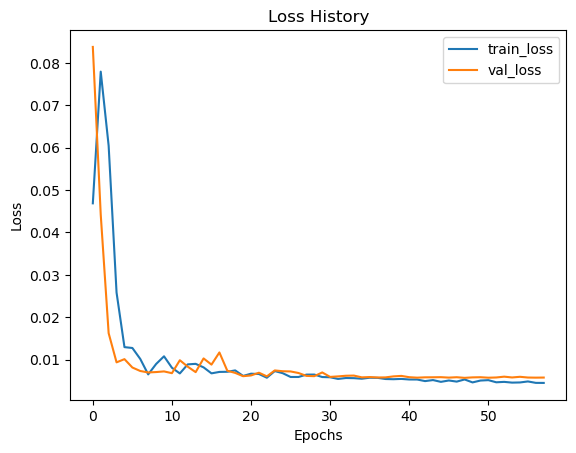

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

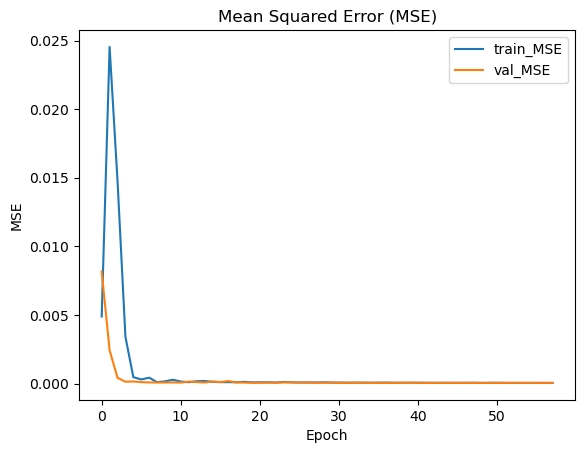

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

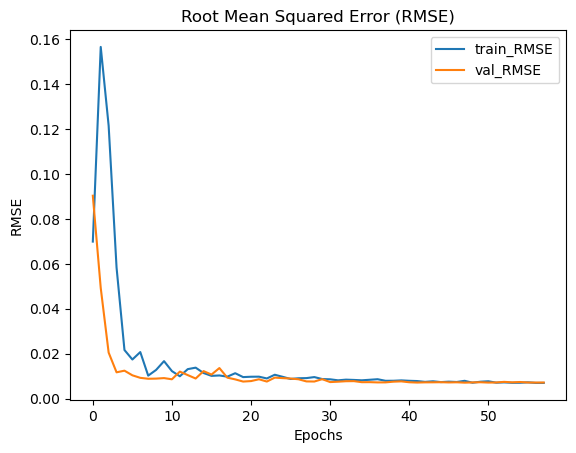

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

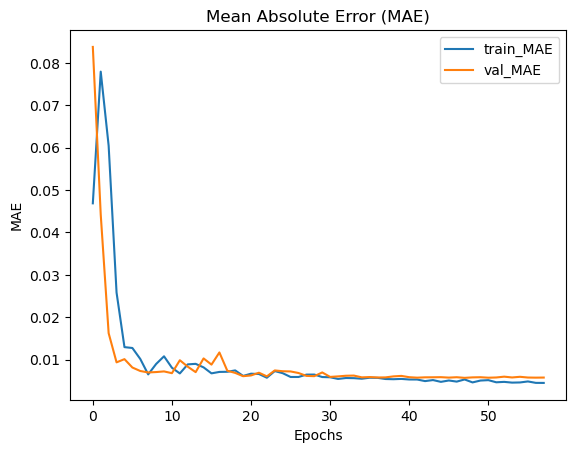

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

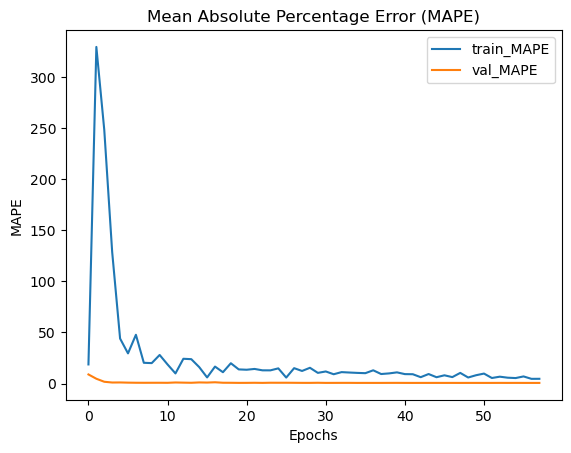

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:45:58.503028: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


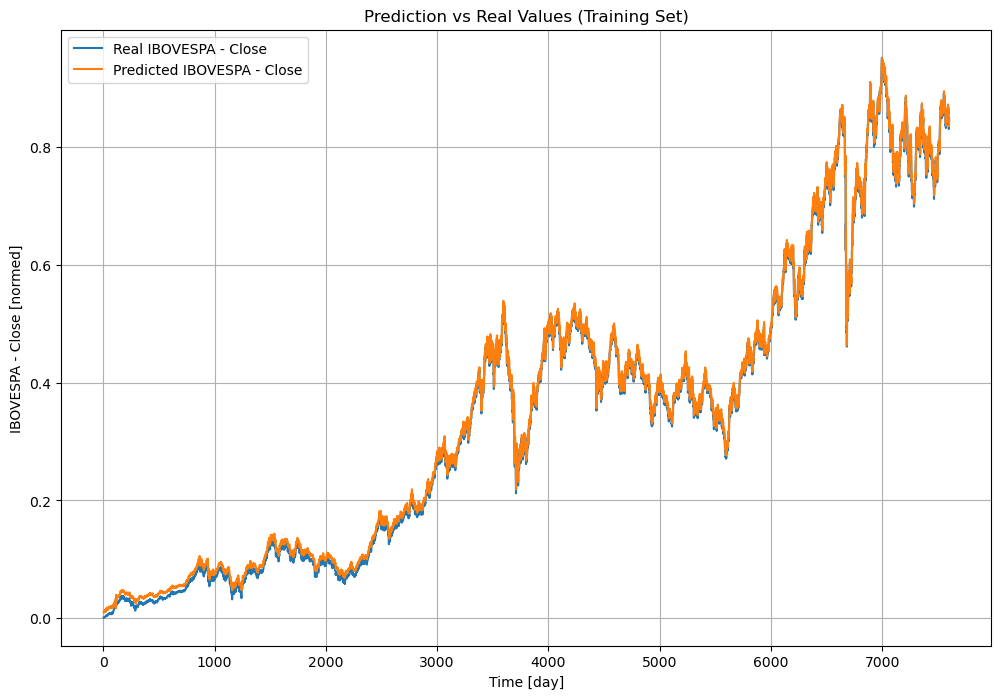

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


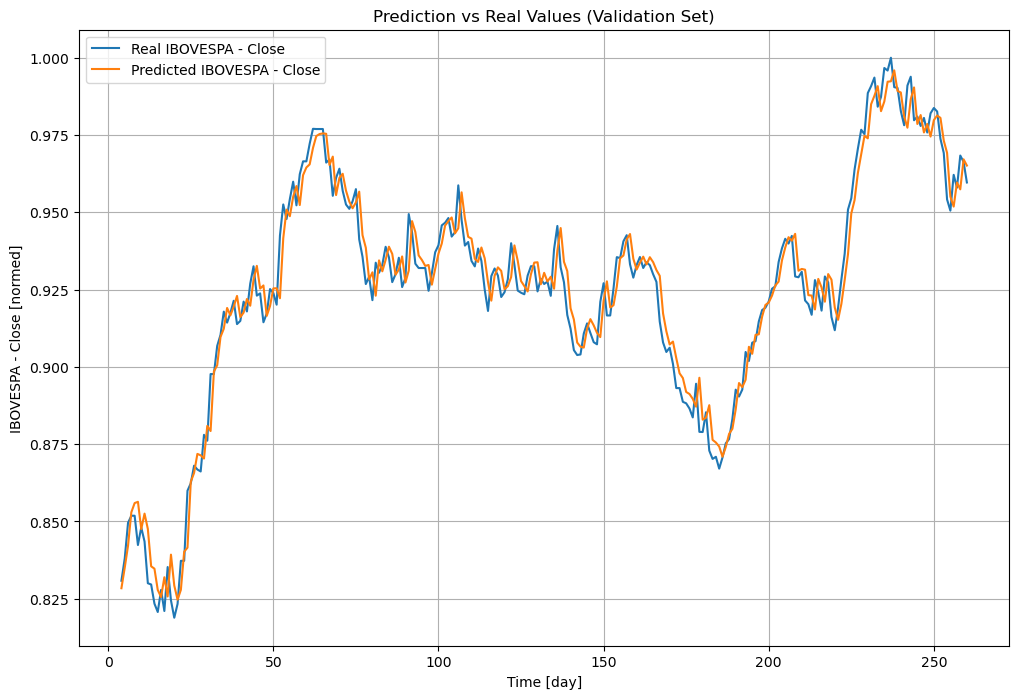

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


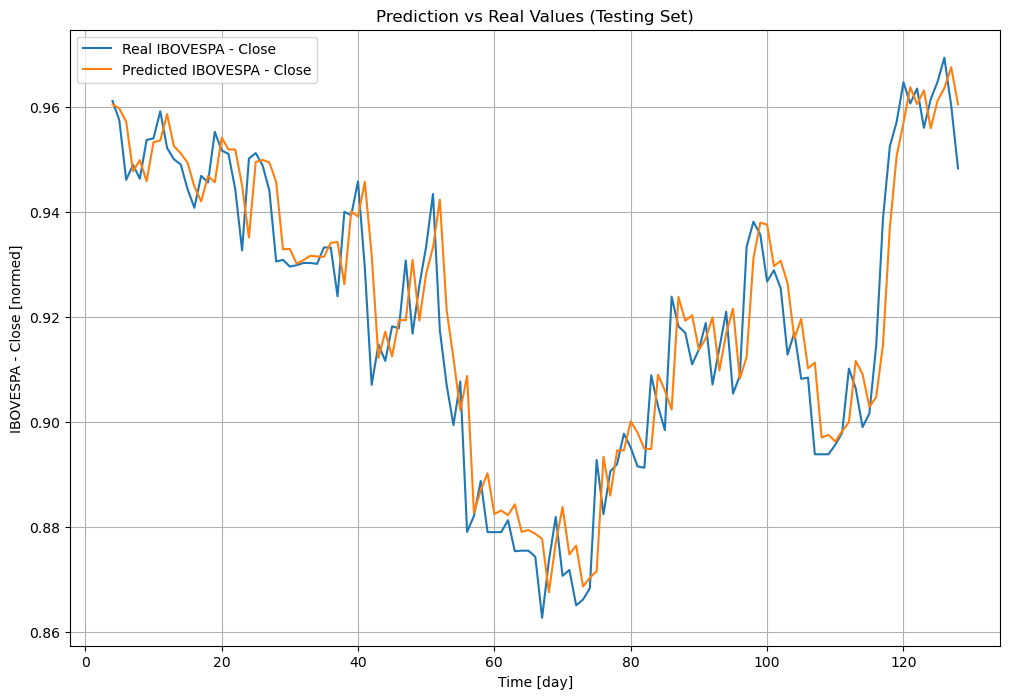

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

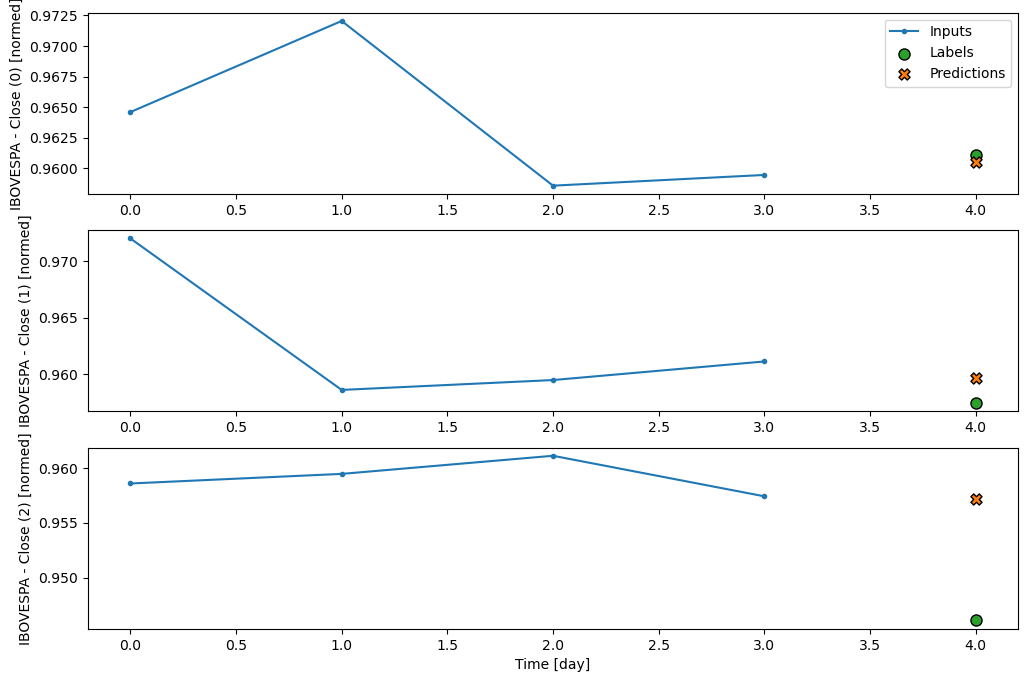

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:21s:831ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[[0.9604945 , 0.9604945 , 0.9604945 , ..., 0.9604945 ,
         0.9604945 , 0.9604945 ]],

       [[0.9596801 , 0.9596801 , 0.9596801 , ..., 0.9596801 ,
         0.9596801 , 0.9596801 ]],

       [[0.95718205, 0.95718205, 0.95718205, ..., 0.95718205,
         0.95718205, 0.95718205]],

       ...,

       [[0.9635788 , 0.9635788 , 0.9635788 , ..., 0.9635788 ,
         0.9635788 , 0.9635788 ]],

       [[0.9675629 , 0.9675629 , 0.9675629 , ..., 0.9675629 ,
         0.9675629 , 0.9675629 ]],

       [[0.9605013 , 0.9605013 , 0.9605013 , ..., 0.9605013 ,
         0.9605013 , 0.9605013 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')